In [ ]:
# 1 - Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 2 - Loading the Datasets

In [2]:
prop_2016 = pd.read_csv('properties_2016.csv', low_memory=False)
print('Shape of properties_2016 dataset: ', prop_2016.shape)

Shape of properties_2016 dataset:  (2985217, 58)


In [3]:
train_2016 = pd.read_csv('train_2016_v2.csv', low_memory=False)
print('Shape of train_2016 dataset: ', train_2016.shape)

Shape of train_2016 dataset:  (90275, 3)


In [4]:
prop_2016.head()

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                    NaN                       NaN           NaN   
1  10759547                    NaN                       NaN           NaN   
2  10843547                    NaN                       NaN           NaN   
3  10859147                    NaN                       NaN           NaN   
4  10879947                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  NaN                    NaN   
3          0.0         0.0                  3.0                    7.0   
4          0.0         0.0                  4.0                    NaN   

   calculatedbathnbr  decktypeid  ...  numberofstories  fireplaceflag  \
0                NaN         NaN  ...              NaN            NaN   
1                NaN         NaN  ...              NaN            NaN   
2                NaN         NaN  ...              NaN            NaN   
3                NaN         NaN  ...              1.0            NaN   
4                NaN         NaN  ...              NaN            NaN   

   structuretaxvaluedollarcnt  taxvaluedollarcnt  assessmentyear  \
0                         NaN                9.0          2015.0   
1                         NaN            27516.0          2015.0   
2                    650756.0          1413387.0          2015.0   
3                    571346.0          1156834.0          2015.0   
4                    193796.0           433491.0          2015.0   

   landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  taxdelinquencyyear  \
0                    9.0        NaN                 NaN                 NaN   
1                27516.0        NaN                 NaN                 NaN   
2               762631.0   20800.37                 NaN                 NaN   
3               585488.0   14557.57                 NaN                 NaN   
4               239695.0    5725.17                 NaN                 NaN   

   censustractandblock  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 58 columns]

In [5]:
train_2016.head()

parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02

In [ ]:
# Merging of 2 Datasets - parcelid is the unique identifier in both the tables, so we will merge the two tables on the basis of parcelid.

In [6]:
final_data = prop_2016.copy()
final_data = final_data.merge(train_2016, on = 'parcelid')

In [7]:
final_data.head()

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  17073783                    NaN                       NaN           NaN   
1  17088994                    NaN                       NaN           NaN   
2  17100444                    NaN                       NaN           NaN   
3  17102429                    NaN                       NaN           NaN   
4  17109604                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          2.5         3.0                  NaN                    NaN   
1          1.0         2.0                  NaN                    NaN   
2          2.0         3.0                  NaN                    NaN   
3          1.5         2.0                  NaN                    NaN   
4          2.5         4.0                  NaN                    NaN   

   calculatedbathnbr  decktypeid  ...  structuretaxvaluedollarcnt  \
0                2.5         NaN  ...                    115087.0   
1                1.0         NaN  ...                    143809.0   
2                2.0         NaN  ...                     33619.0   
3                1.5         NaN  ...                     45609.0   
4                2.5         NaN  ...                    277000.0   

   taxvaluedollarcnt  assessmentyear  landtaxvaluedollarcnt  taxamount  \
0           191811.0          2015.0                76724.0    2015.06   
1           239679.0          2015.0                95870.0    2581.30   
2            47853.0          2015.0                14234.0     591.64   
3            62914.0          2015.0                17305.0     682.78   
4           554000.0          2015.0               277000.0    5886.92   

   taxdelinquencyflag  taxdelinquencyyear  censustractandblock  logerror  \
0                 NaN                 NaN         6.111002e+13    0.0953   
1                 NaN                 NaN         6.111002e+13    0.0198   
2                 NaN                 NaN         6.111001e+13    0.0060   
3                 NaN                 NaN         6.111001e+13   -0.0566   
4                 NaN                 NaN         6.111001e+13    0.0573   

   transactiondate  
0       2016-01-27  
1       2016-03-30  
2       2016-05-27  
3       2016-06-07  
4       2016-08-08  

[5 rows x 60 columns]

In [8]:
print('Shape of Merged Data: ', final_data.shape)

Shape of Merged Data:  (90275, 60)


In [ ]:
# 3 - Exploring Data Analysis (EDA) - statistically analyzing the dataset to summarise its main characteristics and content. 

In [9]:
copy_data = final_data.copy()

In [ ]:
# DataSet Information

In [10]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      90275 non-null  int64  
 1   airconditioningtypeid         28781 non-null  float64
 2   architecturalstyletypeid      261 non-null    float64
 3   basementsqft                  43 non-null     float64
 4   bathroomcnt                   90275 non-null  float64
 5   bedroomcnt                    90275 non-null  float64
 6   buildingclasstypeid           16 non-null     float64
 7   buildingqualitytypeid         57364 non-null  float64
 8   calculatedbathnbr             89093 non-null  float64
 9   decktypeid                    658 non-null    float64
 10  finishedfloor1squarefeet      6856 non-null   float64
 11  calculatedfinishedsquarefeet  89614 non-null  float64
 12  finishedsquarefeet12          85596 non-null  float64
 13  f

In [11]:
copy_data.describe() 
# displaying count, mean, std, min, 25%, 50%, 75%, max

parcelid  airconditioningtypeid  architecturalstyletypeid  \
count  9.027500e+04           28781.000000                261.000000   
mean   1.298466e+07               1.816372                  7.229885   
std    2.504510e+06               2.974168                  2.716196   
min    1.071174e+07               1.000000                  2.000000   
25%    1.155950e+07               1.000000                  7.000000   
50%    1.254734e+07               1.000000                  7.000000   
75%    1.422755e+07               1.000000                  7.000000   
max    1.629608e+08              13.000000                 21.000000   

       basementsqft   bathroomcnt    bedroomcnt  buildingclasstypeid  \
count     43.000000  90275.000000  90275.000000                 16.0   
mean     713.581395      2.279474      3.031869                  4.0   
std      437.434198      1.004271      1.156436                  0.0   
min      100.000000      0.000000      0.000000                  4.0   
25%      407.500000      2.000000      2.000000                  4.0   
50%      616.000000      2.000000      3.000000                  4.0   
75%      872.000000      3.000000      4.000000                  4.0   
max     1555.000000     20.000000     16.000000                  4.0   

       buildingqualitytypeid  calculatedbathnbr  decktypeid  ...  \
count           57364.000000       89093.000000       658.0  ...   
mean                5.565407           2.309216        66.0  ...   
std                 1.900602           0.976172         0.0  ...   
min                 1.000000           1.000000        66.0  ...   
25%                 4.000000           2.000000        66.0  ...   
50%                 7.000000           2.000000        66.0  ...   
75%                 7.000000           3.000000        66.0  ...   
max                12.000000          20.000000        66.0  ...   

          yearbuilt  numberofstories  structuretaxvaluedollarcnt  \
count  89519.000000     20570.000000                8.989500e+04   
mean    1968.532870         1.440739                1.800934e+05   
std       23.763475         0.544498                2.091299e+05   
min     1885.000000         1.000000                1.000000e+02   
25%     1953.000000         1.000000                8.124500e+04   
50%     1970.000000         1.000000                1.320000e+05   
75%     1987.000000         2.000000                2.105345e+05   
max     2015.000000         4.000000                9.948100e+06   

       taxvaluedollarcnt  assessmentyear  landtaxvaluedollarcnt  \
count       9.027400e+04         90275.0           9.027400e+04   
mean        4.576726e+05          2015.0           2.783353e+05   
std         5.548844e+05             0.0           4.004955e+05   
min         2.200000e+01          2015.0           2.200000e+01   
25%         1.990232e+05          2015.0           8.222800e+04   
50%         3.428720e+05          2015.0           1.929700e+05   
75%         5.405890e+05          2015.0           3.454195e+05   
max         2.775000e+07          2015.0           2.450000e+07   

           taxamount  taxdelinquencyyear  censustractandblock      logerror  
count   90269.000000         1783.000000         8.967000e+04  90275.000000  
mean     5983.975927           13.402692         6.049151e+13      0.011457  
std      6838.876956            2.715966         2.046605e+11      0.161079  
min        49.080000            6.000000         6.037101e+13     -4.605000  
25%      2872.830000           13.000000         6.037320e+13     -0.025300  
50%      4542.750000           14.000000         6.037615e+13      0.006000  
75%      6901.090000           15.000000         6.059042e+13      0.039200  
max    321936.090000           99.000000         6.111009e+13      4.737000  

[8 rows x 54 columns]

In [ ]:
# Missing Values

In [12]:
missing_values = []
for var in copy_data.columns:
    if (copy_data[var].isnull().sum() > 0):
        missing_values.append(var)

In [13]:
copy_data[missing_values].isnull().sum()

airconditioningtypeid           61494
architecturalstyletypeid        90014
basementsqft                    90232
buildingclasstypeid             90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsystemtypeid           34195
lotsizesquarefeet               10150
poolcnt                         72374
poolsizesum                     89306
pooltypeid10                    89114
pooltypeid2                     89071
pooltypeid7                     73578
propertycoun

In [14]:
# Percentage of missing values in total data
copy_data.isnull().mean()*100

parcelid                         0.000000
airconditioningtypeid           68.118527
architecturalstyletypeid        99.710883
basementsqft                    99.952368
bathroomcnt                      0.000000
bedroomcnt                       0.000000
buildingclasstypeid             99.982276
buildingqualitytypeid           36.456383
calculatedbathnbr                1.309333
decktypeid                      99.271116
finishedfloor1squarefeet        92.405428
calculatedfinishedsquarefeet     0.732207
finishedsquarefeet12             5.183052
finishedsquarefeet13            99.963445
finishedsquarefeet15            96.052063
finishedsquarefeet50            92.405428
finishedsquarefeet6             99.533647
fips                             0.000000
fireplacecnt                    89.358073
fullbathcnt                      1.309333
garagecarcnt                    66.837995
garagetotalsqft                 66.837995
hashottuborspa                  97.380227
heatingorsystemtypeid           37

In [ ]:
# Relation between missing values and log error (which is a Target Variable)

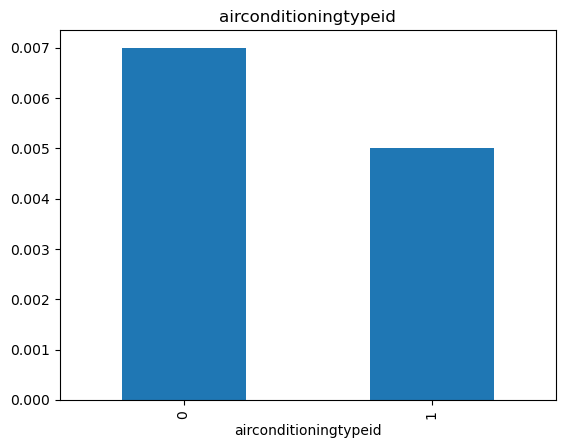

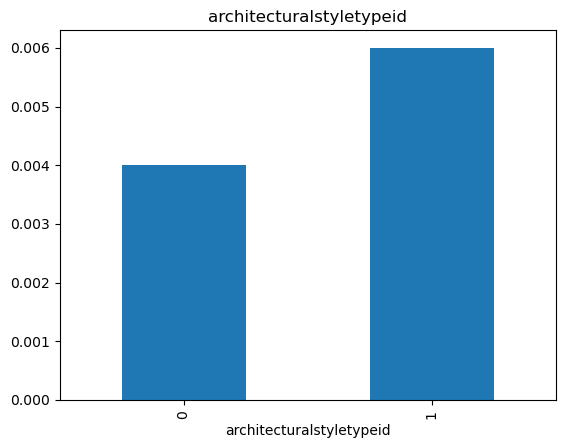

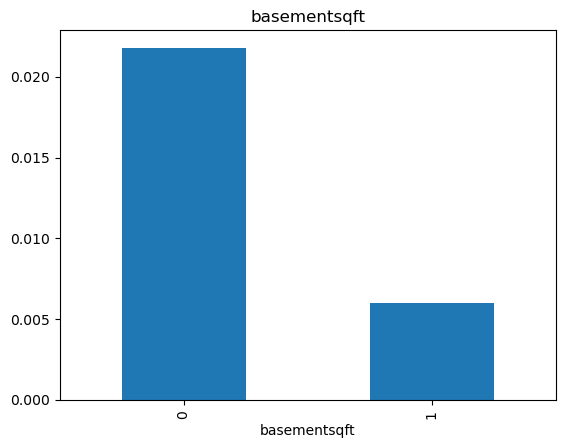

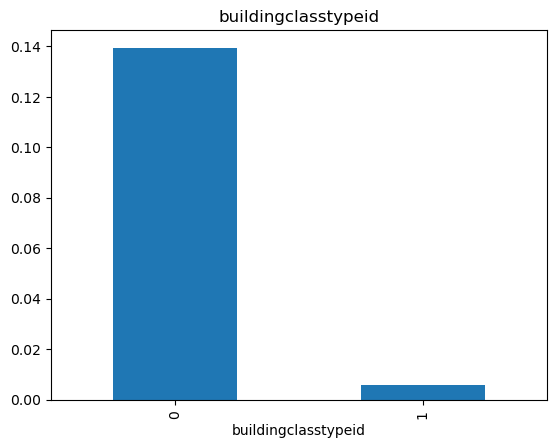

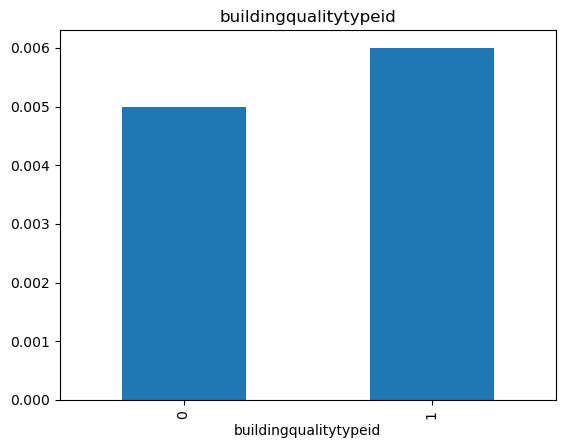

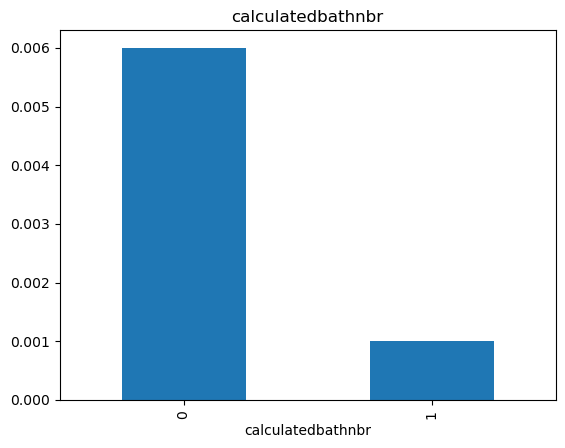

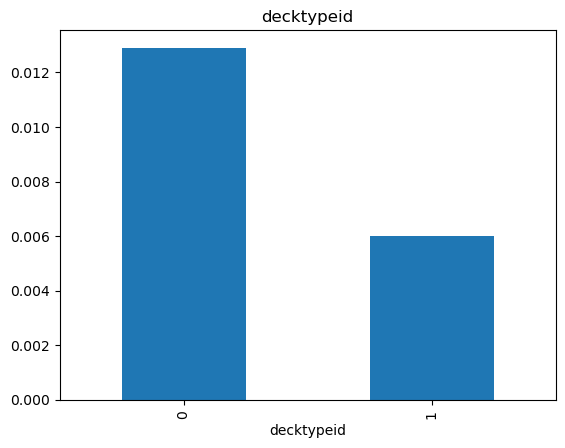

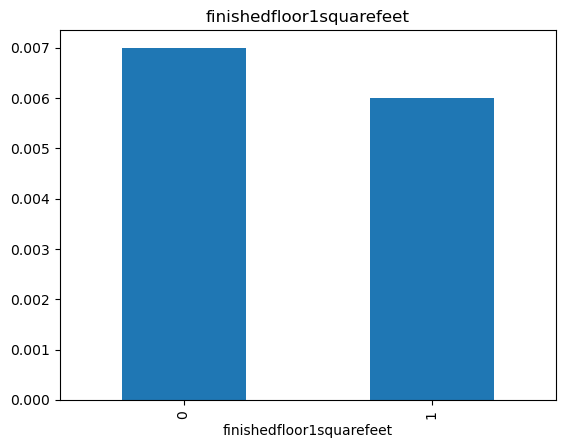

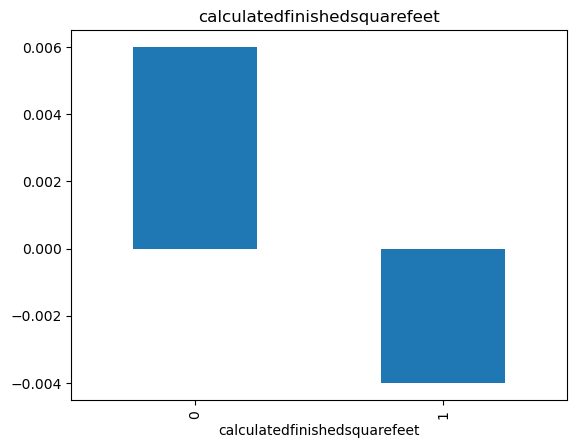

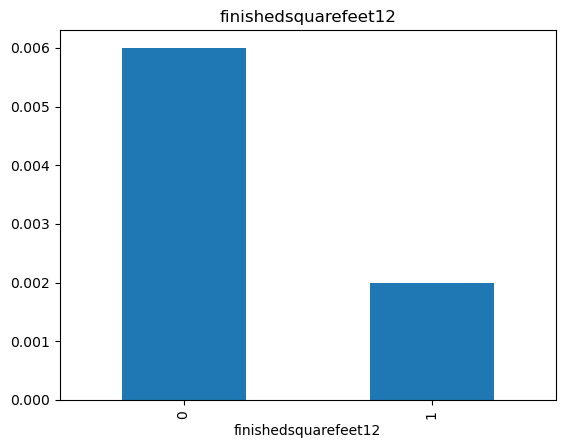

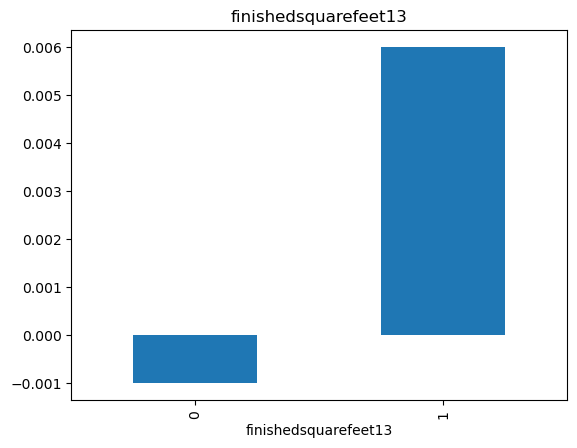

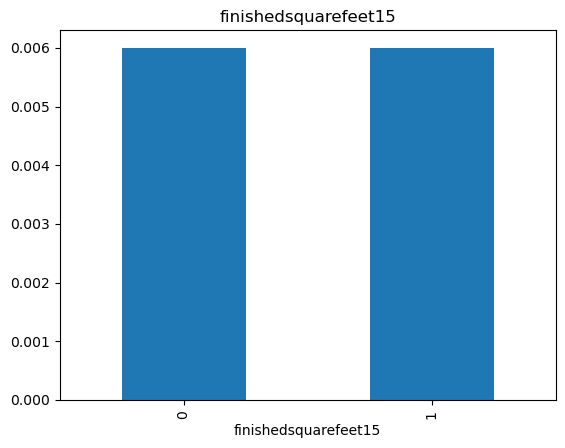

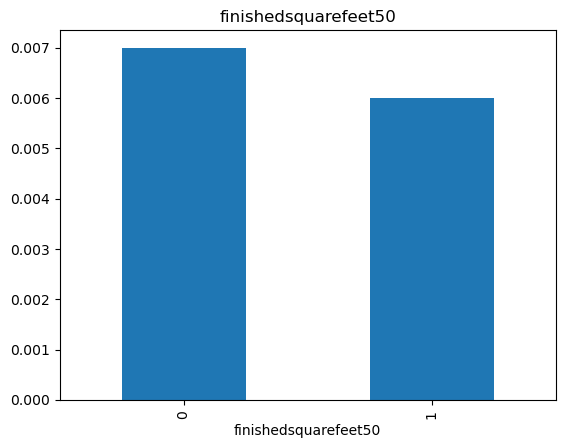

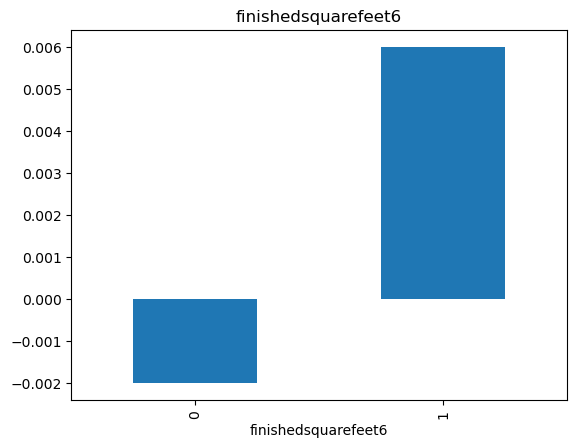

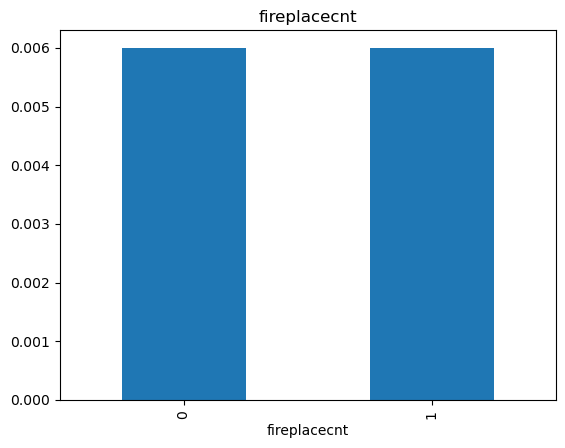

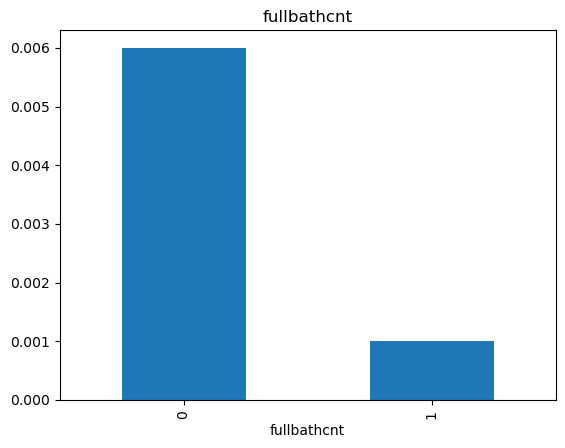

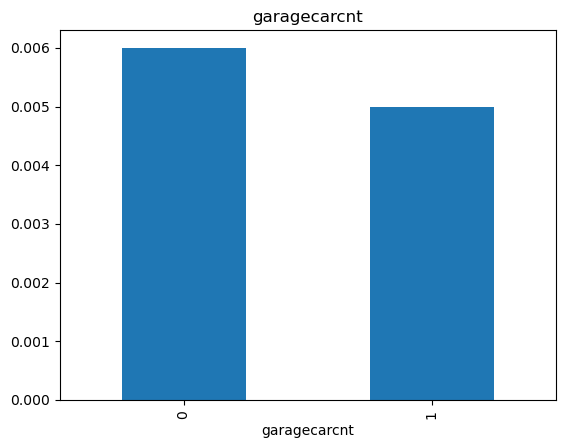

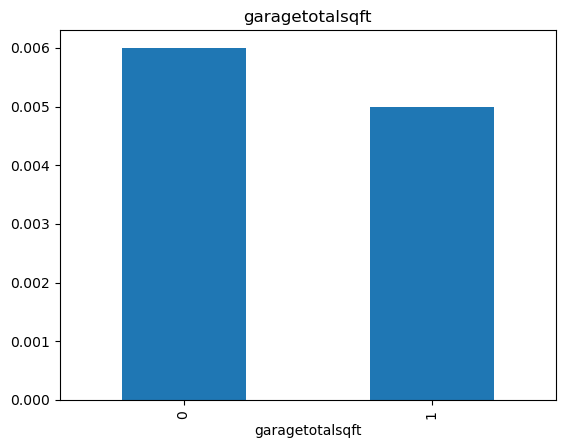

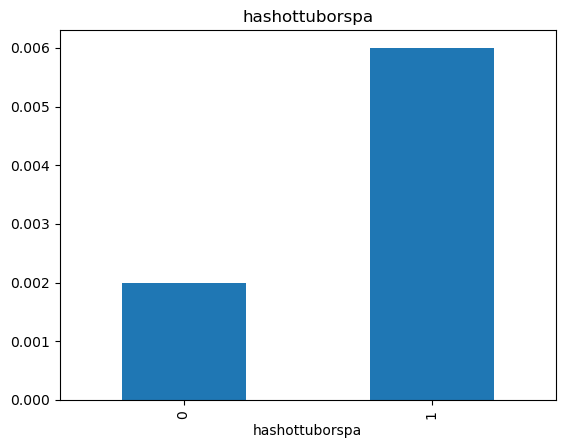

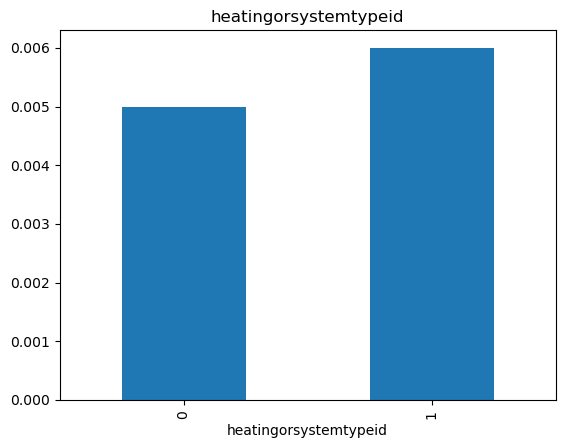

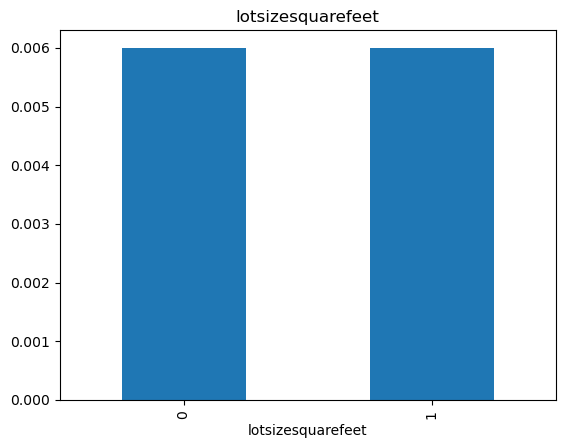

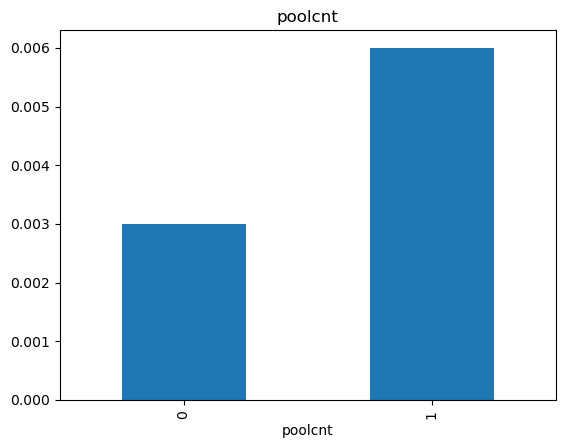

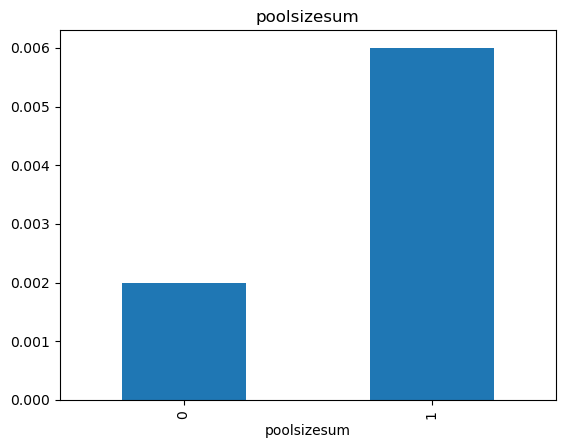

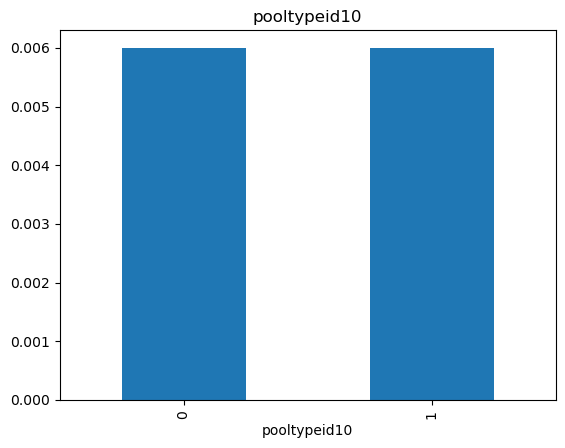

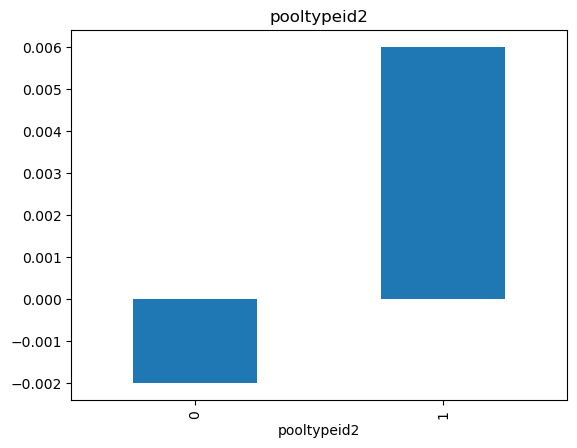

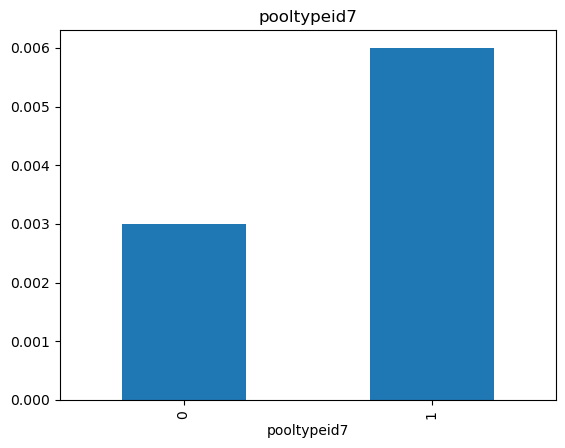

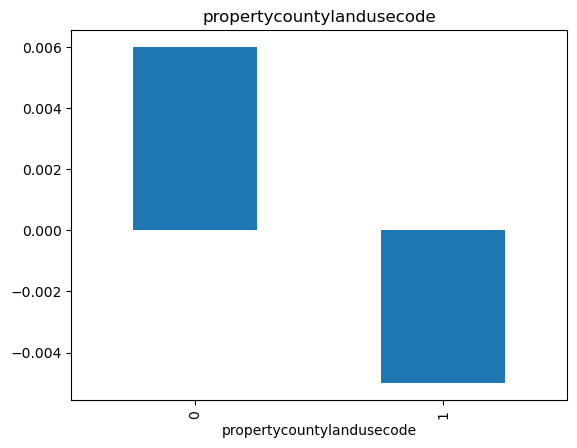

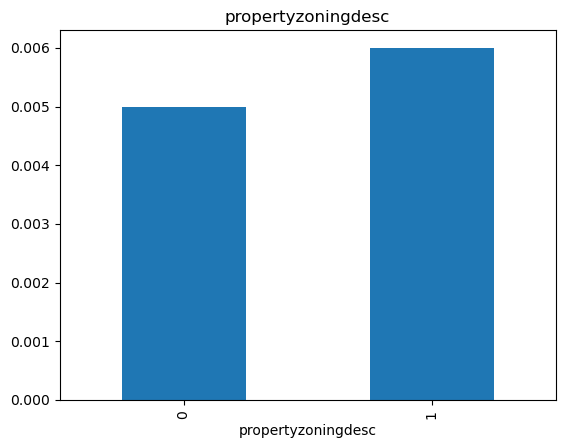

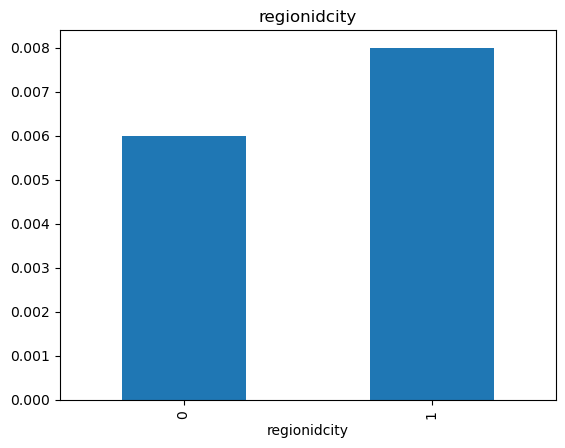

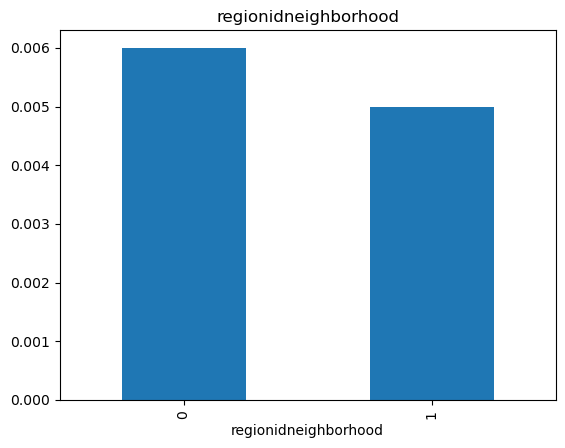

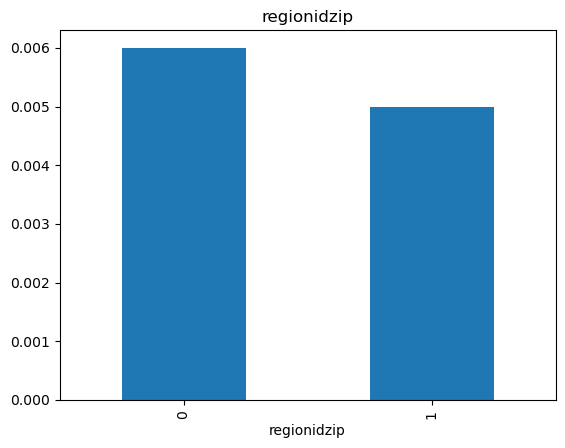

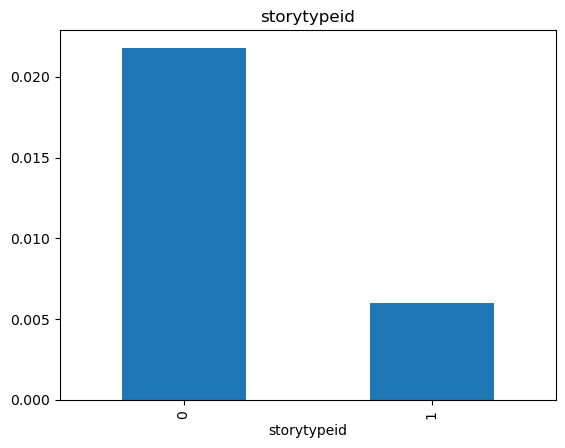

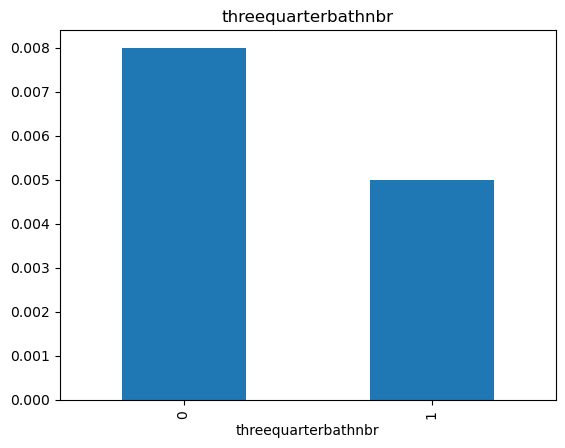

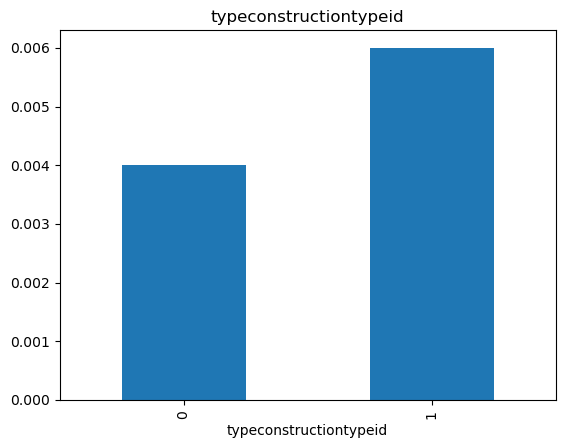

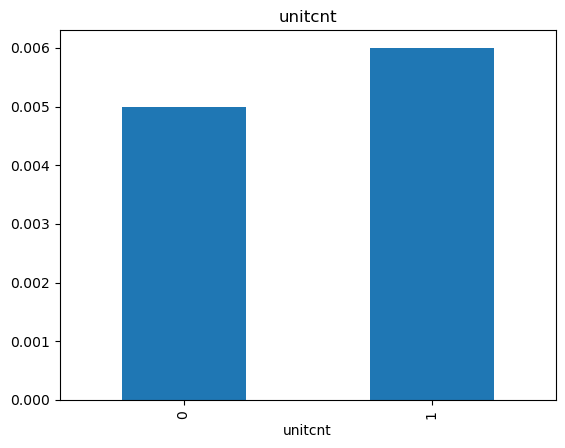

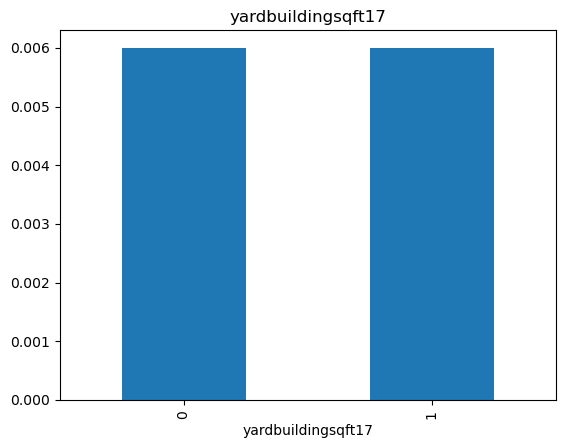

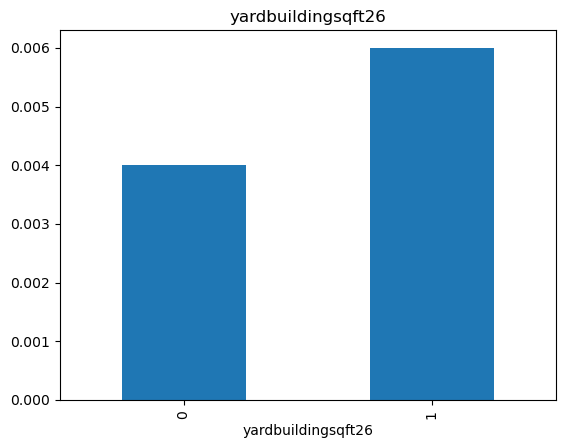

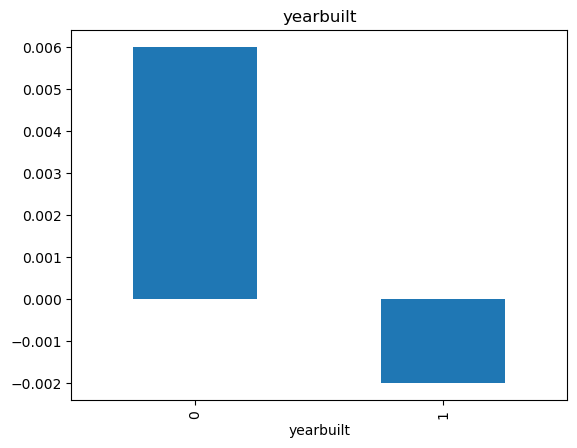

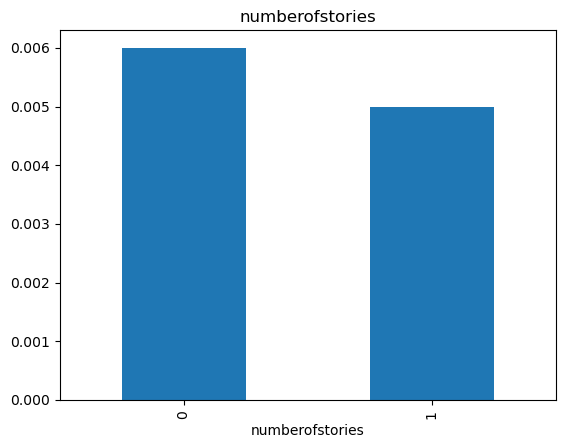

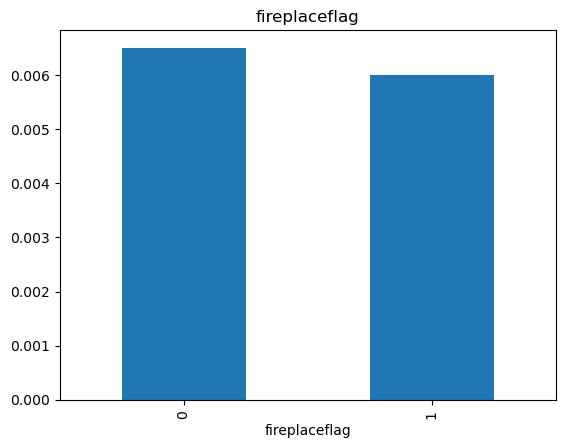

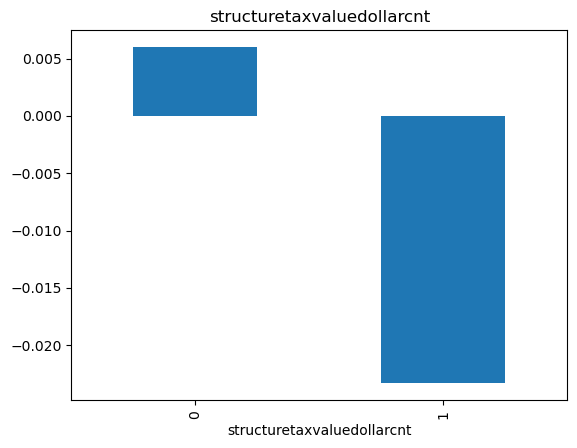

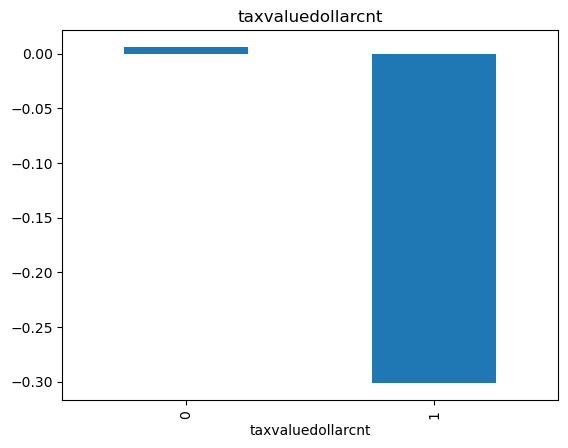

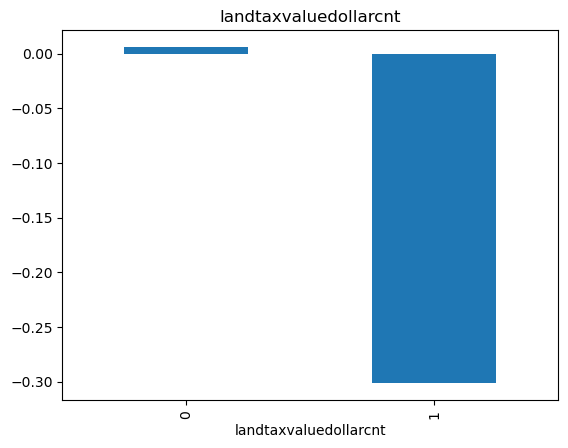

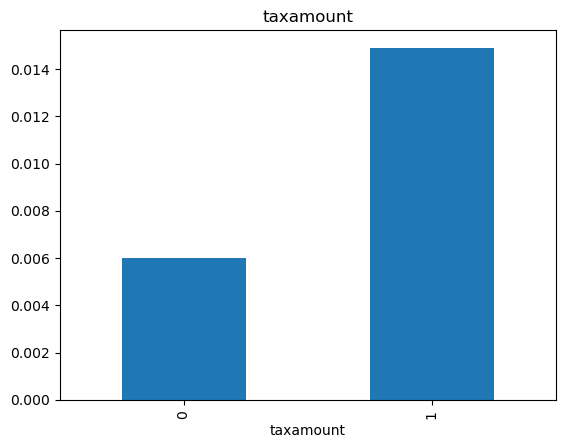

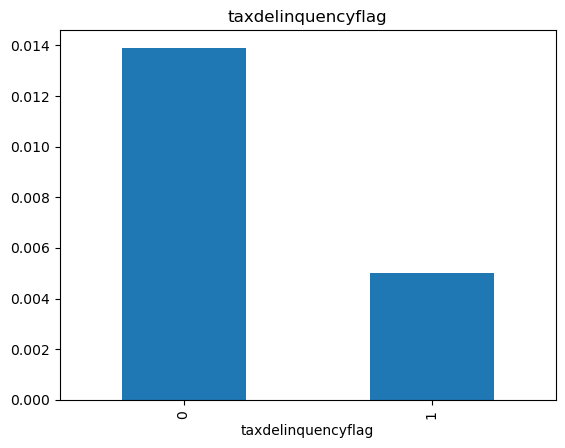

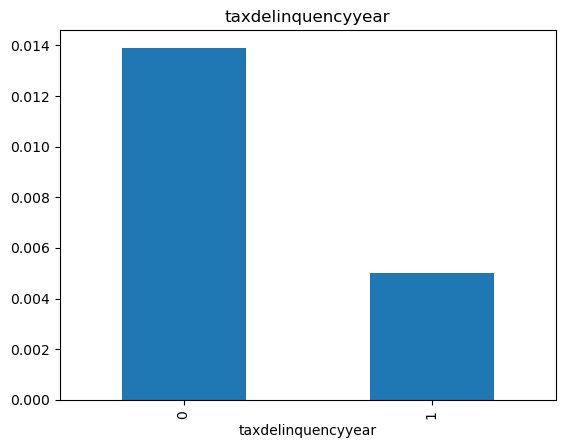

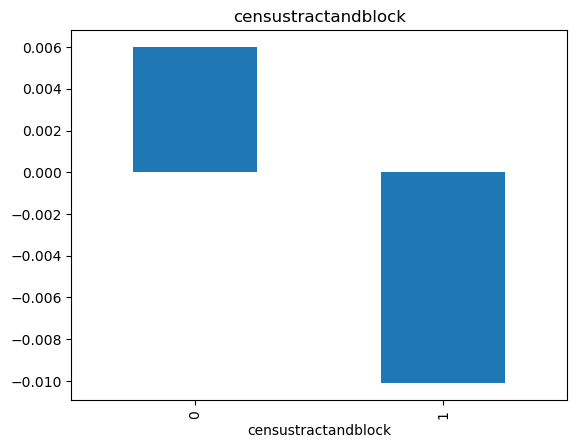

In [41]:
# 1 means missing value and 0 means no missing value

def analyze_missing_values(data, var):
    new_data = data.copy()
    new_data[var] = np.where(new_data[var].isnull(), 1, 0)
    new_data.groupby(var)['logerror'].median().plot.bar()
    
    plt.title(var)
    plt.show()
    

for var in missing_values:
    analyze_missing_values(copy_data, var)

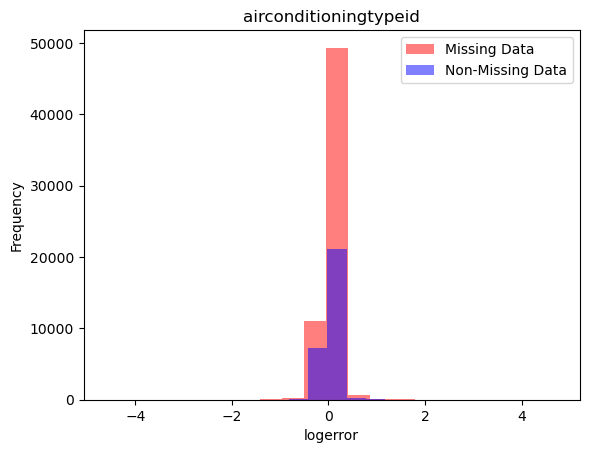

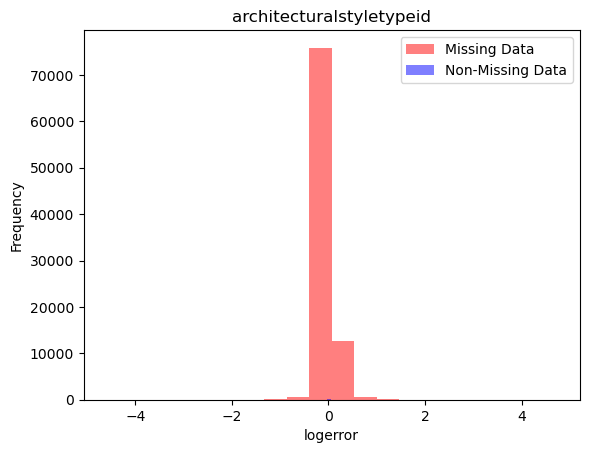

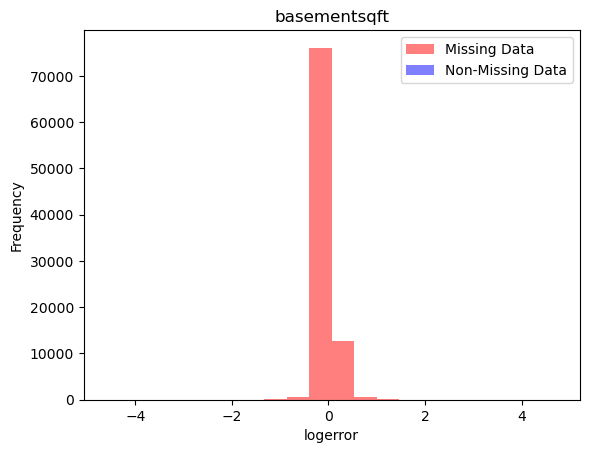

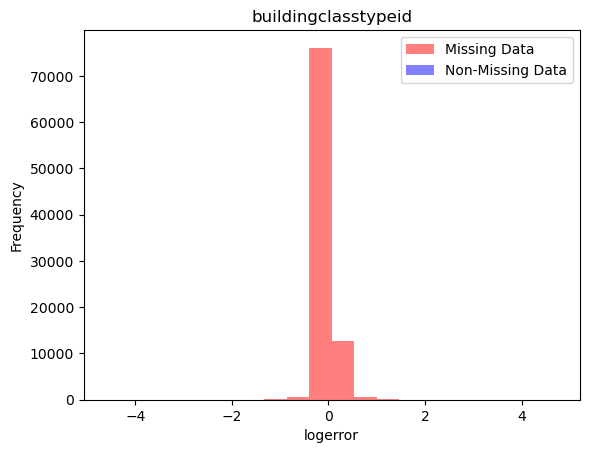

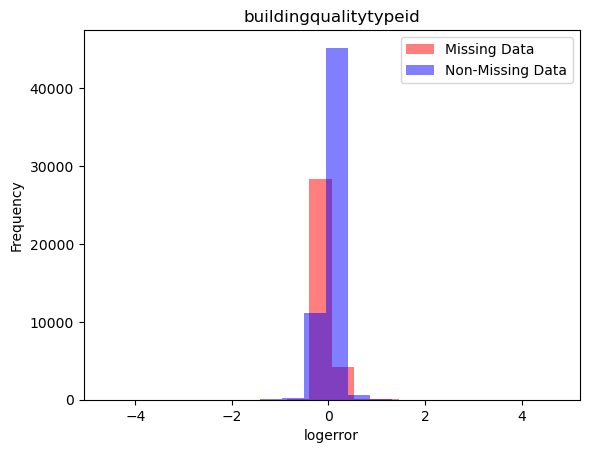

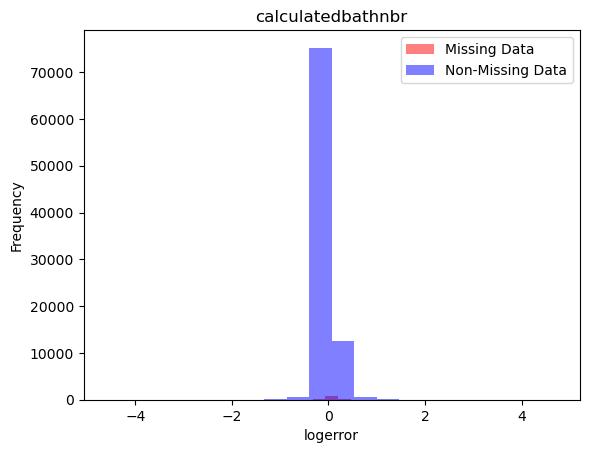

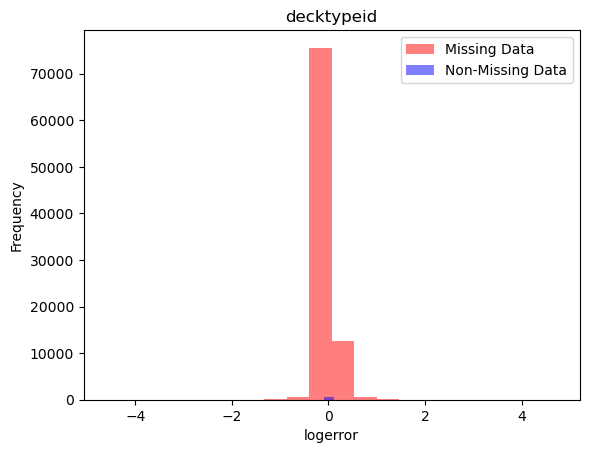

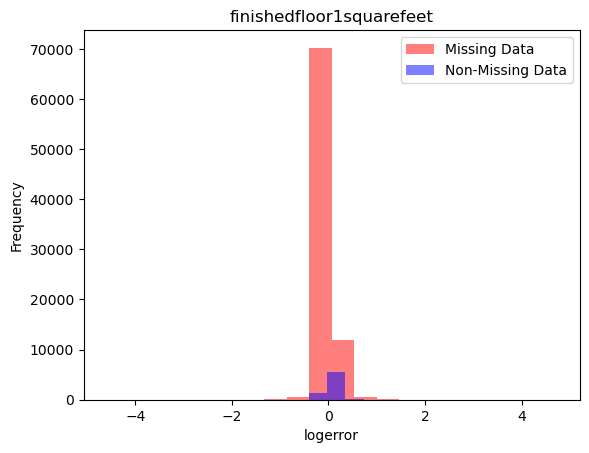

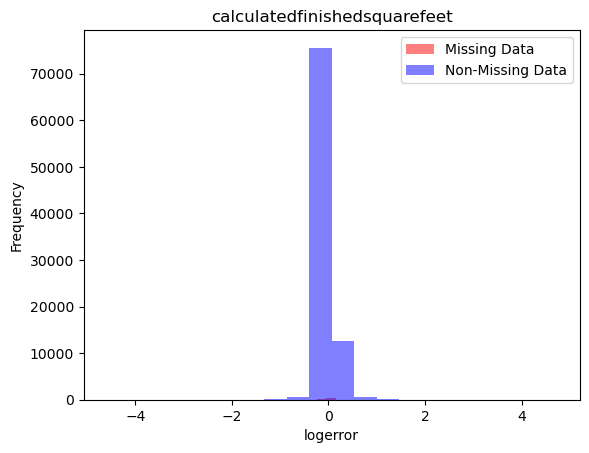

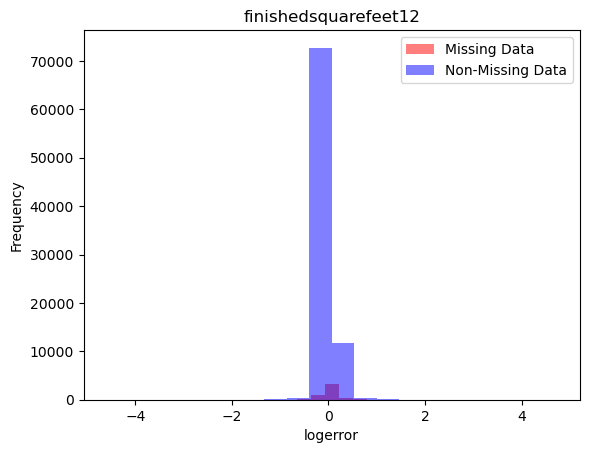

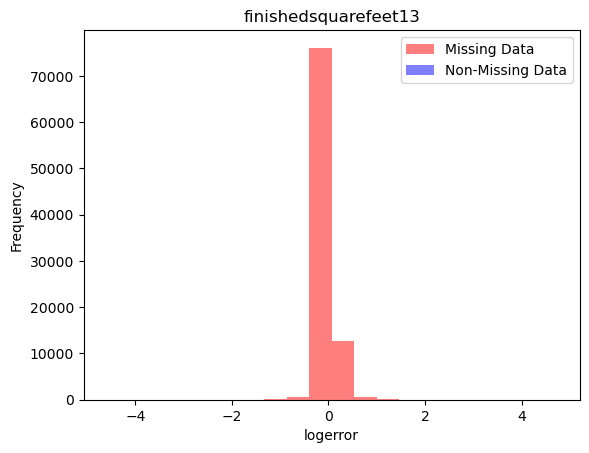

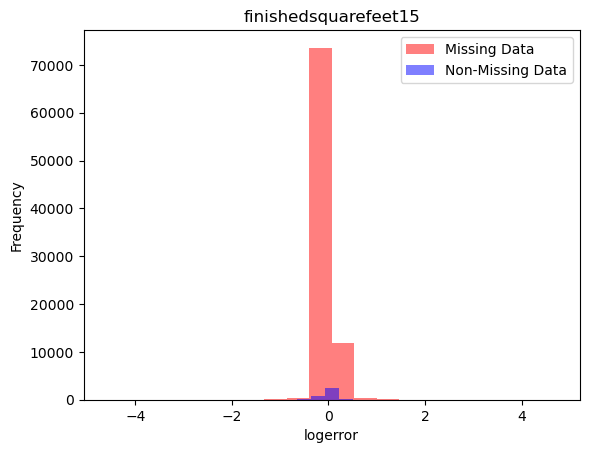

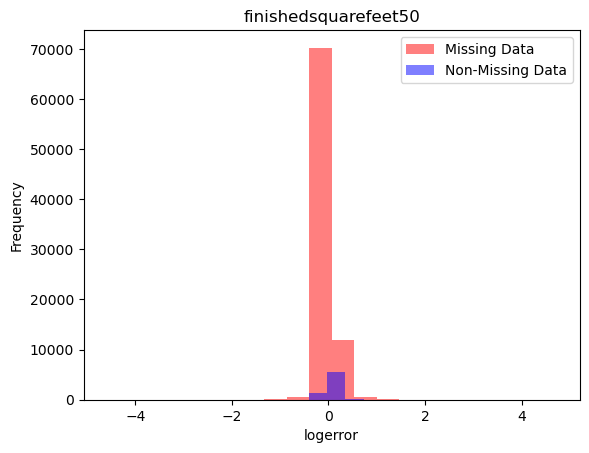

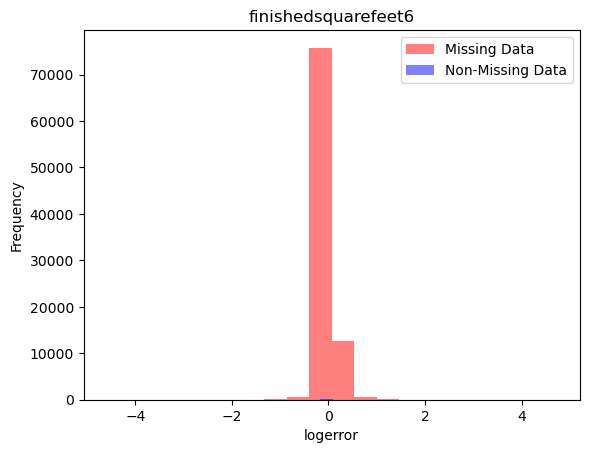

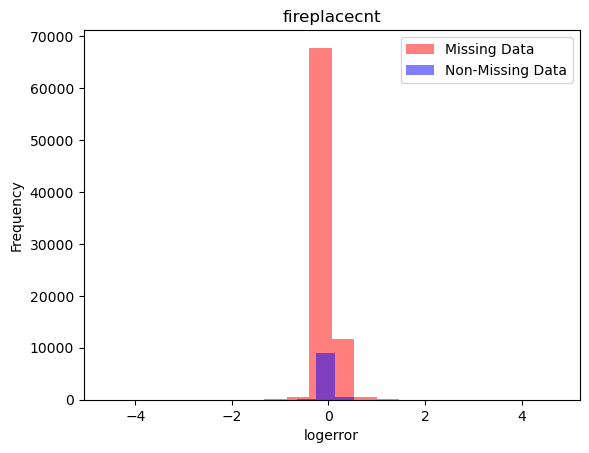

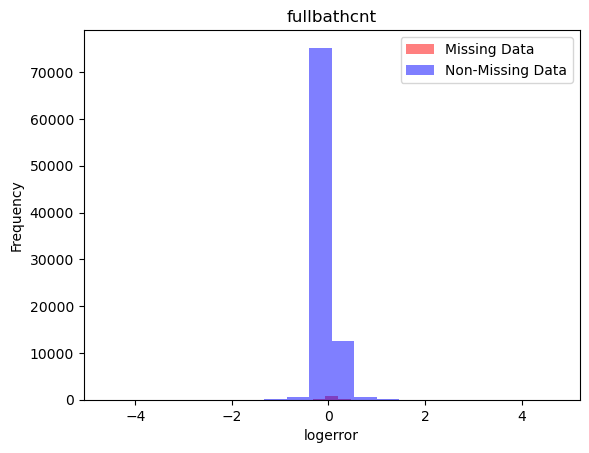

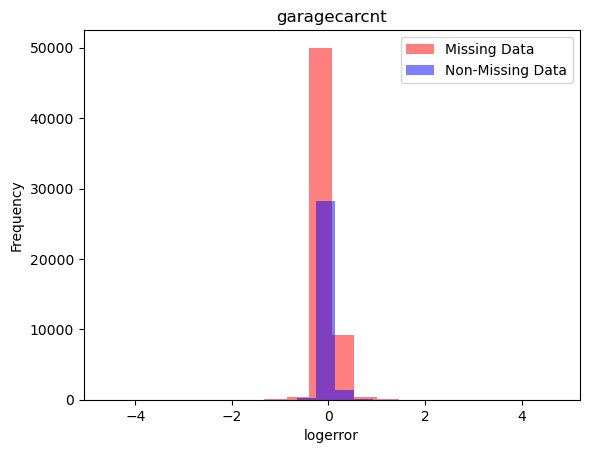

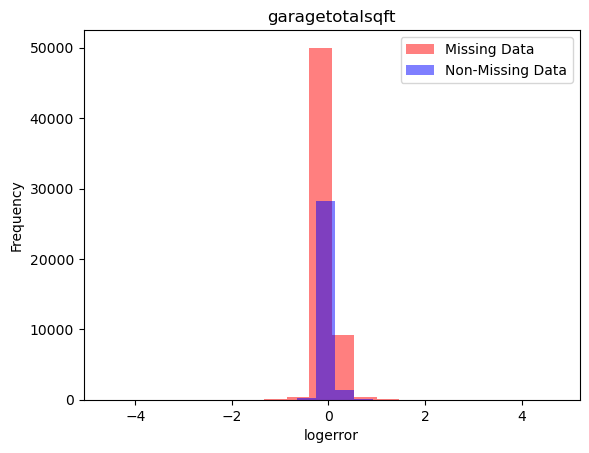

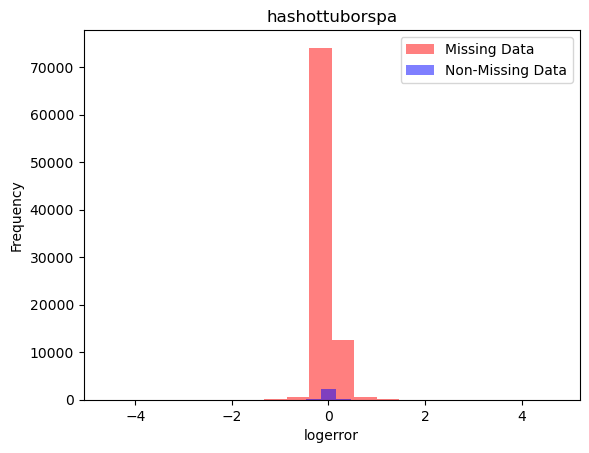

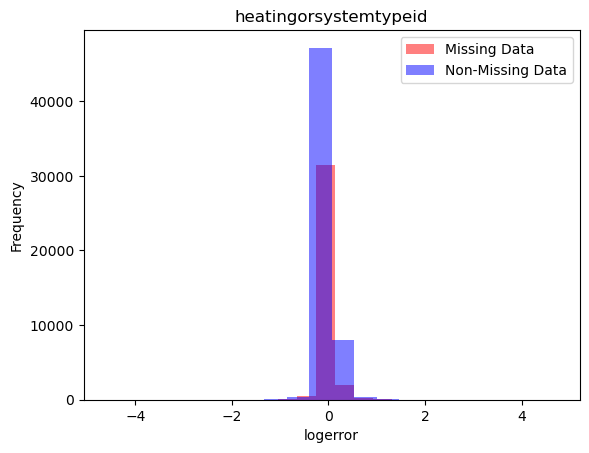

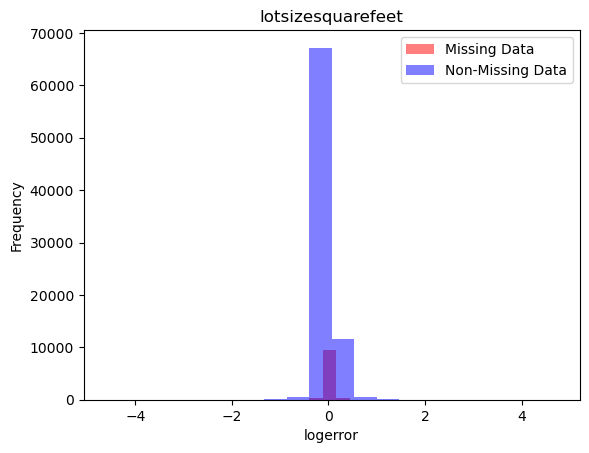

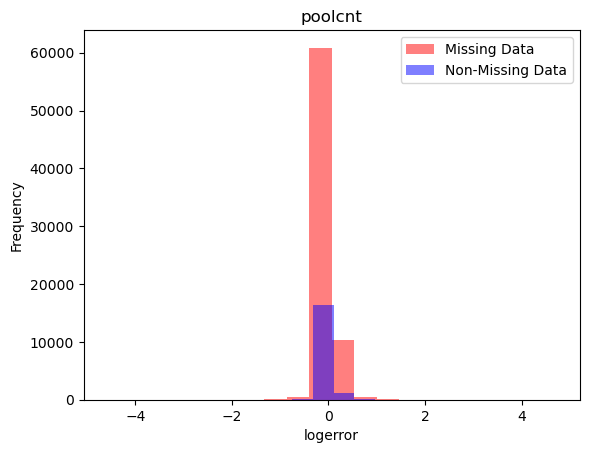

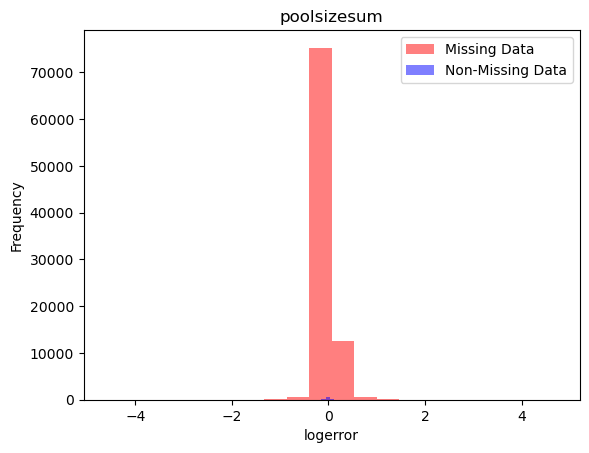

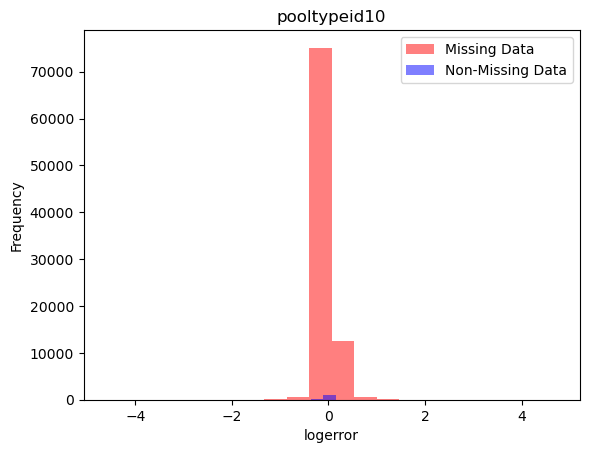

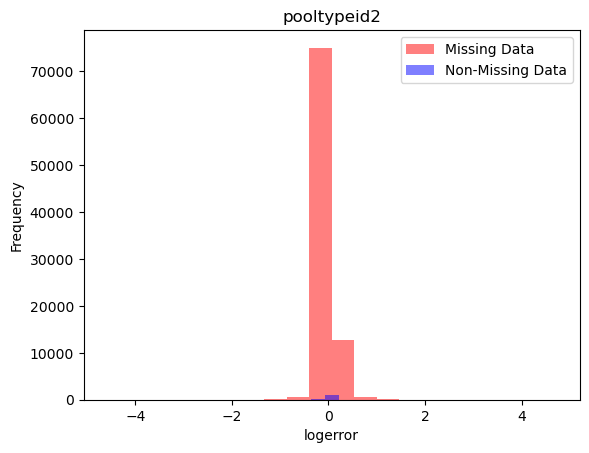

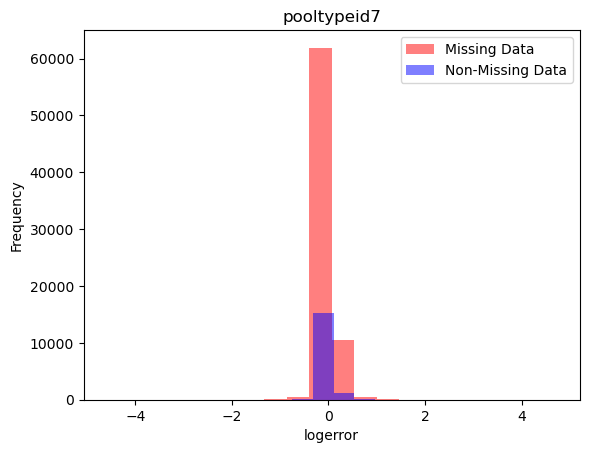

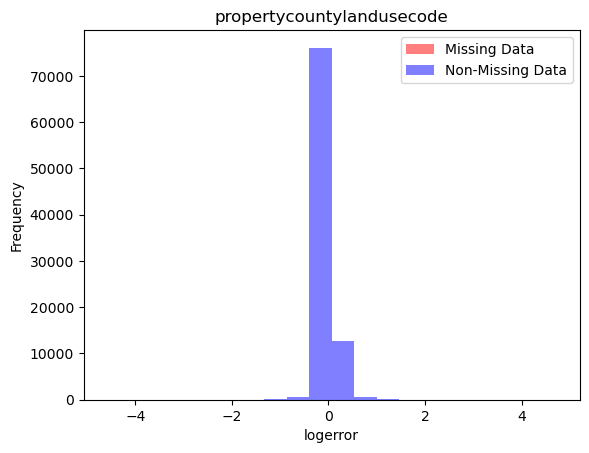

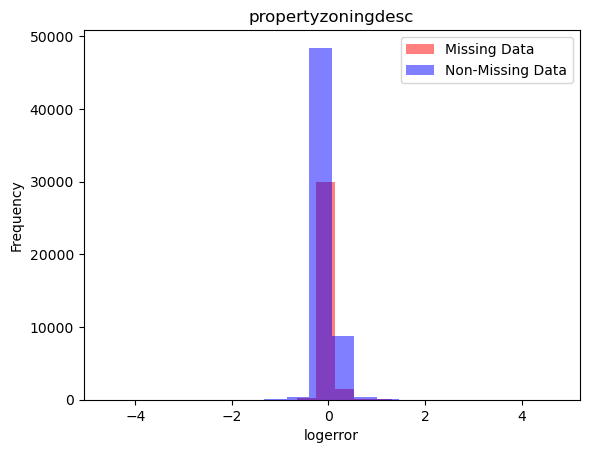

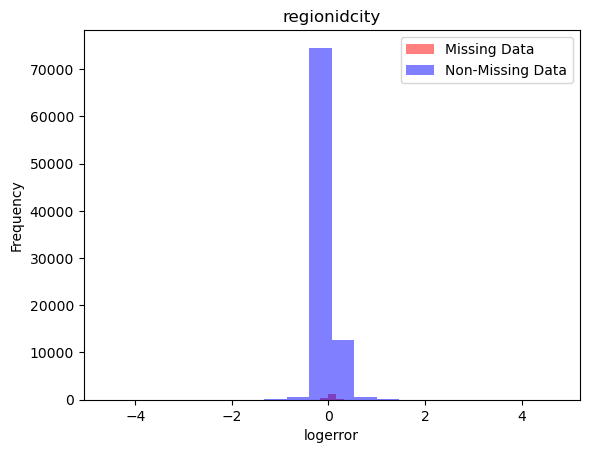

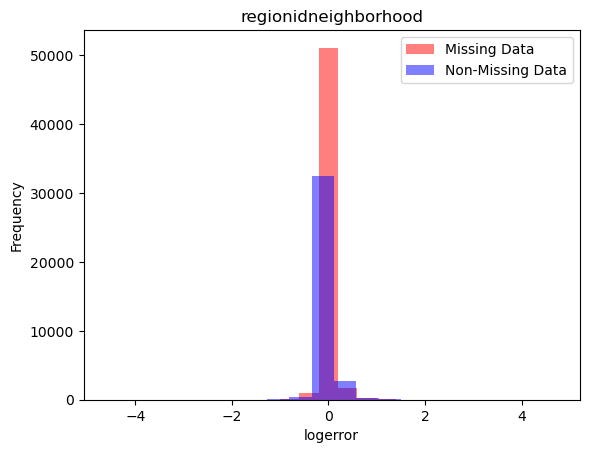

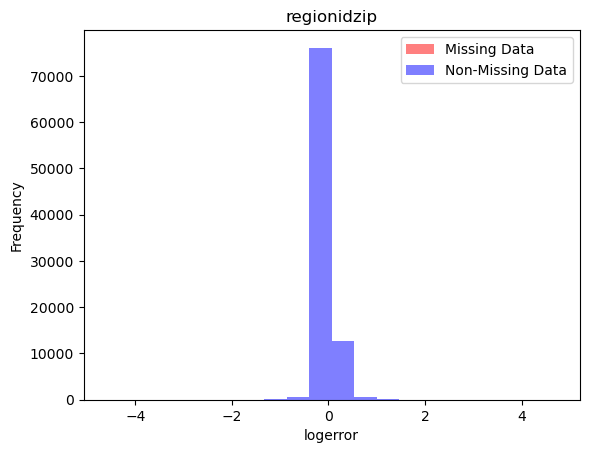

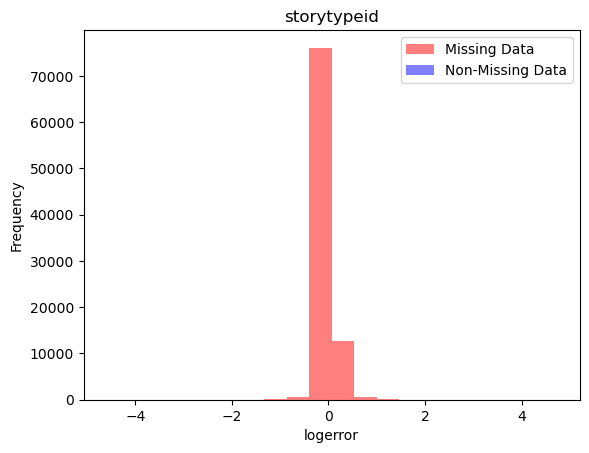

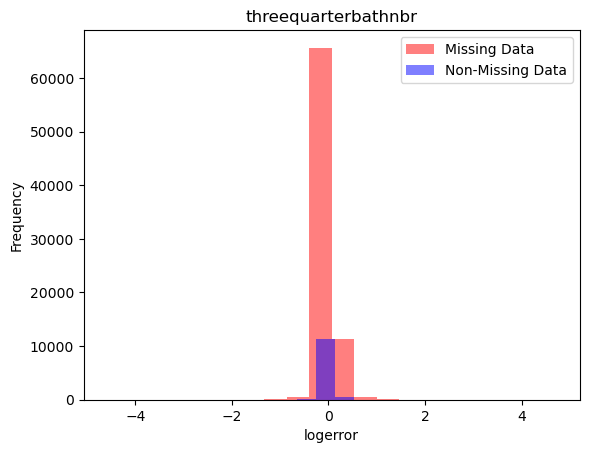

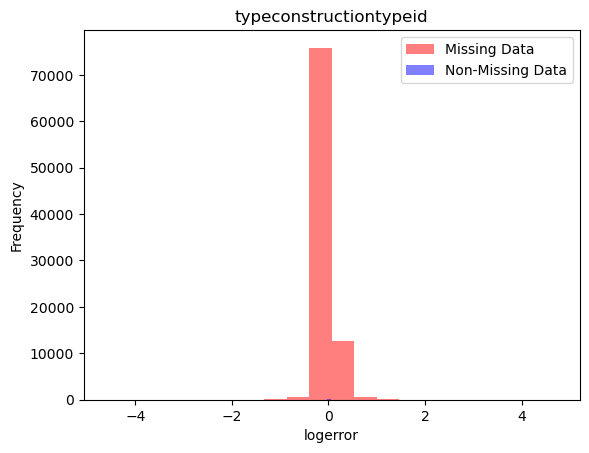

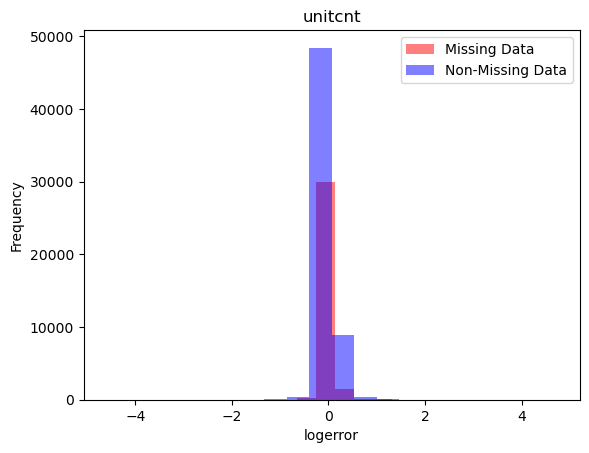

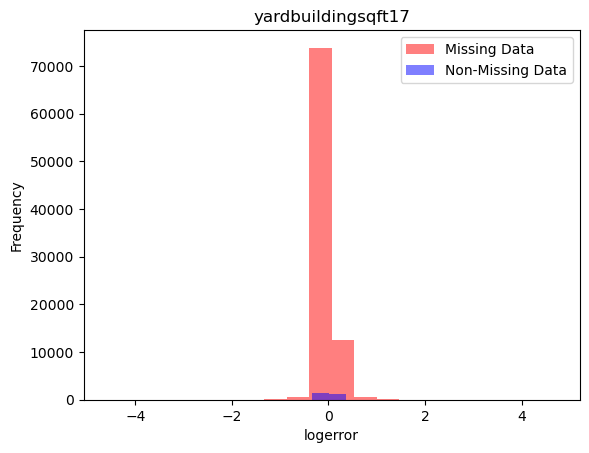

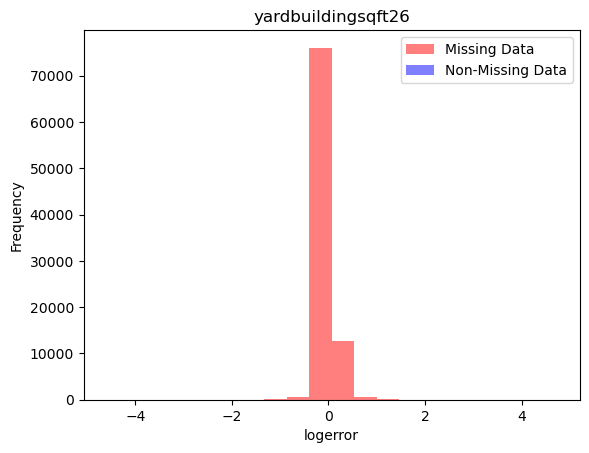

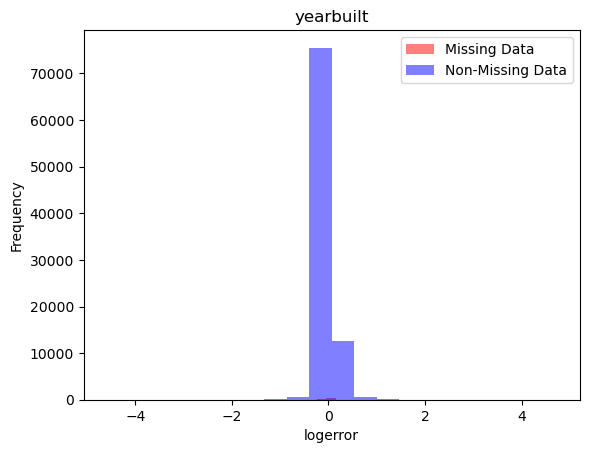

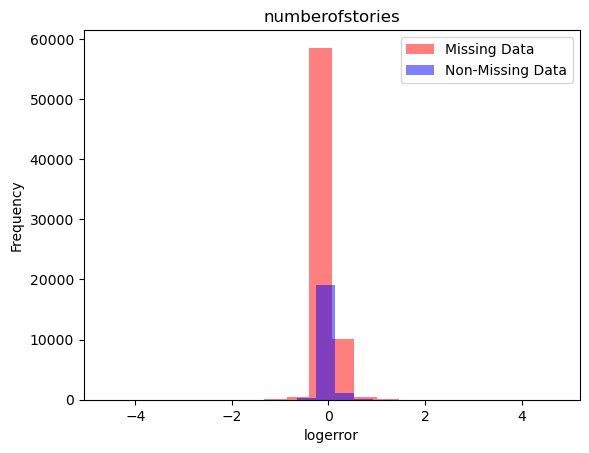

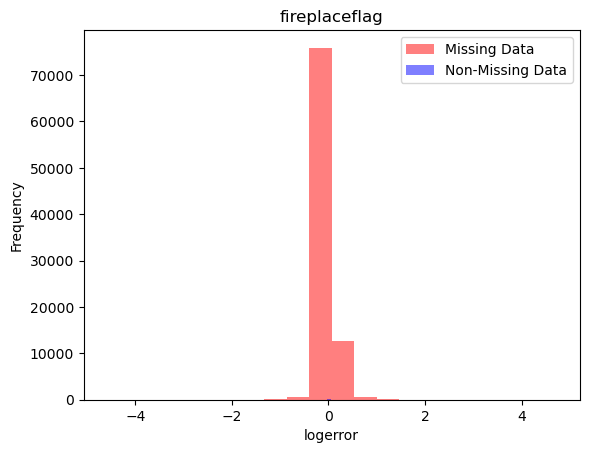

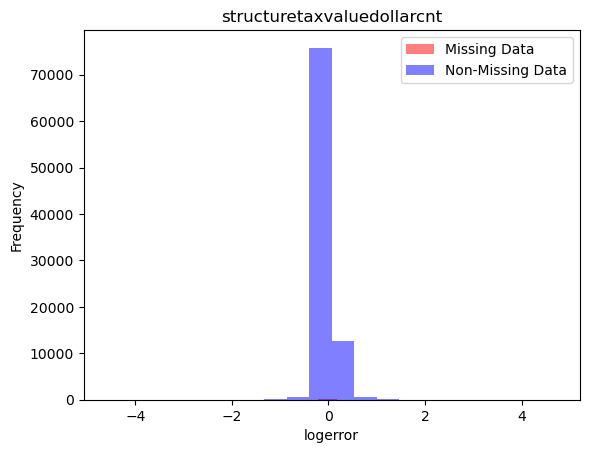

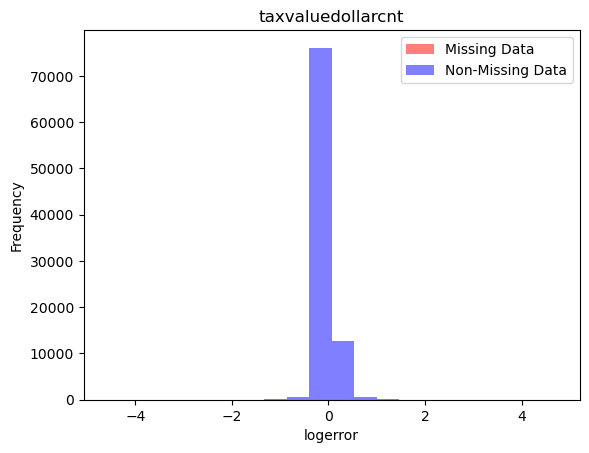

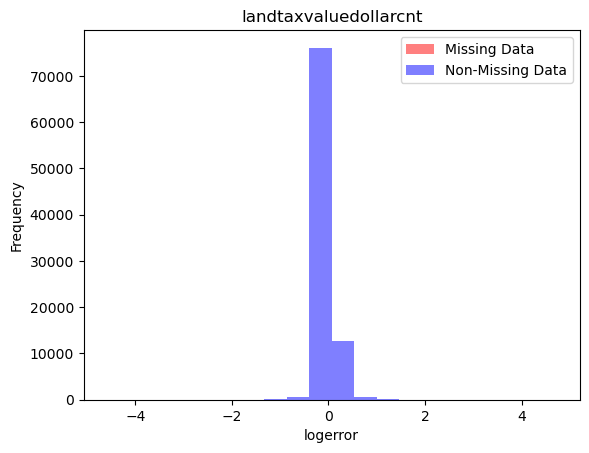

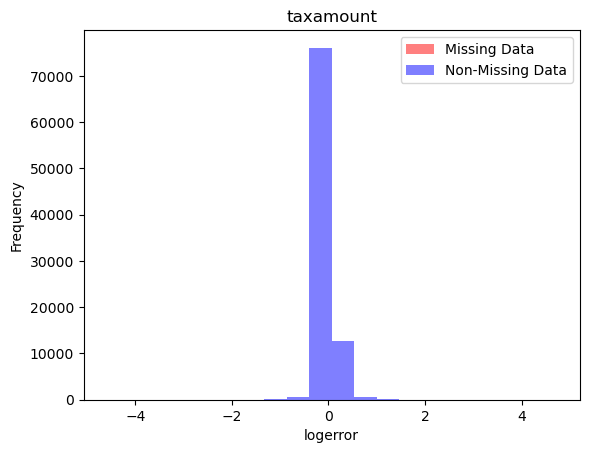

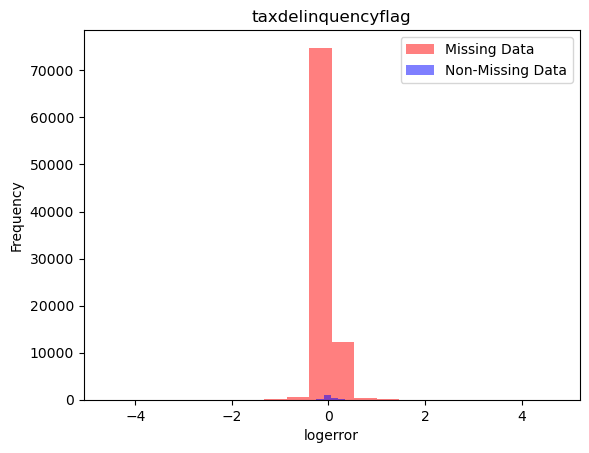

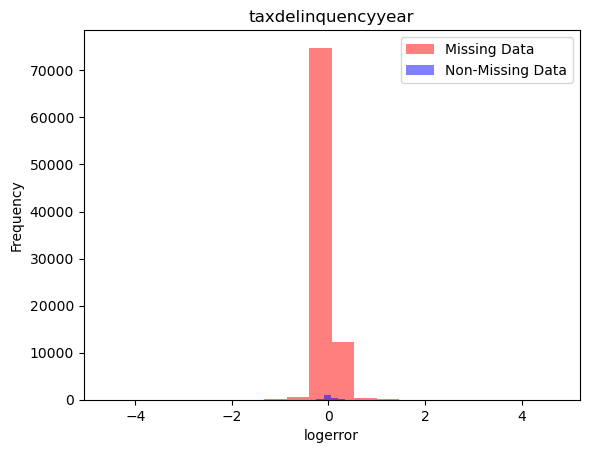

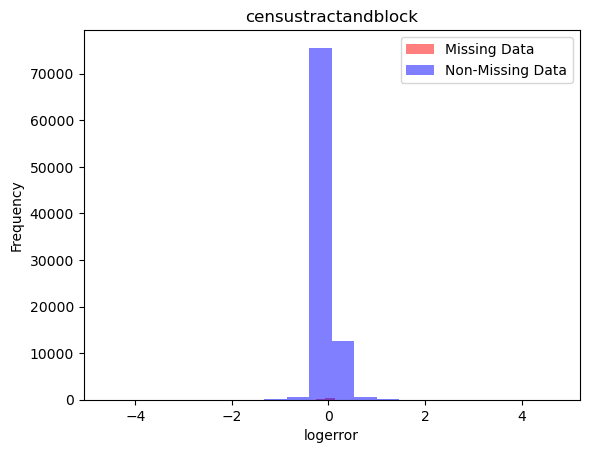

In [30]:


def analyze_missing_values(data, var):
    new_data = data.copy()
    new_data[var] = np.where(new_data[var].isnull(), 1, 0)
    
    # Use plt.hist() to create a histogram
    plt.hist(new_data[new_data[var] == 1]['logerror'], bins=20, alpha=0.5, label='Missing Data', color='red')
    plt.hist(new_data[new_data[var] == 0]['logerror'], bins=20, alpha=0.5, label='Non-Missing Data', color='blue')
    
    plt.title(var)
    plt.xlabel('logerror')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

for var in missing_values:
    analyze_missing_values(copy_data, var)


In [17]:
print('Total number of variables with Missing Values: ', len(missing_values))

Total number of variables with Missing Values:  47


In [ ]:
# Numerical Values

In [18]:
numerical_values = []
for var in copy_data.columns:
    if copy_data[var].dtypes!='O':
        numerical_values.append(var)

print('Total number of Numerical Data: ', len(numerical_values))

Total number of Numerical Data:  54


In [19]:
copy_data[numerical_values].head()

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  17073783                    NaN                       NaN           NaN   
1  17088994                    NaN                       NaN           NaN   
2  17100444                    NaN                       NaN           NaN   
3  17102429                    NaN                       NaN           NaN   
4  17109604                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          2.5         3.0                  NaN                    NaN   
1          1.0         2.0                  NaN                    NaN   
2          2.0         3.0                  NaN                    NaN   
3          1.5         2.0                  NaN                    NaN   
4          2.5         4.0                  NaN                    NaN   

   calculatedbathnbr  decktypeid  ...  yearbuilt  numberofstories  \
0                2.5         NaN  ...     1986.0              2.0   
1                1.0         NaN  ...     1990.0              1.0   
2                2.0         NaN  ...     1956.0              1.0   
3                1.5         NaN  ...     1965.0              1.0   
4                2.5         NaN  ...     1984.0              2.0   

   structuretaxvaluedollarcnt  taxvaluedollarcnt  assessmentyear  \
0                    115087.0           191811.0          2015.0   
1                    143809.0           239679.0          2015.0   
2                     33619.0            47853.0          2015.0   
3                     45609.0            62914.0          2015.0   
4                    277000.0           554000.0          2015.0   

   landtaxvaluedollarcnt  taxamount  taxdelinquencyyear  censustractandblock  \
0                76724.0    2015.06                 NaN         6.111002e+13   
1                95870.0    2581.30                 NaN         6.111002e+13   
2                14234.0     591.64                 NaN         6.111001e+13   
3                17305.0     682.78                 NaN         6.111001e+13   
4               277000.0    5886.92                 NaN         6.111001e+13   

   logerror  
0    0.0953  
1    0.0198  
2    0.0060  
3   -0.0566  
4    0.0573  

[5 rows x 54 columns]

In [ ]:
# Categorical Variables

In [20]:
categorical_variables = []
for var in copy_data.columns:
    if copy_data[var].dtypes=='O':
        categorical_variables.append(var)
        
print('Total number of Categorical Variables: ', len(categorical_variables))

Total number of Categorical Variables:  6


In [21]:
copy_data[categorical_variables].head()

hashottuborspa propertycountylandusecode propertyzoningdesc fireplaceflag  \
0            NaN                      1128                NaN           NaN   
1            NaN                      1129                NaN           NaN   
2            NaN                      1111                NaN           NaN   
3            NaN                      1110                NaN           NaN   
4            NaN                      1111                NaN           NaN   

  taxdelinquencyflag transactiondate  
0                NaN      2016-01-27  
1                NaN      2016-03-30  
2                NaN      2016-05-27  
3                NaN      2016-06-07  
4                NaN      2016-08-08

In [ ]:
# Printing number of unique categories in each categorical variable

In [22]:
for var in categorical_variables:
    print(var, '=====', len(copy_data[var].unique()), "Categories")

hashottuborspa ===== 2 Categories
propertycountylandusecode ===== 78 Categories
propertyzoningdesc ===== 1997 Categories
fireplaceflag ===== 2 Categories
taxdelinquencyflag ===== 2 Categories
transactiondate ===== 352 Categories


In [ ]:
# Categories that are rarely occurring or present in less than 1% of the observations

In [23]:
# percentage_r = rare percentage
def analyze_rare_columns(data, var, percentage_r):
    new_data = data.copy()
    # % of observations per category
    temp = new_data.groupby(var)['logerror'].count()/len(new_data)
    return temp[temp < percentage_r]

for var in categorical_variables:
    print(analyze_rare_columns(copy_data, var, 0.01))
    print()

Series([], Name: logerror, dtype: float64)

propertycountylandusecode
0       0.000011
010     0.000011
0102    0.000033
0103    0.001108
0104    0.003855
          ...   
38      0.001174
6050    0.000011
73      0.000122
8800    0.000011
96      0.001152
Name: logerror, Length: 65, dtype: float64

propertyzoningdesc
1NR1*         0.000044
1NR3*         0.000033
AH RM-CD*     0.000089
AH RM-CD-F    0.000044
AH RS(3)10    0.000011
                ...   
WVRPD40000    0.000011
WVRPD4OOOO    0.000222
WVRPD56*      0.000033
WVRR          0.000022
WVRR1-RPD1    0.000100
Name: logerror, Length: 1988, dtype: float64

fireplaceflag
True    0.002459
Name: logerror, dtype: float64

Series([], Name: logerror, dtype: float64)

transactiondate
2016-01-01    0.000033
2016-01-02    0.000066
2016-01-03    0.000554
2016-01-04    0.002880
2016-01-05    0.003201
                ...   
2016-12-26    0.000166
2016-12-27    0.000565
2016-12-28    0.000864
2016-12-29    0.001296
2016-12-30    0.001041
Name:

In [ ]:
# Temporal Variables associated with time

In [24]:
year_variables = []
for var in numerical_values:
    if 'Yr' in var or 'year' in var:
        year_variables.append(var)
        
len(year_variables), year_variables

(3, ['yearbuilt', 'assessmentyear', 'taxdelinquencyyear'])

In [ ]:
# Relation Between Temporal Variables and logerror

Text(0.5, 1.0, 'Year Difference vs logerror')

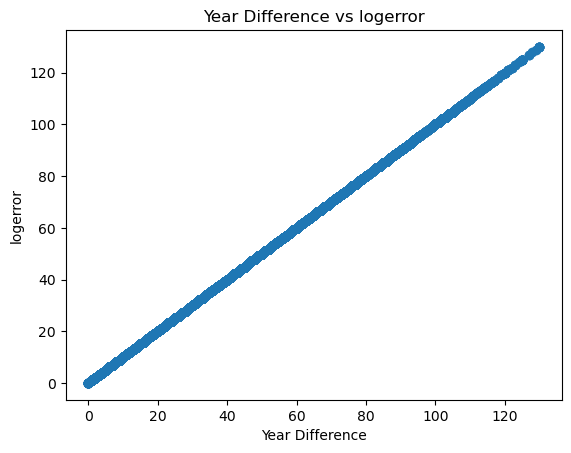

In [26]:
copy2_data = copy_data.copy()

# Difference between year variable and year the house was sold
copy2_data[var] = copy2_data['assessmentyear'] - copy2_data['yearbuilt']

# plt.ylim(-5, 4)
plt.scatter(copy2_data[var], copy2_data['logerror'])
plt.xlabel('Year Difference')
plt.ylabel('logerror')
plt.title('Year Difference vs logerror')

In [ ]:
# Discrete Variables Distribution
# Discrete variables are those variables that have a limited number of distinct values, often categorically representing different groups or options.
# 'discrete_variables' will contain the name sof columsn from 'copy_data' that are considered discrete variables based on the criteria of having fewer than 20 unique values. 

In [27]:
discrete_variables = []
for var in numerical_values:
    if len(copy_data[var].unique()) < 20:
        discrete_variables.append(var)
        
print('Total number of Discrete Variables: ', len(discrete_variables))

Total number of Discrete Variables:  26


In [33]:
copy_data[discrete_variables].head()

airconditioningtypeid  architecturalstyletypeid  bedroomcnt  \
0                    NaN                       NaN         3.0   
1                    NaN                       NaN         2.0   
2                    NaN                       NaN         3.0   
3                    NaN                       NaN         2.0   
4                    NaN                       NaN         4.0   

   buildingclasstypeid  buildingqualitytypeid  decktypeid  \
0                  NaN                    NaN         NaN   
1                  NaN                    NaN         NaN   
2                  NaN                    NaN         NaN   
3                  NaN                    NaN         NaN   
4                  NaN                    NaN         NaN   

   finishedsquarefeet13    fips  fireplacecnt  fullbathcnt  ...  \
0                   NaN  6111.0           NaN          2.0  ...   
1                   NaN  6111.0           NaN          1.0  ...   
2                   NaN  6111.0           NaN          2.0  ...   
3                   NaN  6111.0           1.0          1.0  ...   
4                   NaN  6111.0           1.0          2.0  ...   

   propertylandusetypeid  regionidcounty  roomcnt  storytypeid  \
0                  265.0          2061.0      5.0          NaN   
1                  266.0          2061.0      4.0          NaN   
2                  261.0          2061.0      5.0          NaN   
3                  261.0          2061.0      5.0          NaN   
4                  261.0          2061.0      8.0          NaN   

   threequarterbathnbr  typeconstructiontypeid  unitcnt  numberofstories  \
0                  1.0                     NaN      NaN              2.0   
1                  NaN                     NaN      NaN              1.0   
2                  NaN                     NaN      NaN              1.0   
3                  1.0                     NaN      NaN              1.0   
4                  1.0                     NaN      NaN              2.0   

   assessmentyear  taxdelinquencyyear  
0          2015.0                 NaN  
1          2015.0                 NaN  
2          2015.0                 NaN  
3          2015.0                 NaN  
4          2015.0                 NaN  

[5 rows x 26 columns]

In [ ]:
# The below code visualizes the distributions of discrete variables in the DataFrame by creating histograms for each discrete variable and displaying them one by one. In other words, quick review of the distribution and variation of these variables.

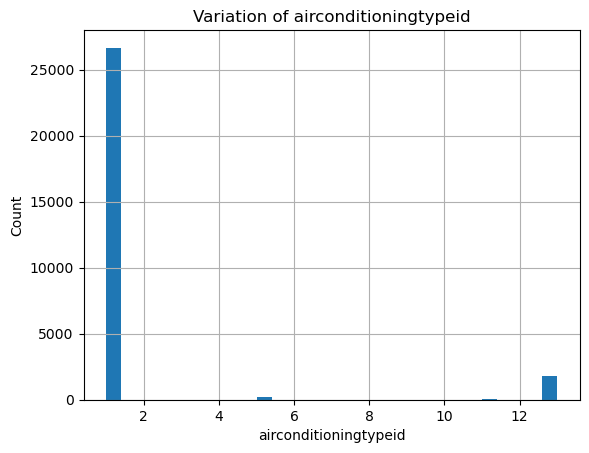

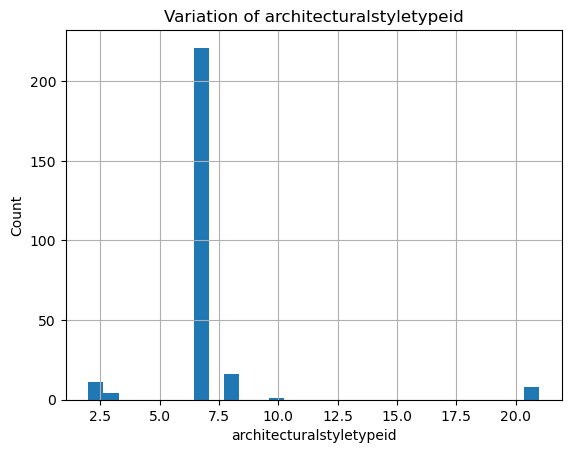

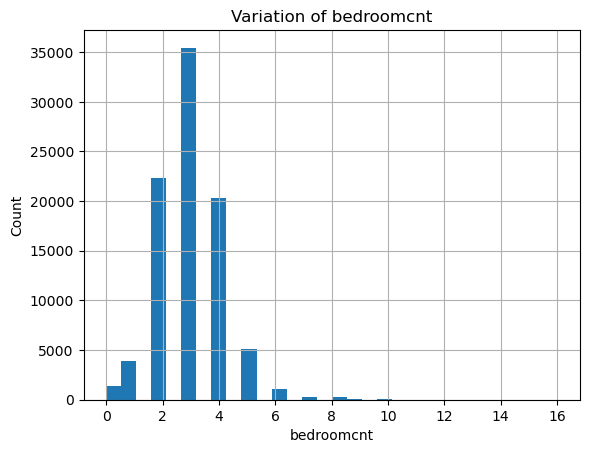

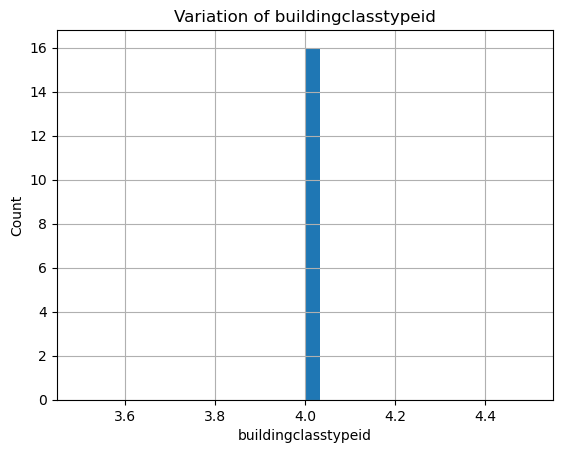

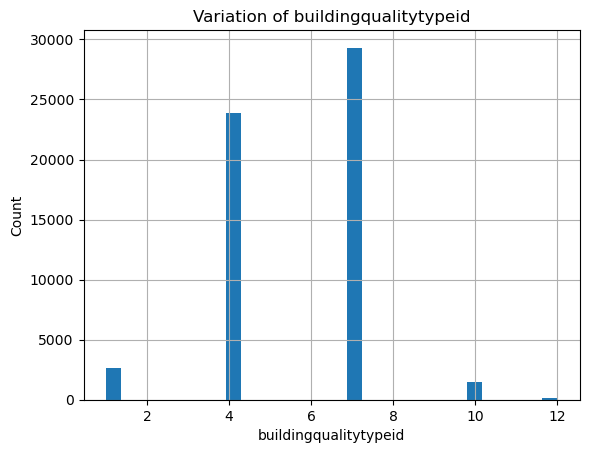

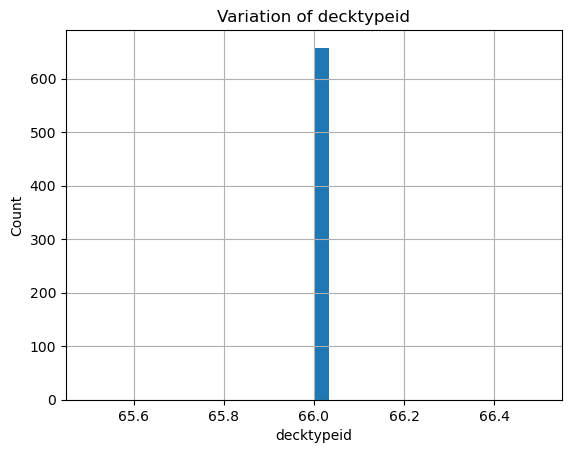

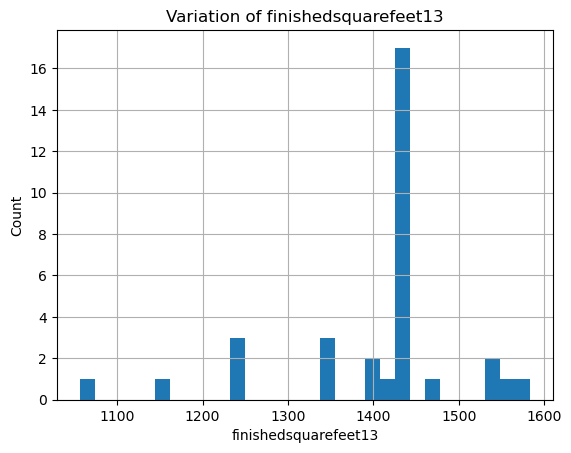

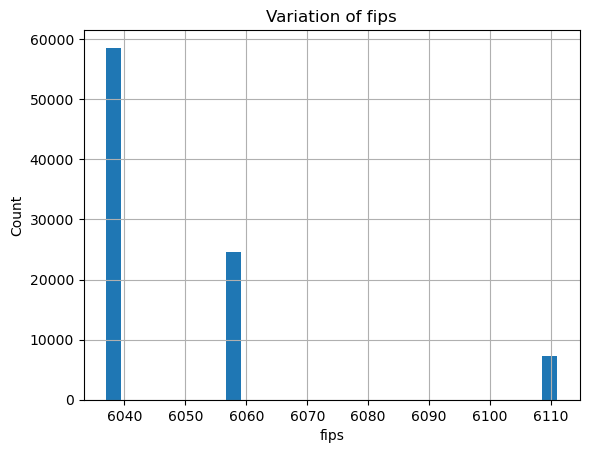

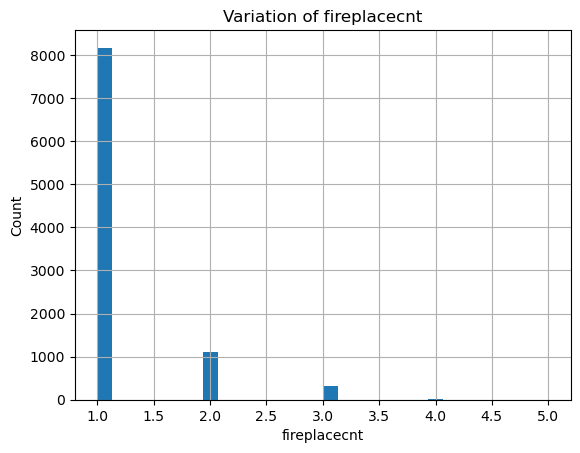

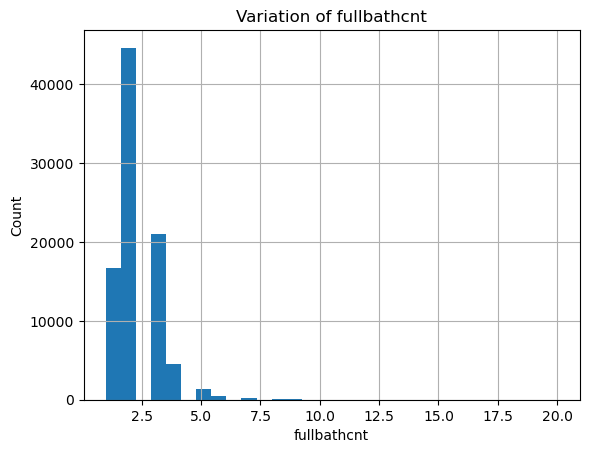

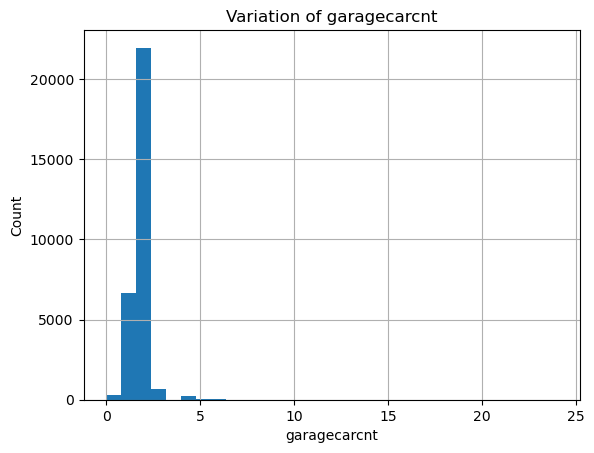

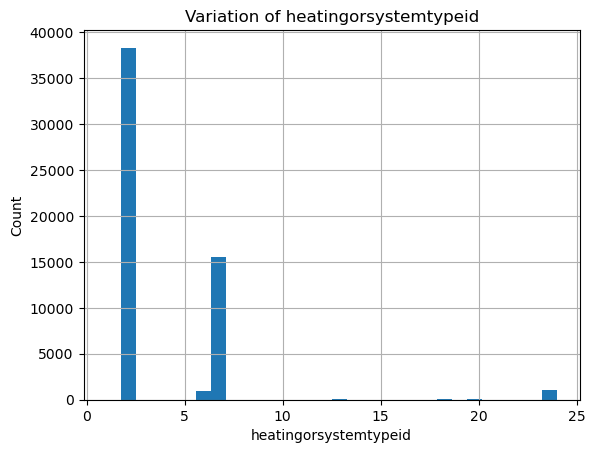

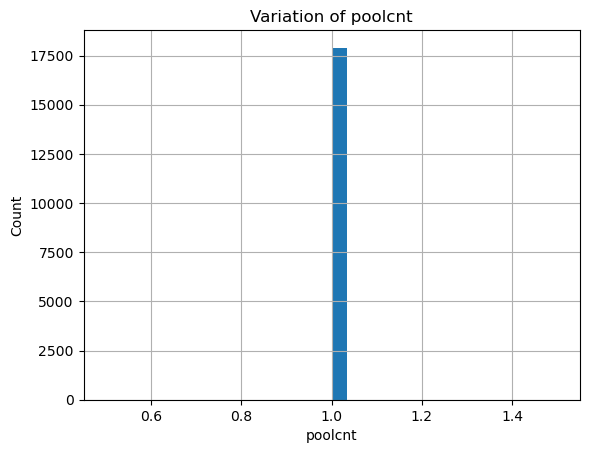

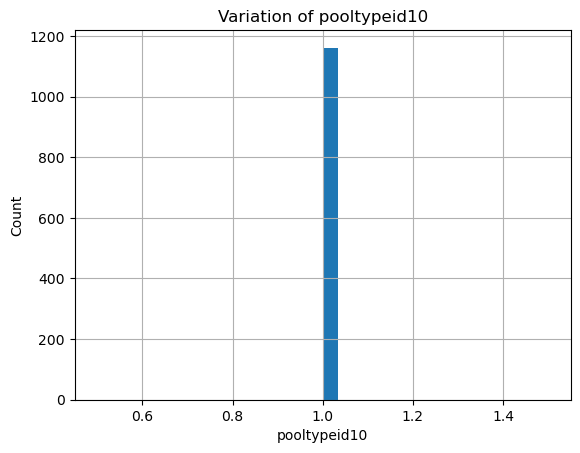

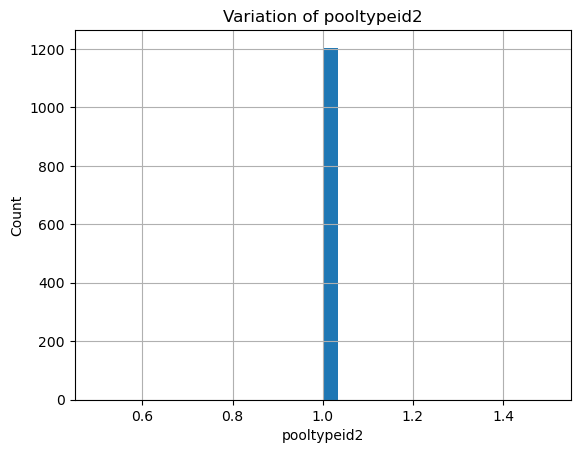

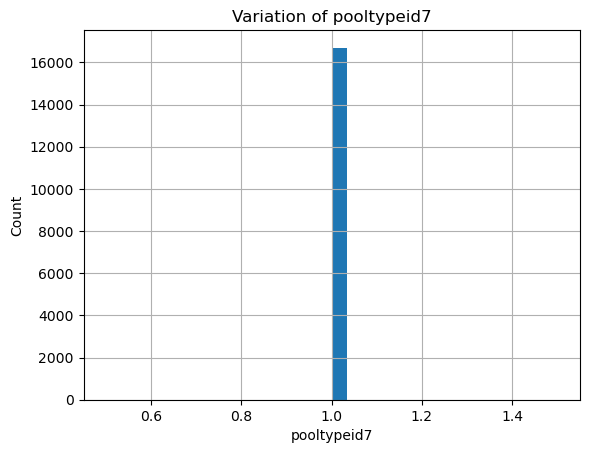

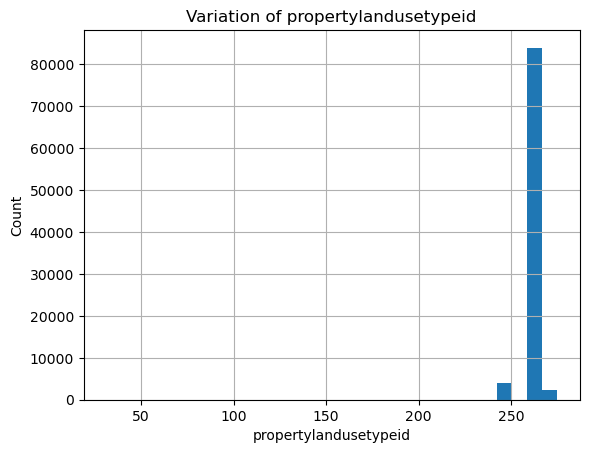

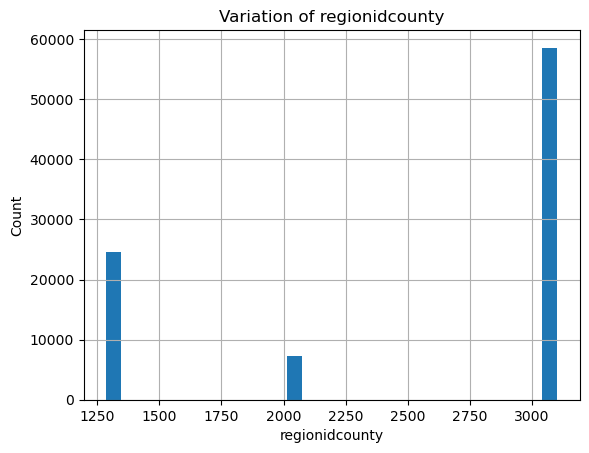

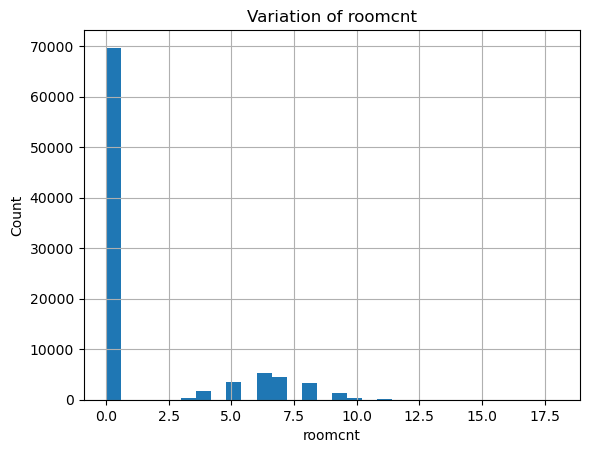

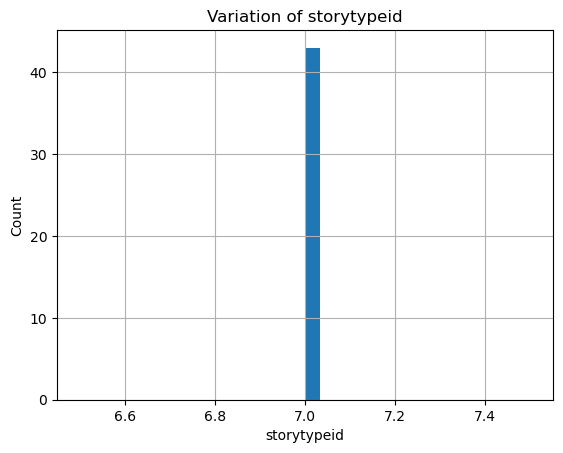

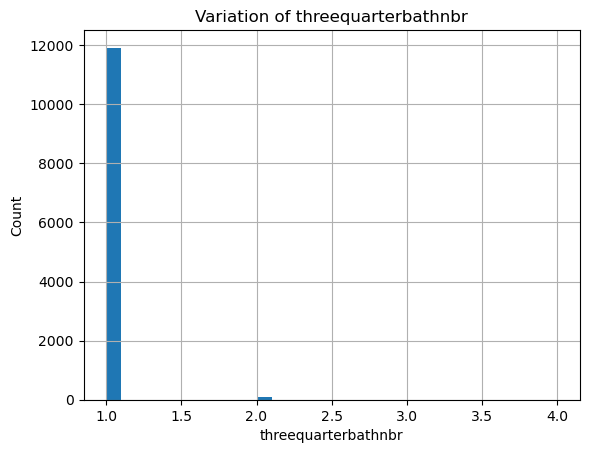

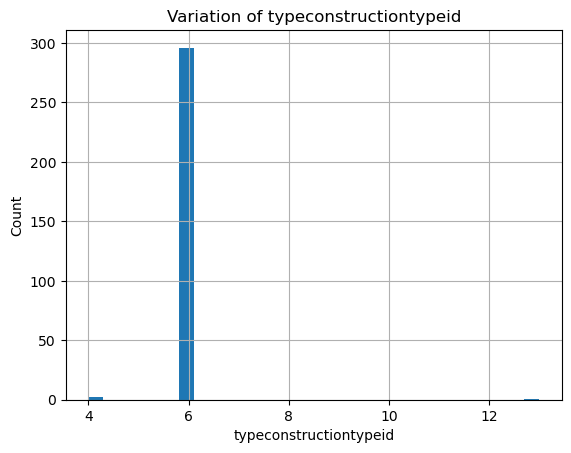

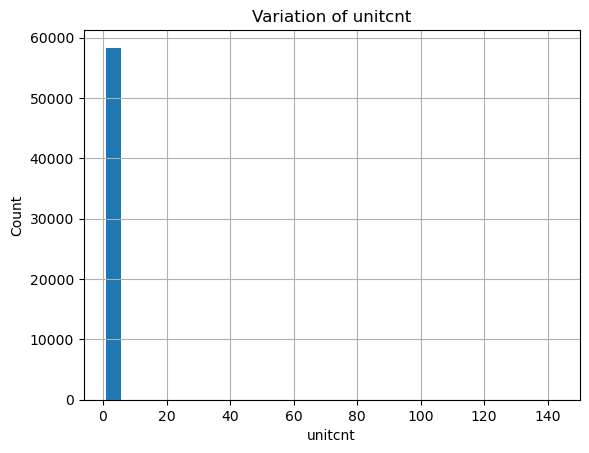

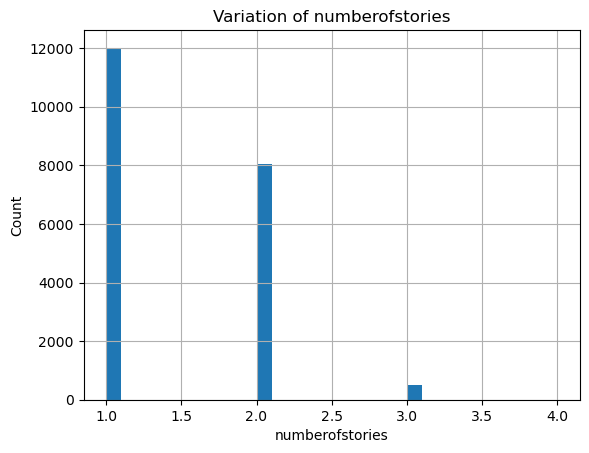

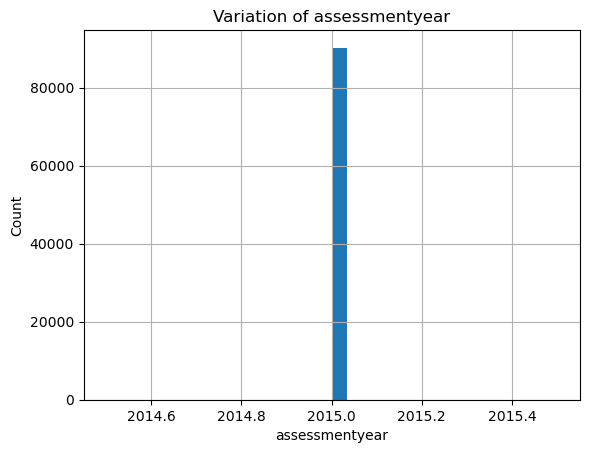

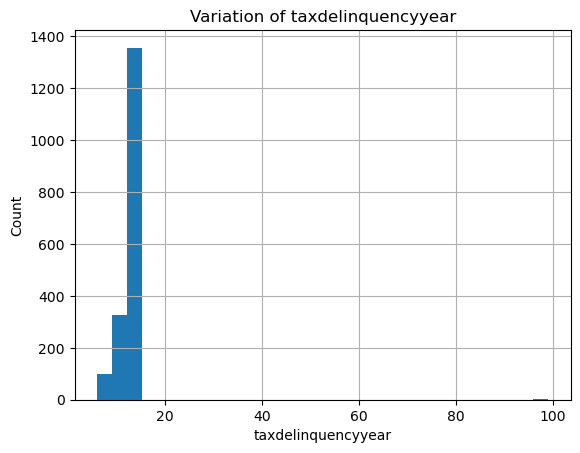

In [28]:
def analyze_discrete_variables(data, var):
    new_data = data.copy()
    new_data[var].hist(bins=30)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+ var)
    plt.show()

for var in discrete_variables:
    analyze_discrete_variables(copy_data, var)

In [ ]:
# Bar Graph equivalent of above Histogram

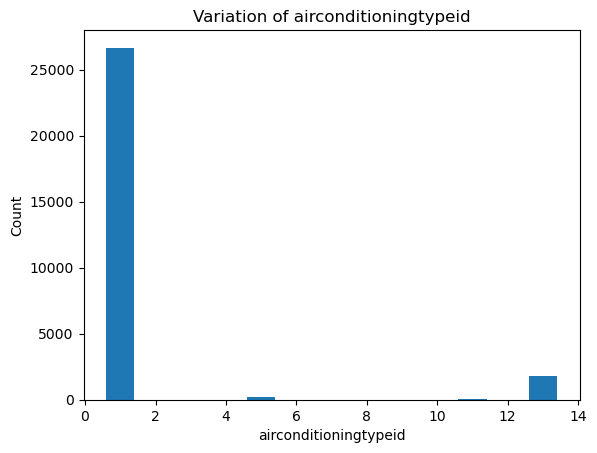

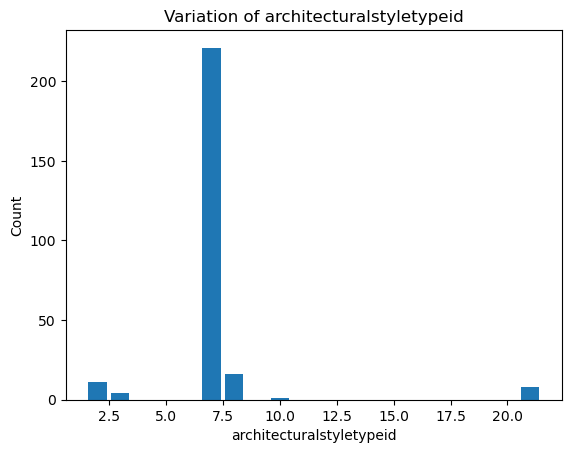

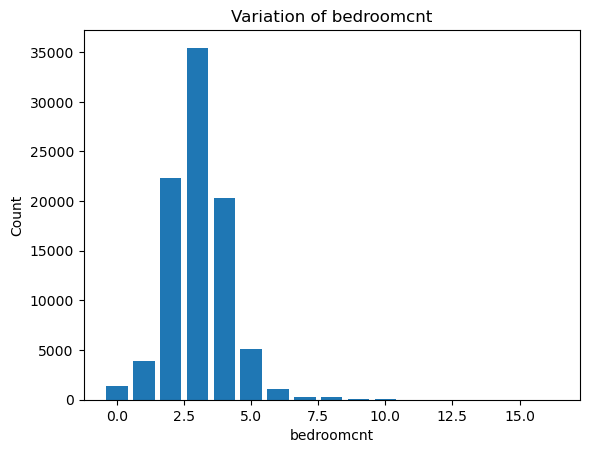

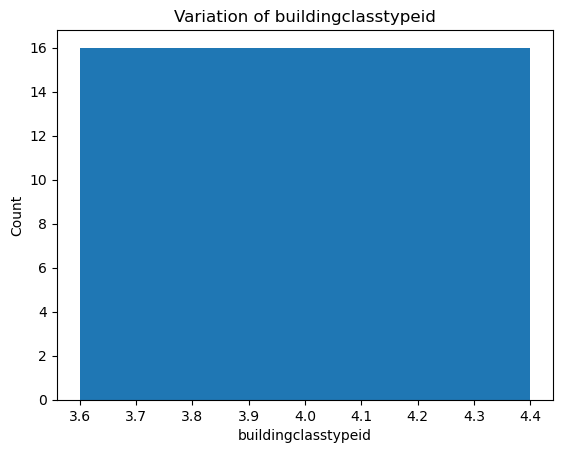

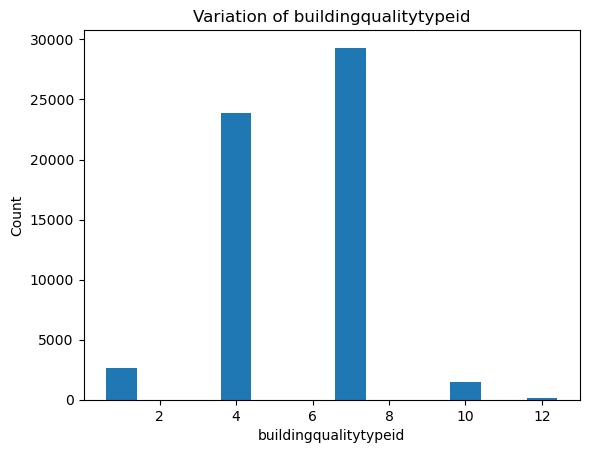

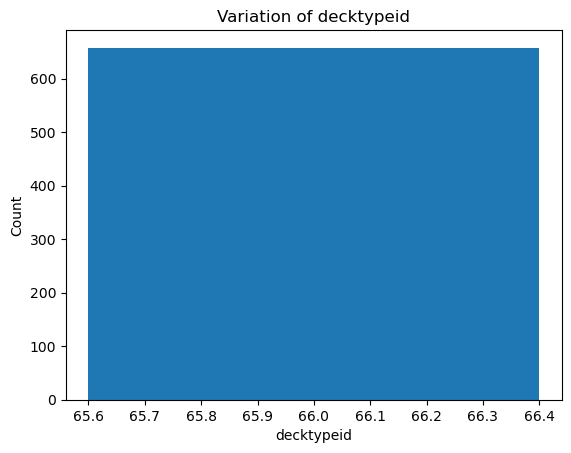

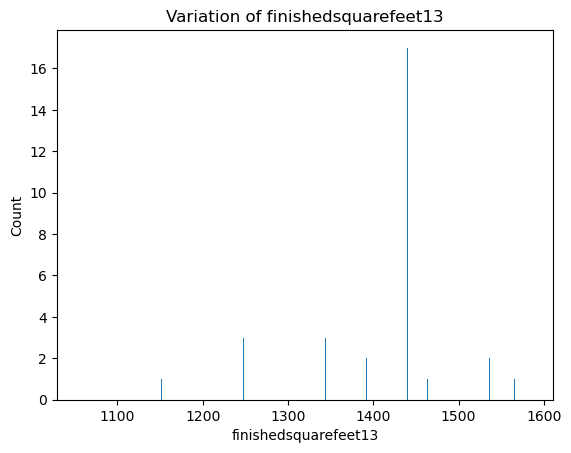

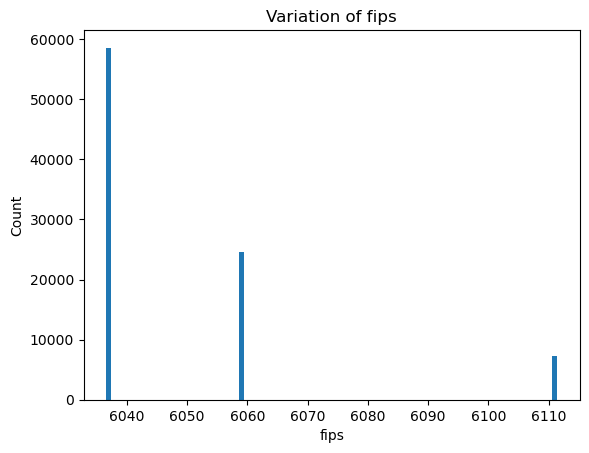

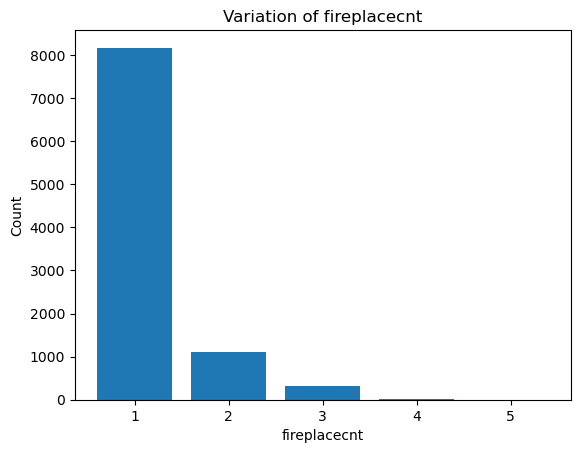

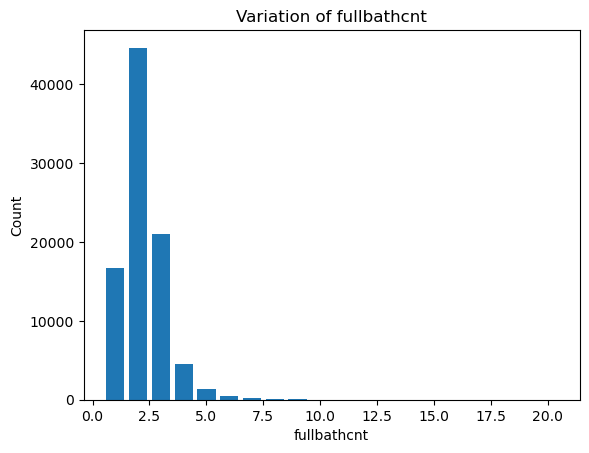

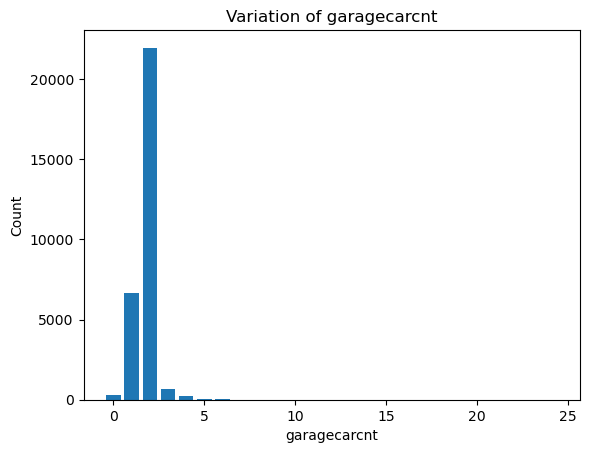

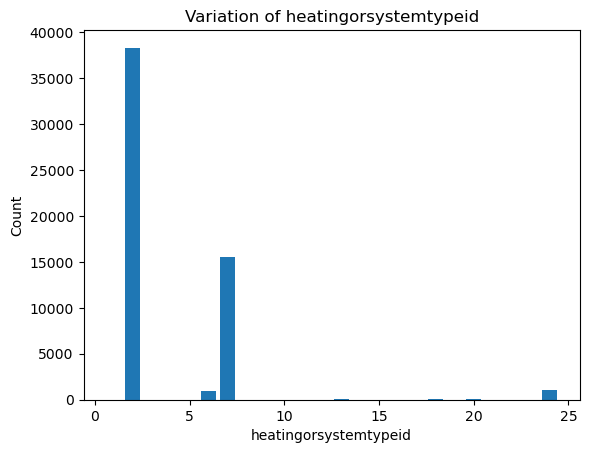

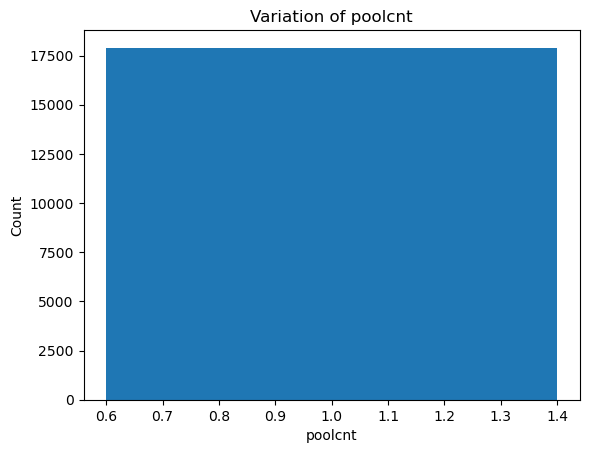

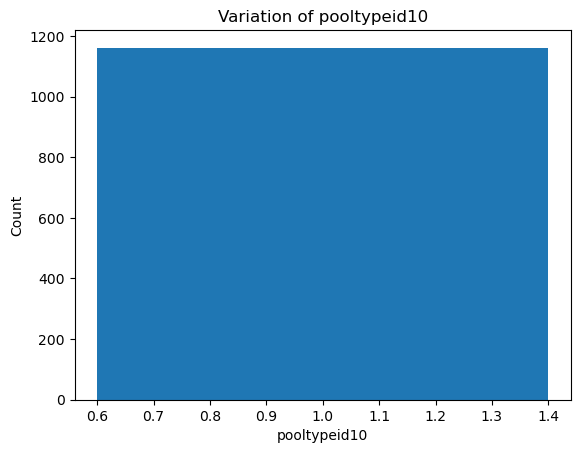

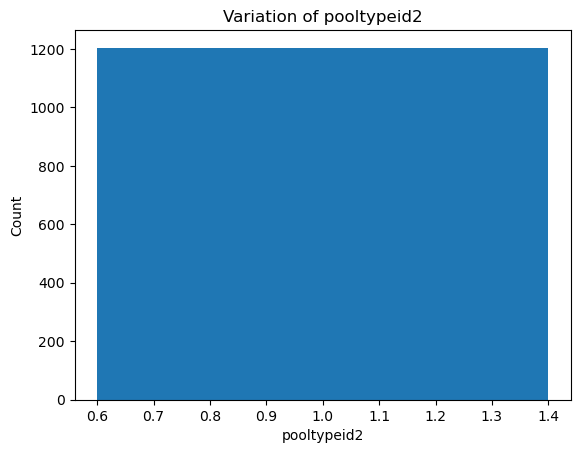

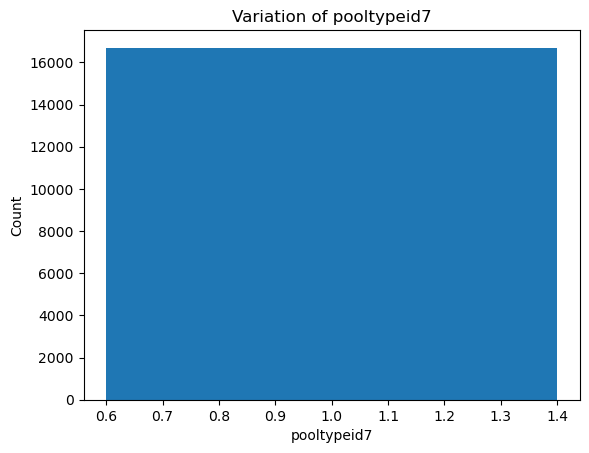

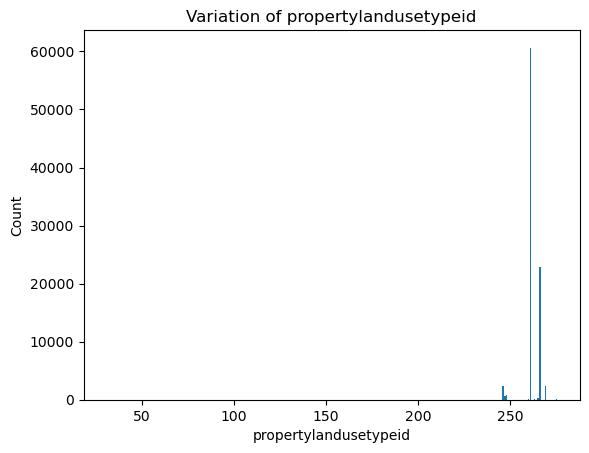

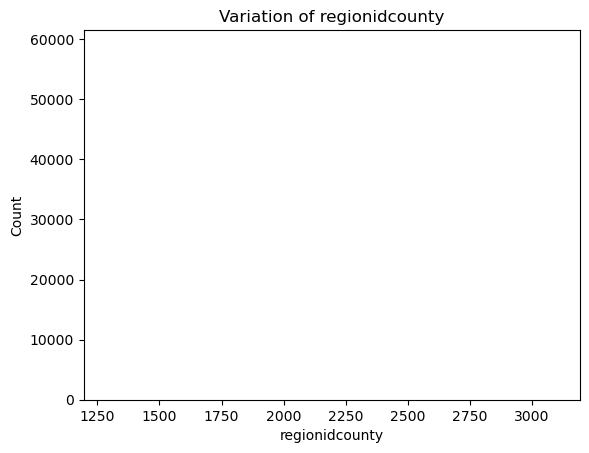

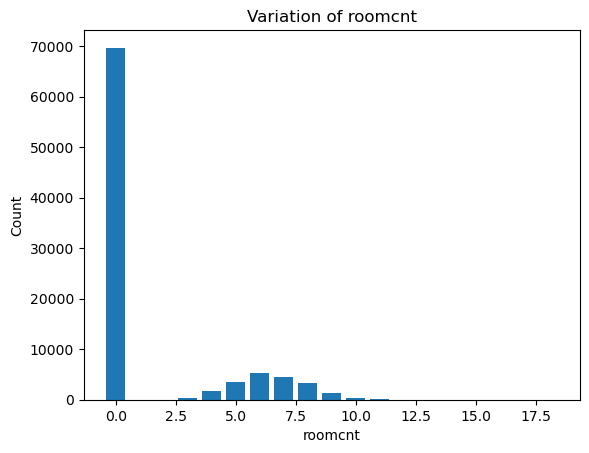

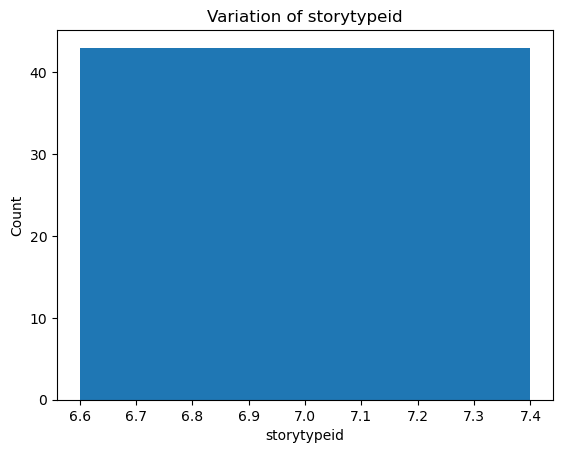

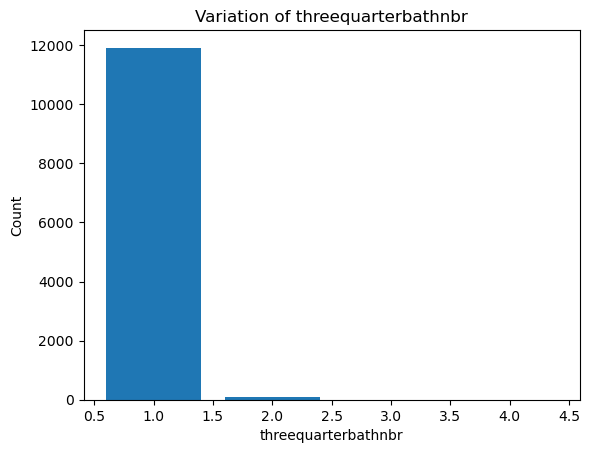

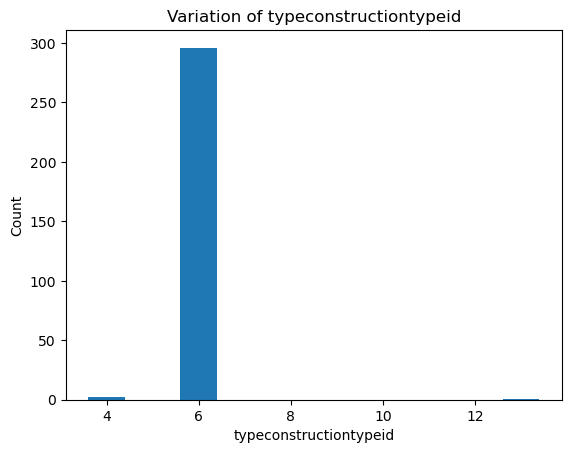

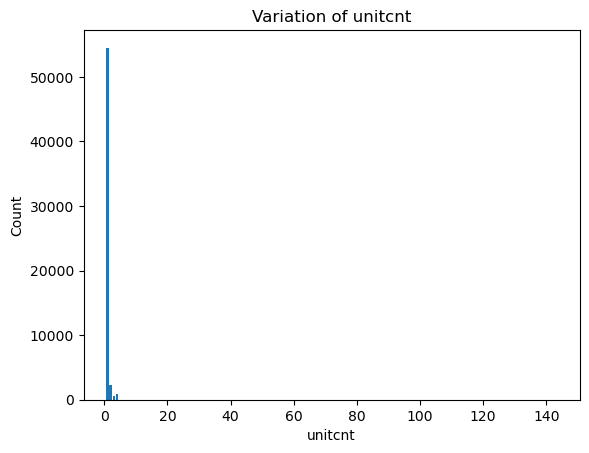

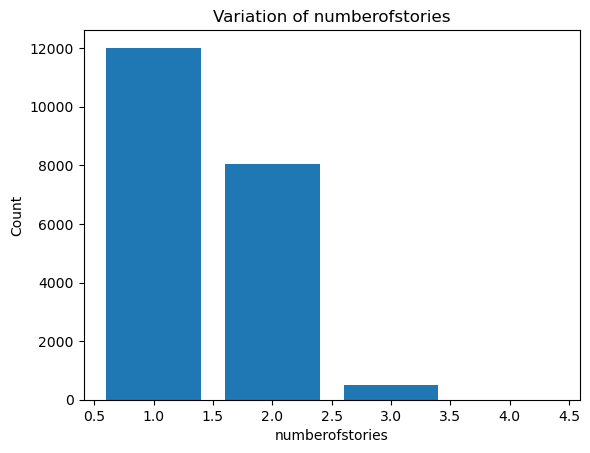

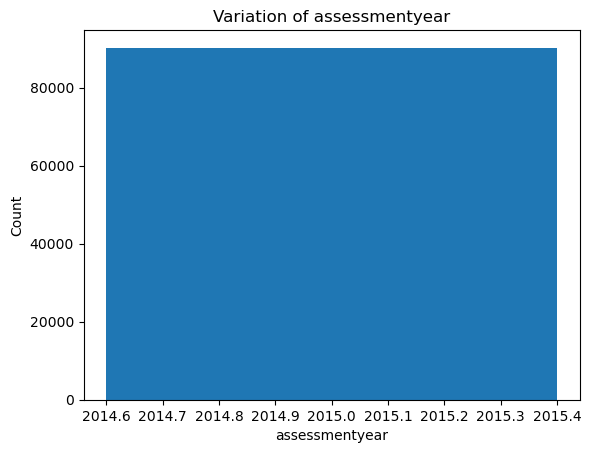

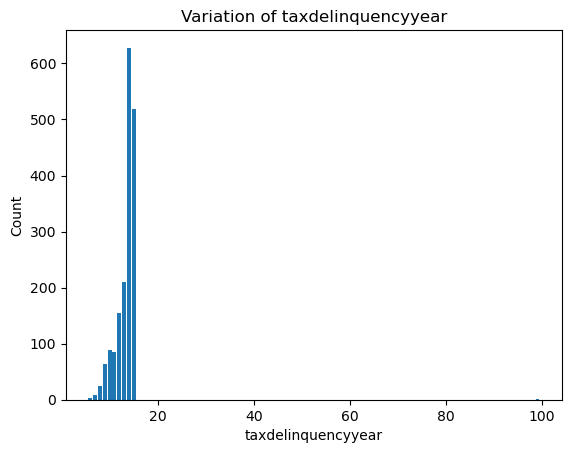

In [35]:
def analyze_discrete_variables(data, var):
    value_counts = data[var].value_counts()
    val = value_counts.index
    cnt = value_counts.values
    
    plt.bar(val, cnt)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+var)
    plt.show()

for var in discrete_variables:
    analyze_discrete_variables(copy_data, var)

In [ ]:
# Continuous Variables Distribution
# Those variables which are not in discrete_variables list as well as not in year_variables list

In [29]:
continuous_variables = []

for var in numerical_values:
    if var not in discrete_variables and year_variables:
        continuous_variables.append(var)
        
print('Total number on Continuous Variables: ', len(continuous_variables))

Total number on Continuous Variables:  28


In [37]:
copy_data[continuous_variables].head()

parcelid  basementsqft  bathroomcnt  calculatedbathnbr  \
0  17073783           NaN          2.5                2.5   
1  17088994           NaN          1.0                1.0   
2  17100444           NaN          2.0                2.0   
3  17102429           NaN          1.5                1.5   
4  17109604           NaN          2.5                2.5   

   finishedfloor1squarefeet  calculatedfinishedsquarefeet  \
0                     548.0                        1264.0   
1                     777.0                         777.0   
2                    1101.0                        1101.0   
3                    1554.0                        1554.0   
4                    1305.0                        2415.0   

   finishedsquarefeet12  finishedsquarefeet15  finishedsquarefeet50  \
0                1264.0                   NaN                 548.0   
1                 777.0                   NaN                 777.0   
2                1101.0                   NaN                1101.0   
3                1554.0                   NaN                1554.0   
4                2415.0                   NaN                1305.0   

   finishedsquarefeet6  ...  regionidzip  yardbuildingsqft17  \
0                  NaN  ...      97081.0               128.0   
1                  NaN  ...      97083.0               198.0   
2                  NaN  ...      97113.0                 NaN   
3                  NaN  ...      97113.0                 NaN   
4                  NaN  ...      97084.0                 NaN   

   yardbuildingsqft26  yearbuilt  structuretaxvaluedollarcnt  \
0                 NaN     1986.0                    115087.0   
1                 NaN     1990.0                    143809.0   
2                 NaN     1956.0                     33619.0   
3                 NaN     1965.0                     45609.0   
4                 NaN     1984.0                    277000.0   

   taxvaluedollarcnt  landtaxvaluedollarcnt  taxamount  censustractandblock  \
0           191811.0                76724.0    2015.06         6.111002e+13   
1           239679.0                95870.0    2581.30         6.111002e+13   
2            47853.0                14234.0     591.64         6.111001e+13   
3            62914.0                17305.0     682.78         6.111001e+13   
4           554000.0               277000.0    5886.92         6.111001e+13   

   logerror  
0    0.0953  
1    0.0198  
2    0.0060  
3   -0.0566  
4    0.0573  

[5 rows x 28 columns]

In [ ]:
# Below Code visualizes the distributions of continuous variables in the DataFrame by creating histogram for each continuous variable and displaying them one by one. In other words, allows for quick review of distribution of these variables.

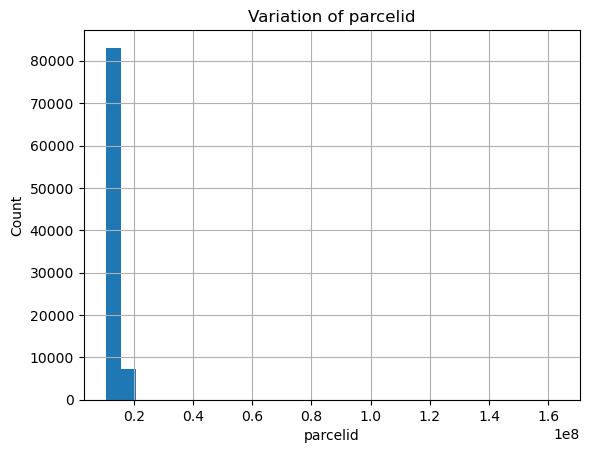

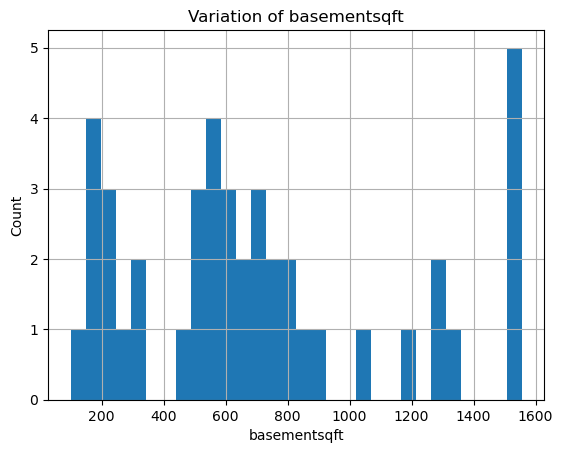

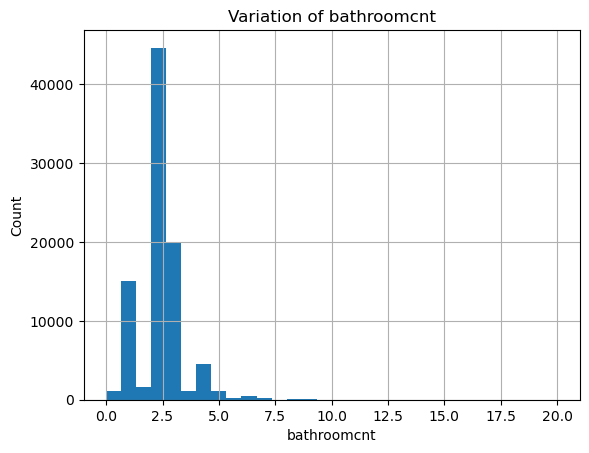

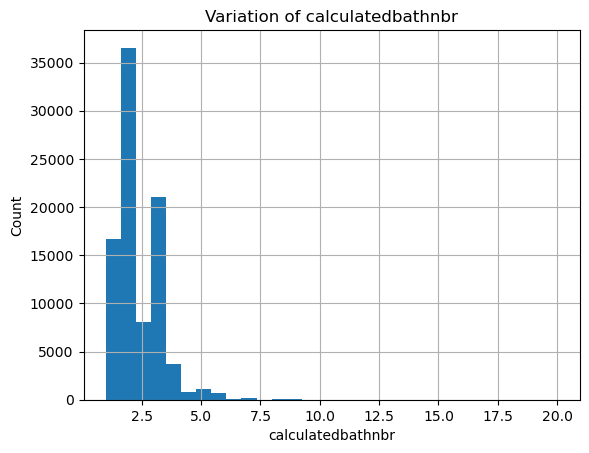

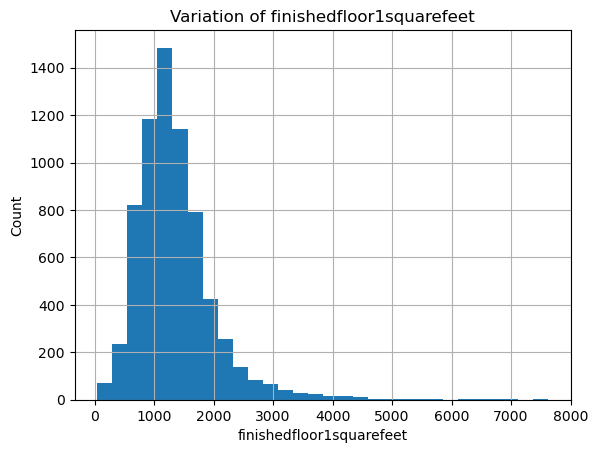

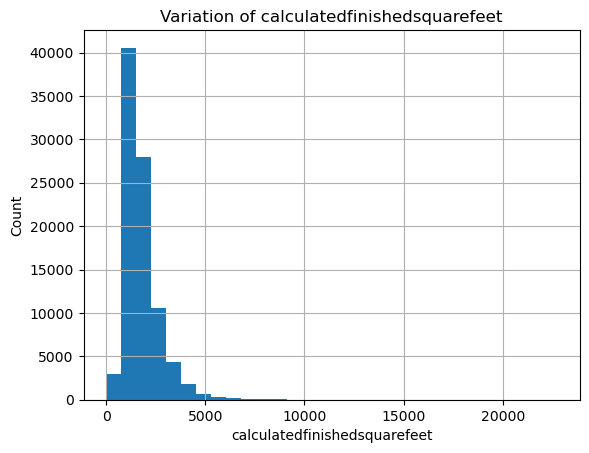

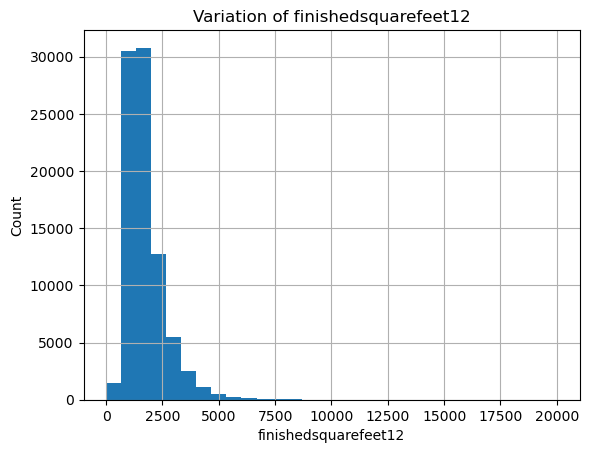

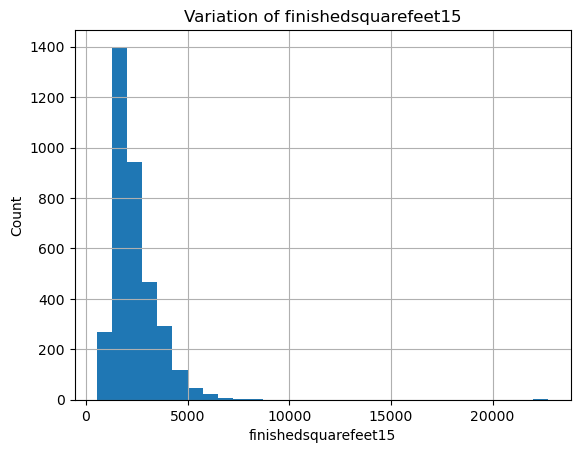

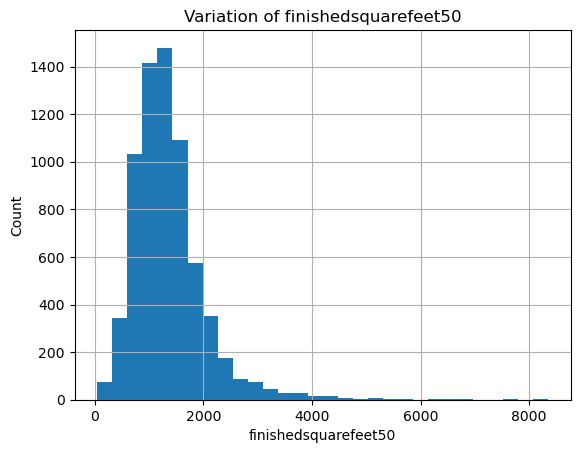

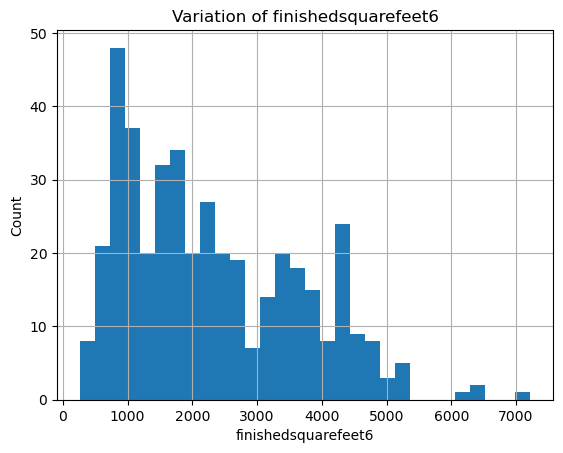

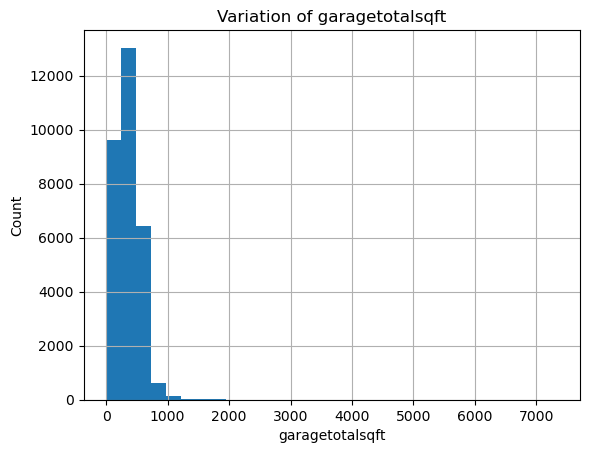

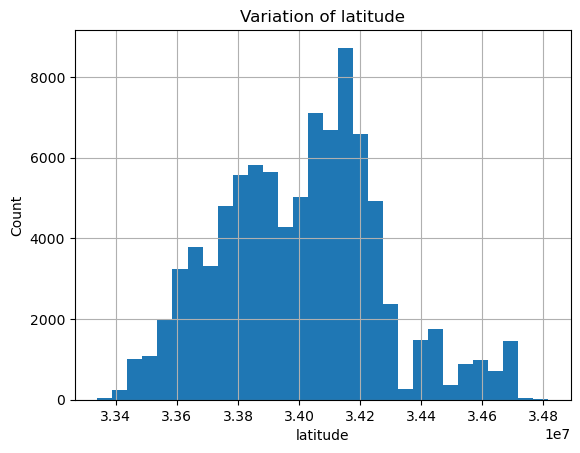

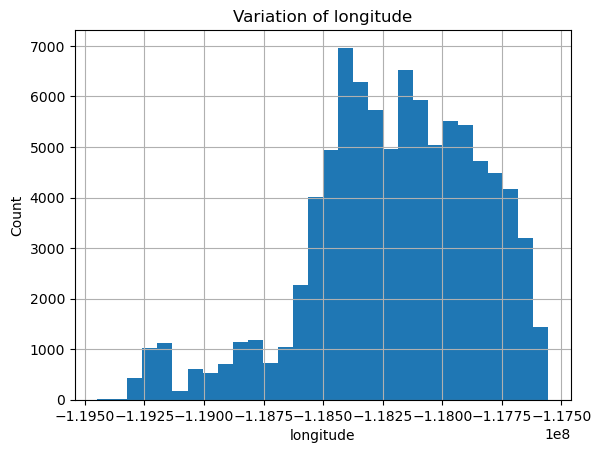

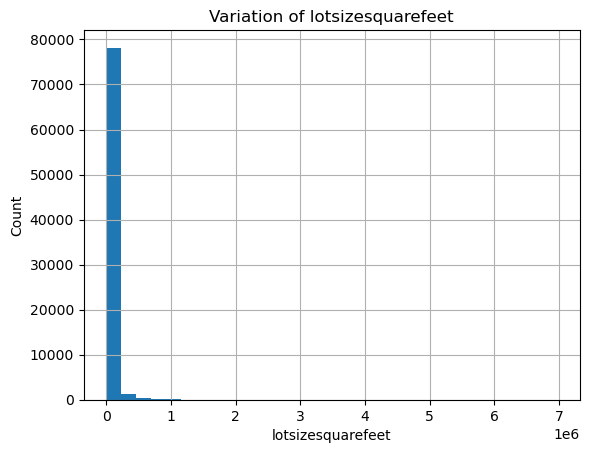

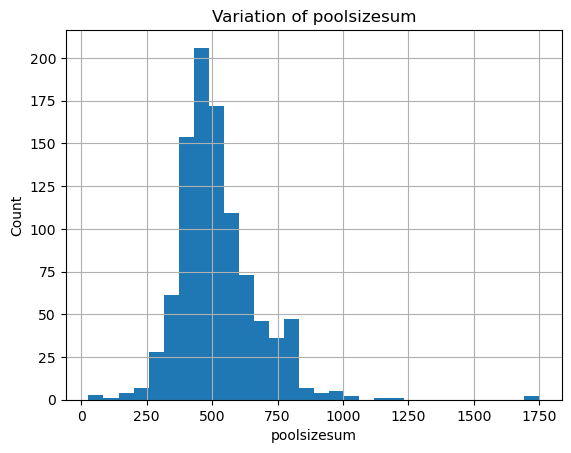

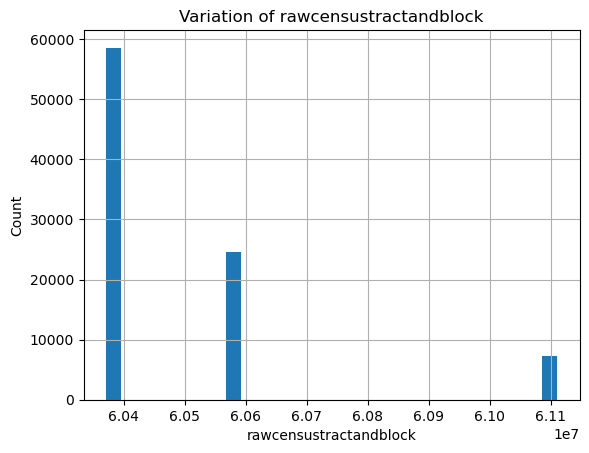

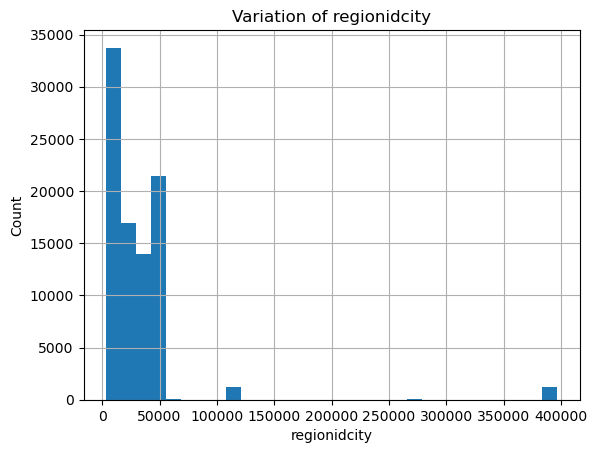

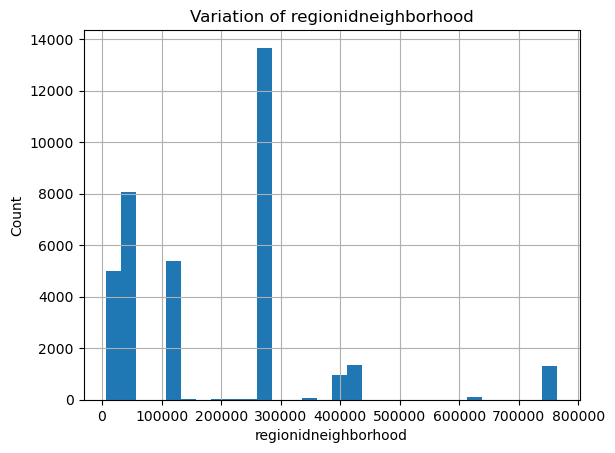

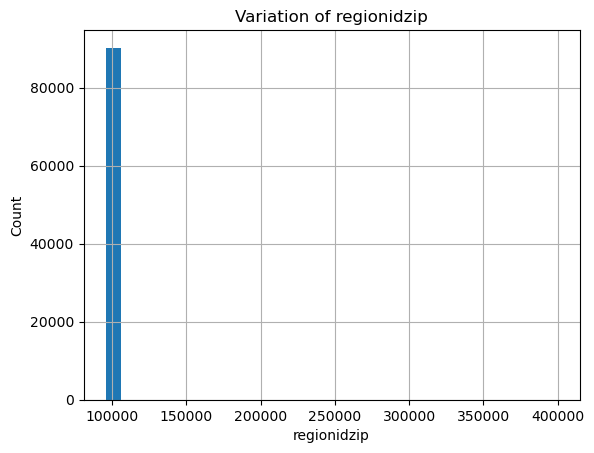

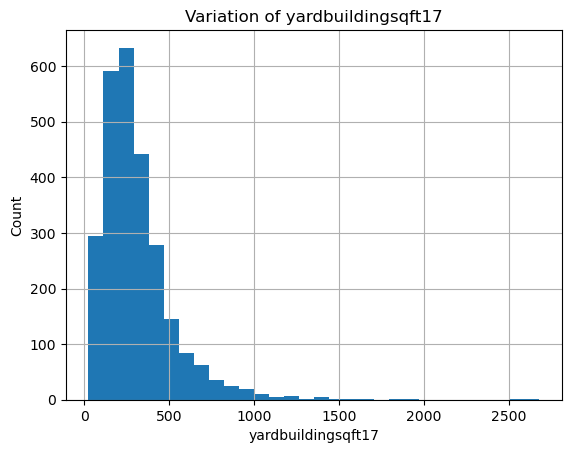

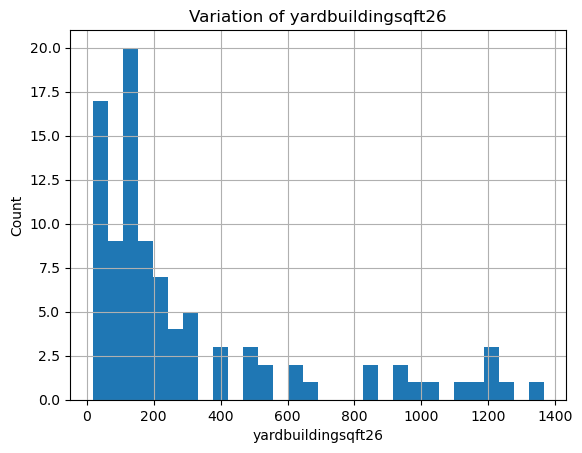

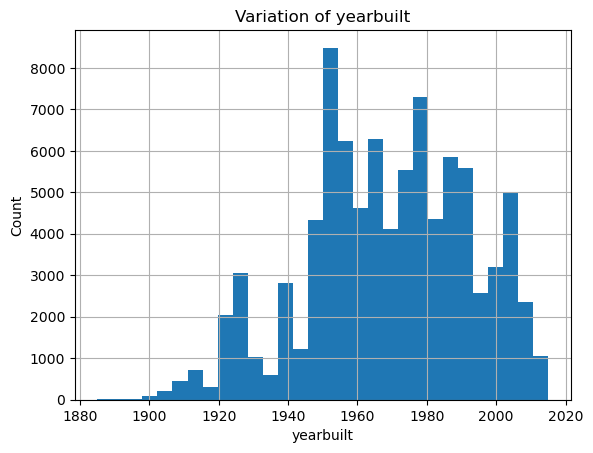

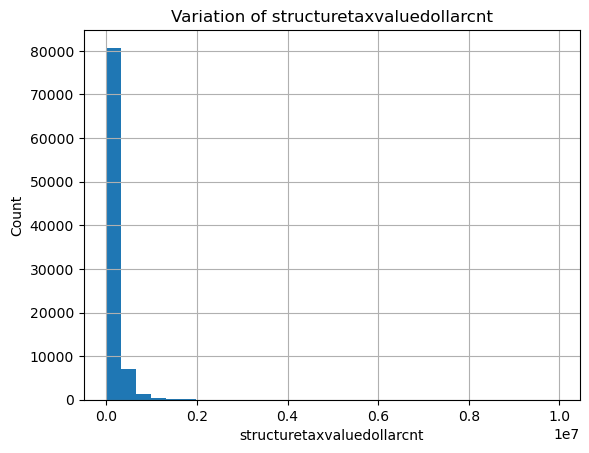

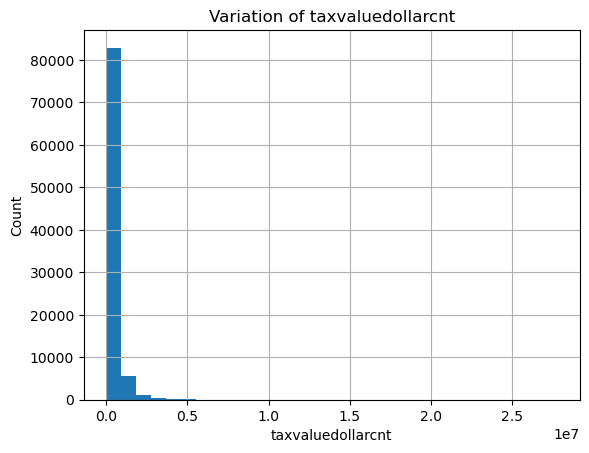

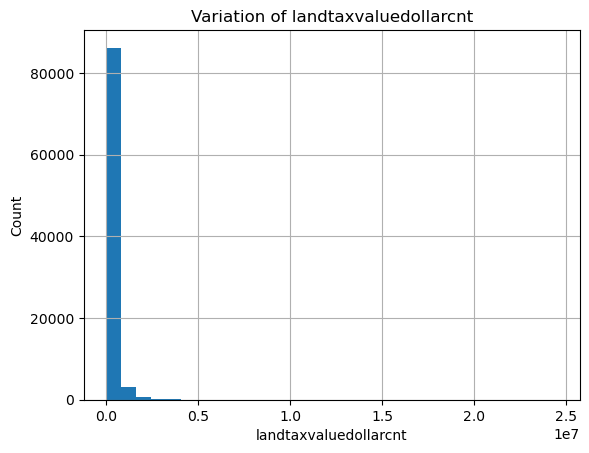

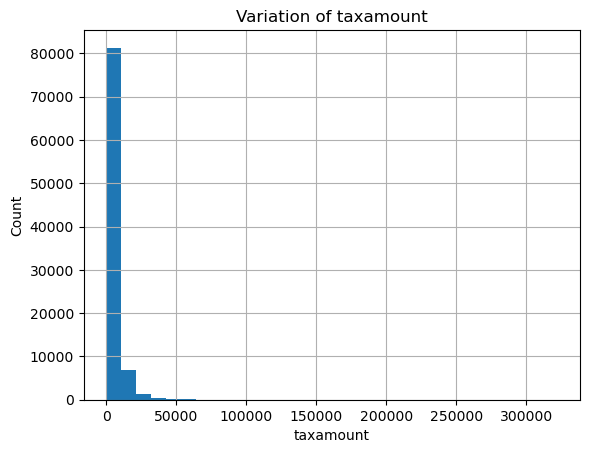

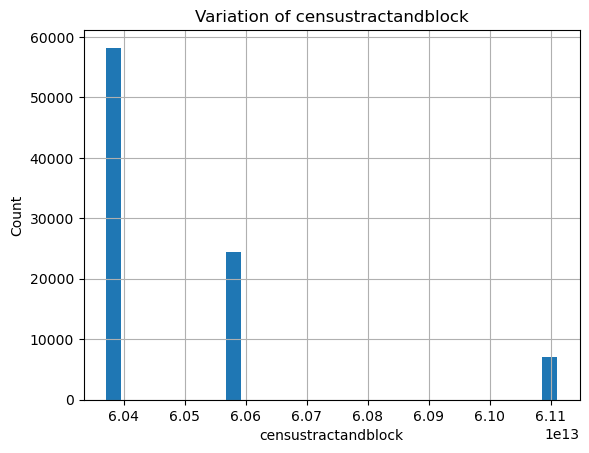

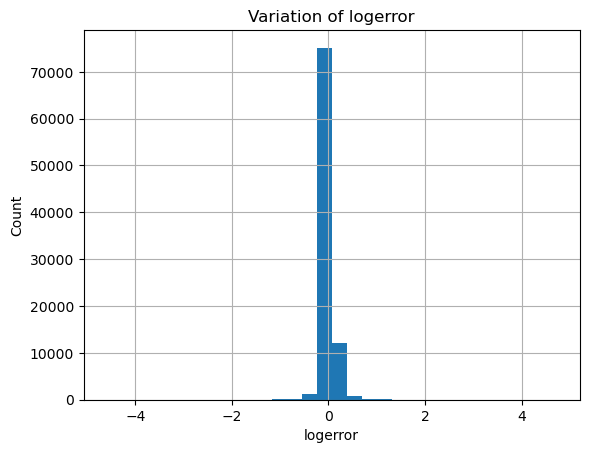

In [30]:
def analyze_continuous_variables(data,var):
    
    new_data = data.copy()
    new_data[var].hist(bins=30)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+ var)
    plt.show()
    
for var in continuous_variables:
    analyze_continuous_variables(copy_data,var)
    

In [ ]:
# Some of the variables are not normally distributed. 

# Logarithmic Transformation of Variables

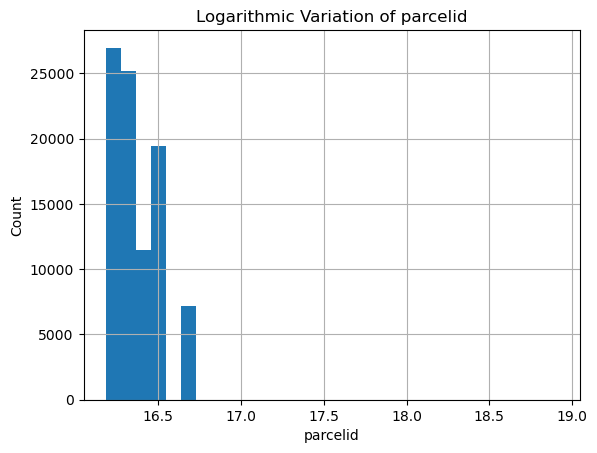

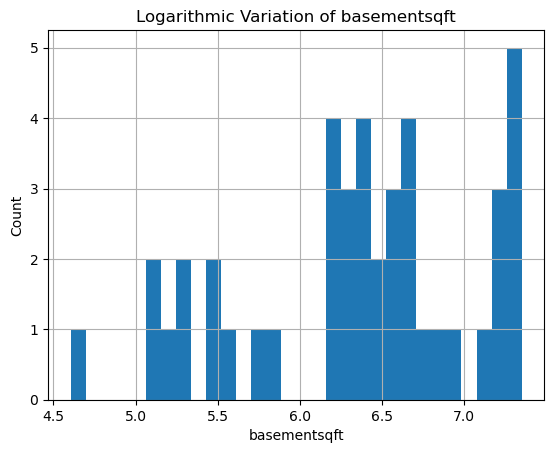

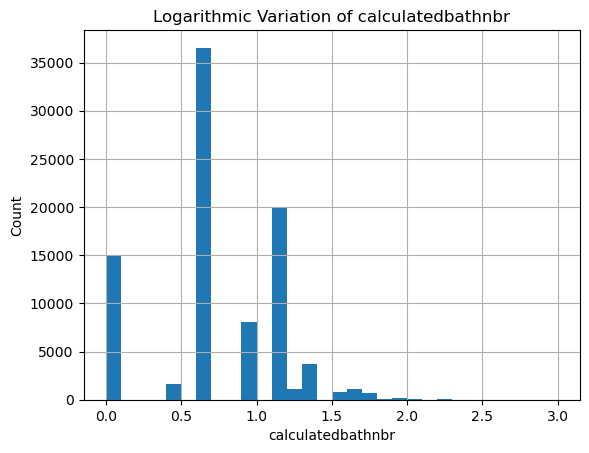

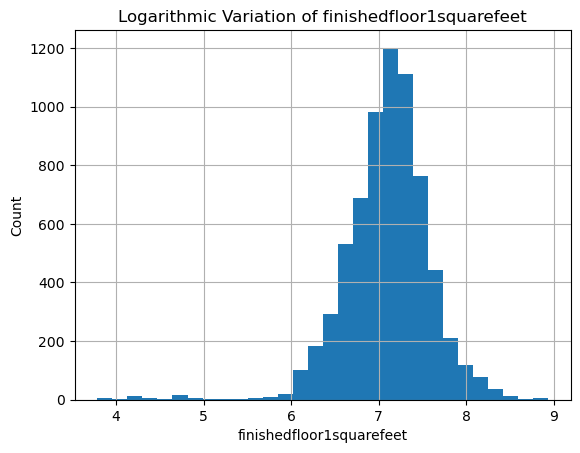

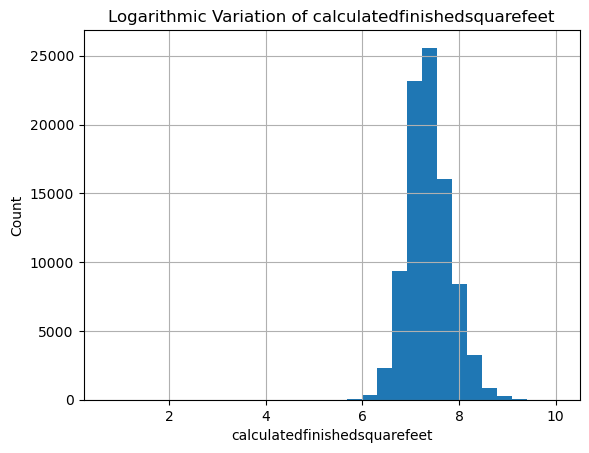

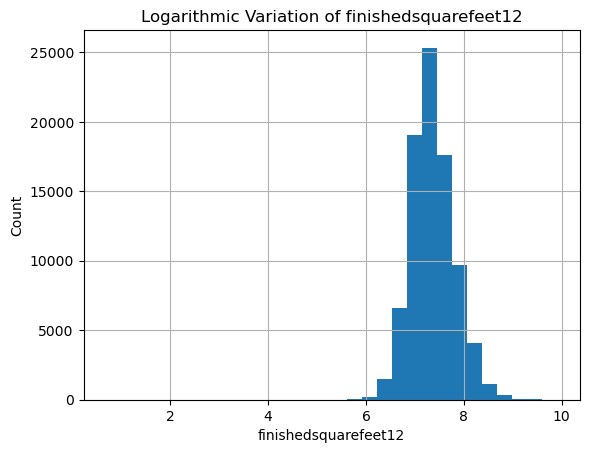

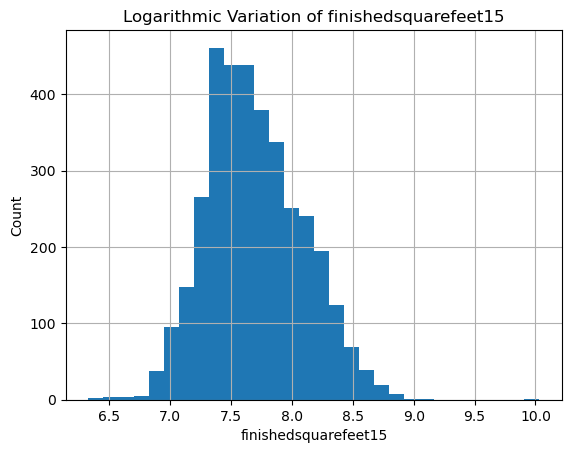

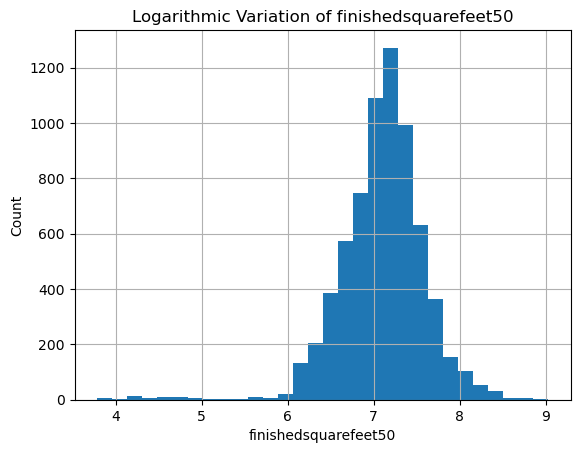

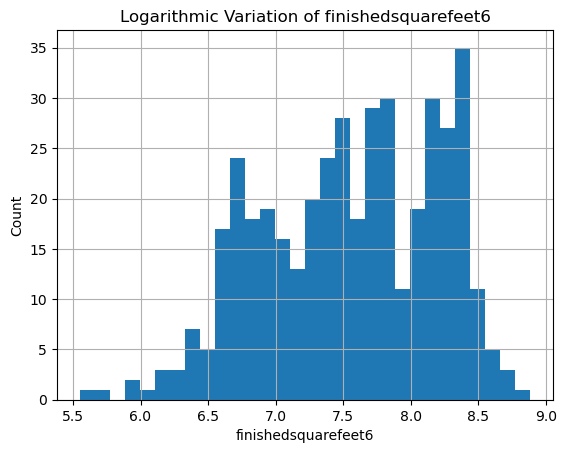

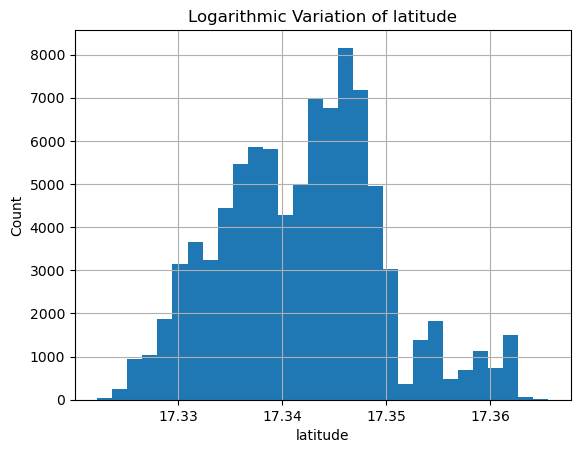

C:\Users\Rishabh Deo Singh\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


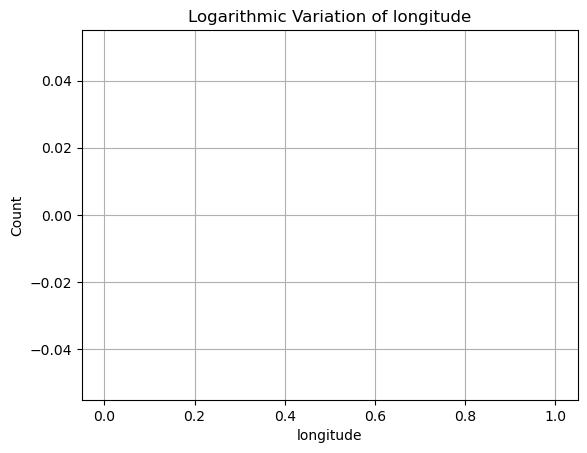

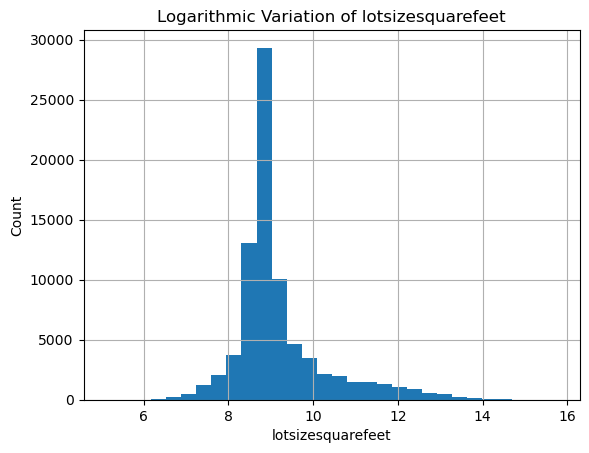

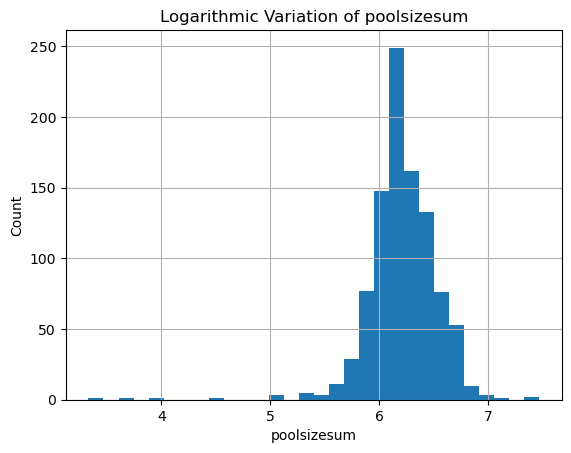

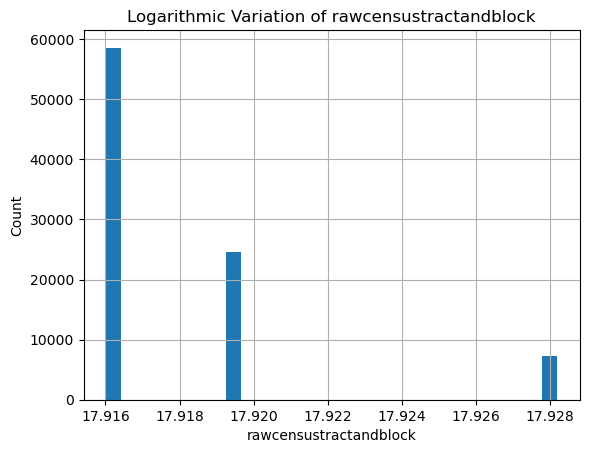

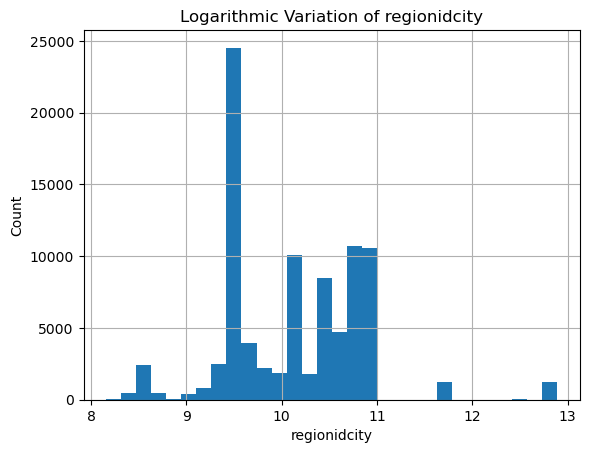

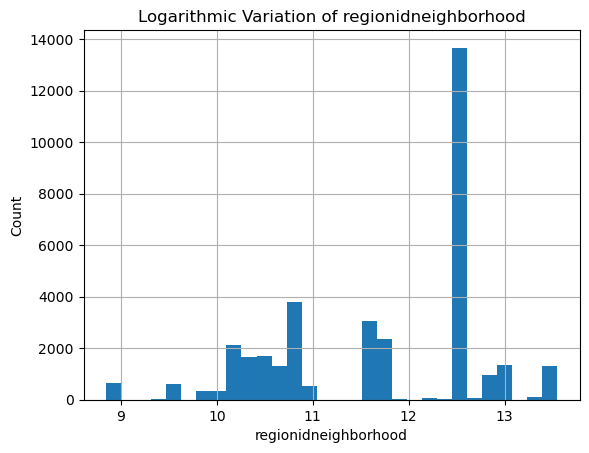

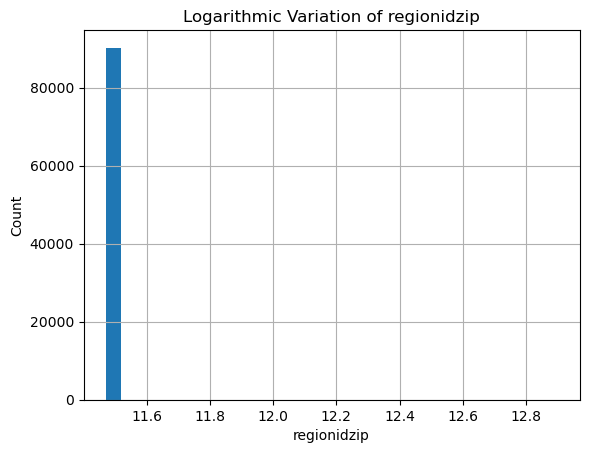

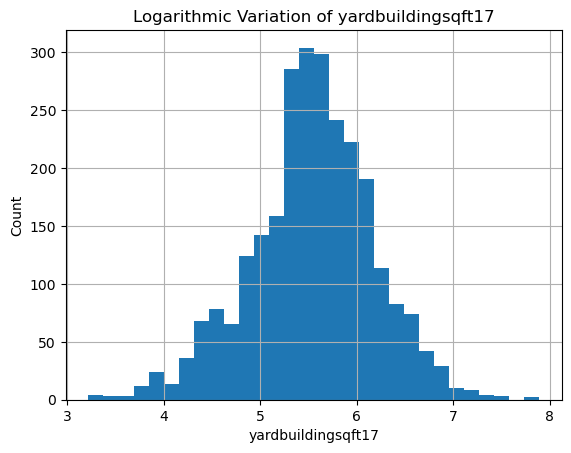

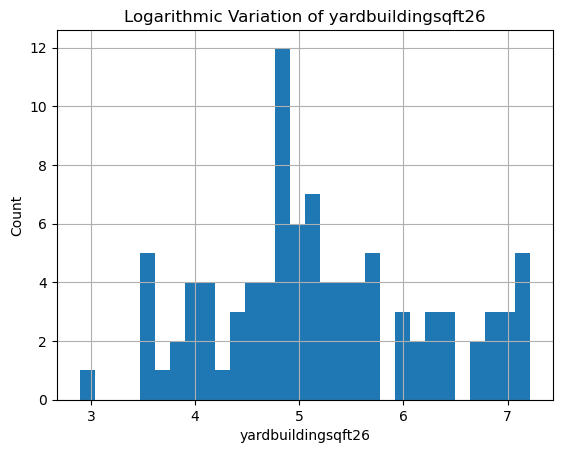

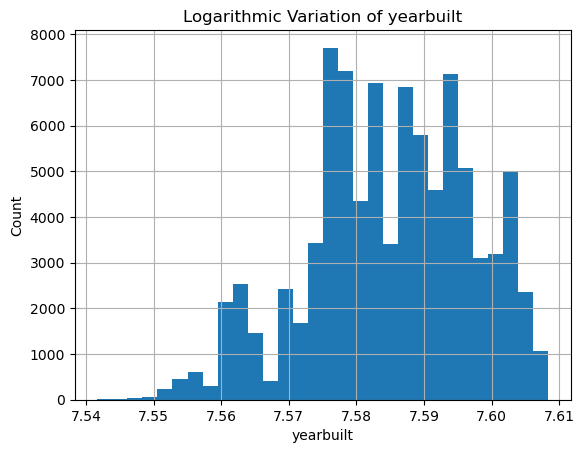

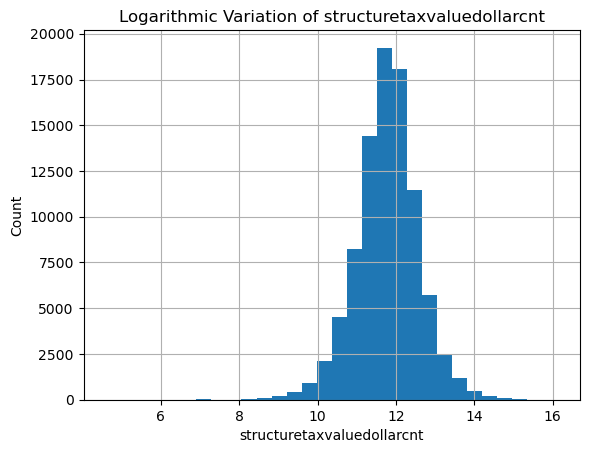

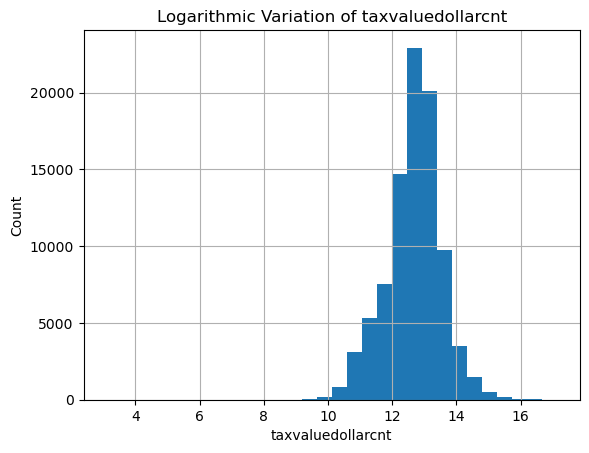

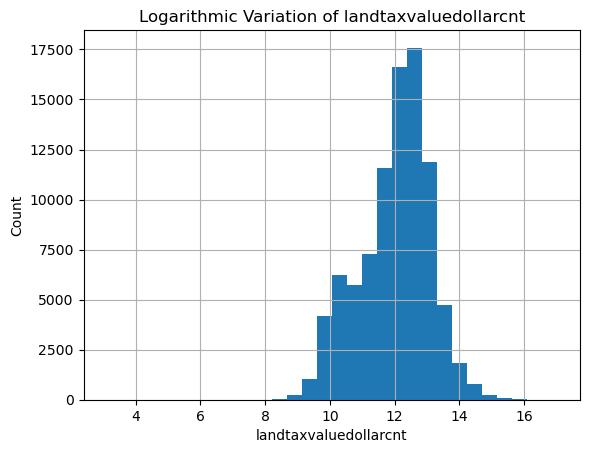

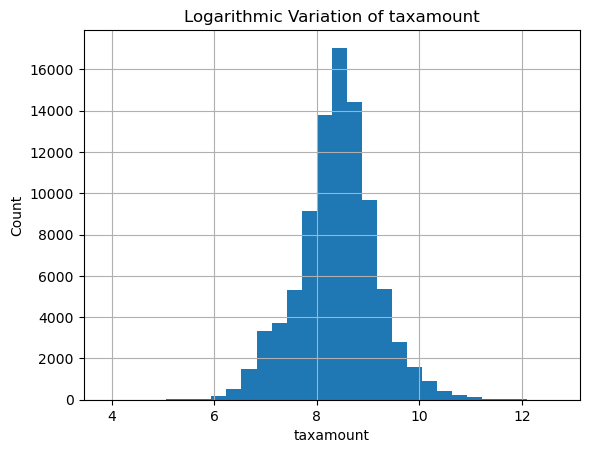

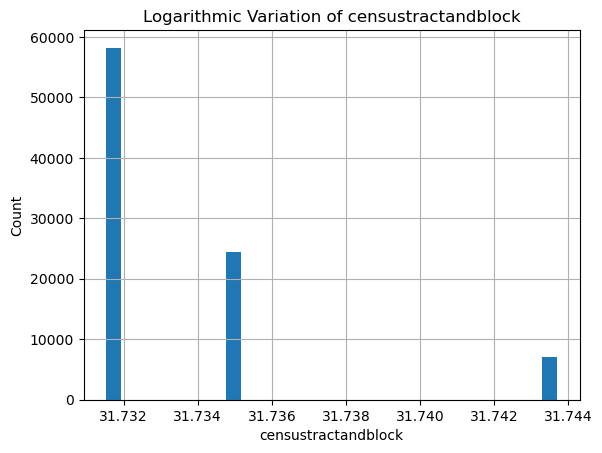

In [31]:
def analyze_log_variations(data, var):
    new_data = data.copy()
    if 0 in new_data[var].unique():
        pass
    else:
        new_data[var] = np.log(new_data[var])
        new_data[var].hist(bins=30)
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title('Logarithmic Variation of '+ var)
        plt.show()

for var in continuous_variables:
    analyze_log_variations(copy_data, var)

In [ ]:
# We get a better spread of some variables on using logarithmic transformation.

In [ ]:
# Outliers
# Outliers are the data points that significantly differ from the majority of the data in a dataset. These data points are unusual or rare in the context of the dataset and can have a significant impact on statistical analysis, model performance, and the accuracy of Ml algorithm. Outliers can occurr in both numerical and categorical data.

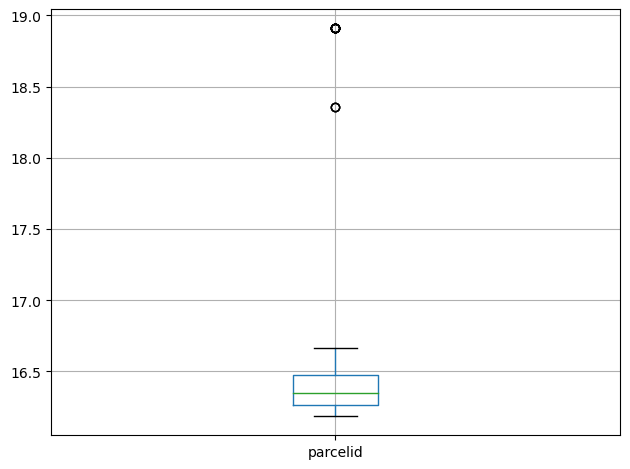

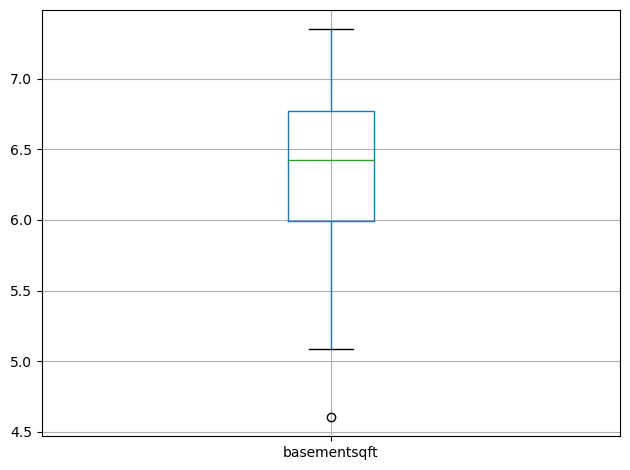

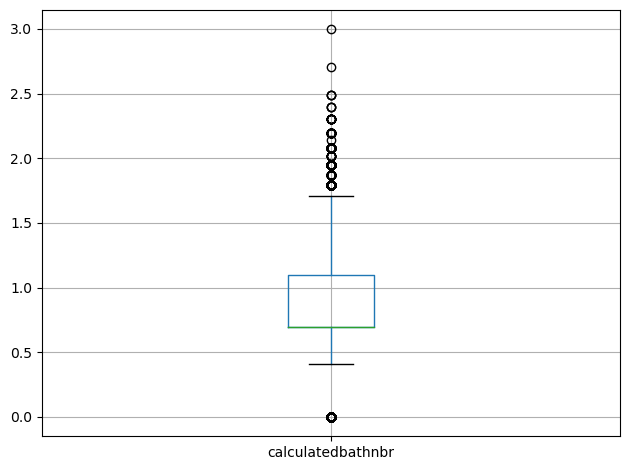

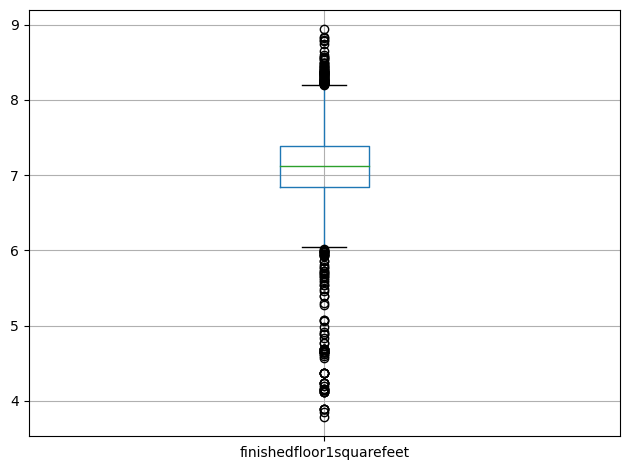

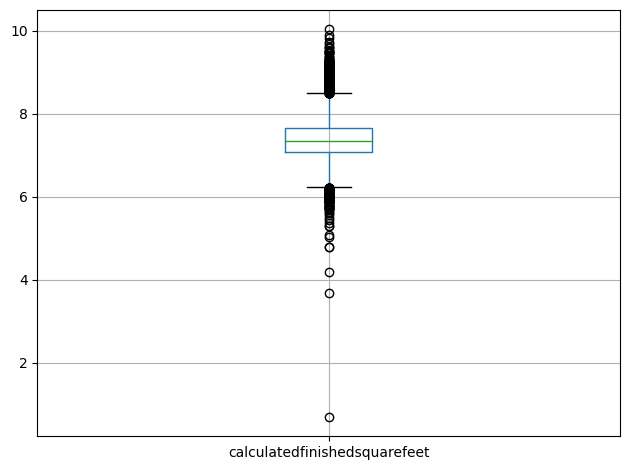

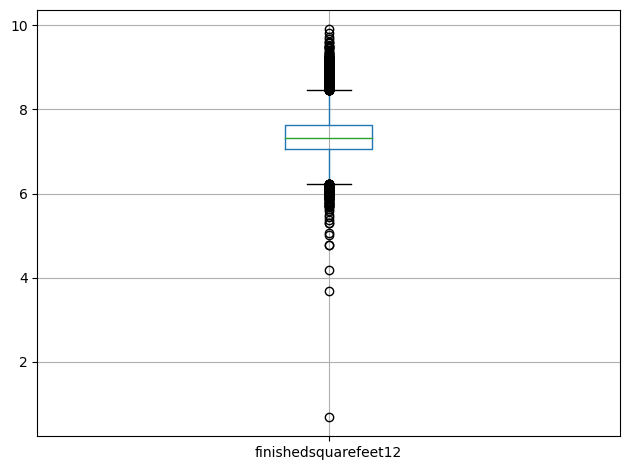

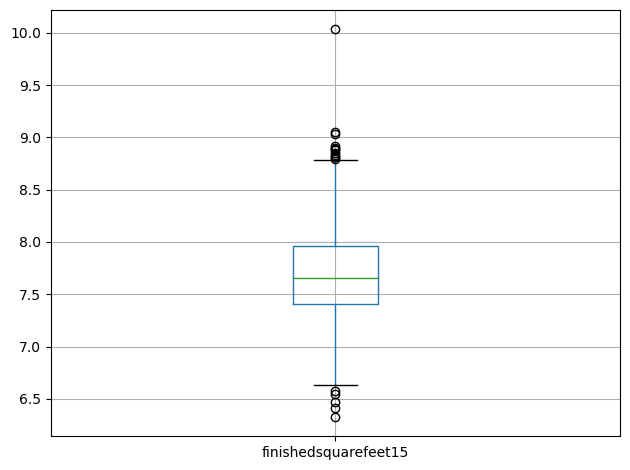

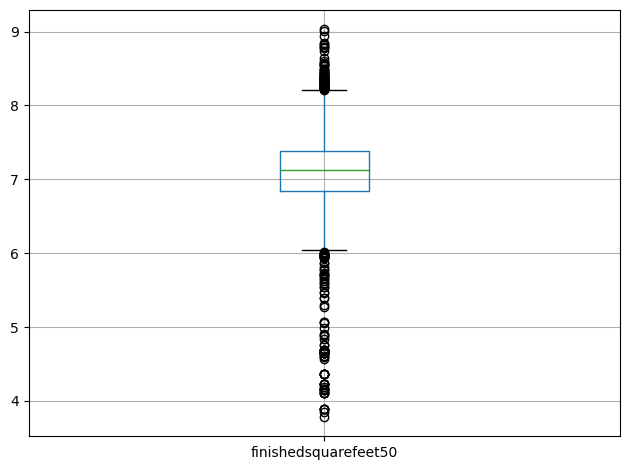

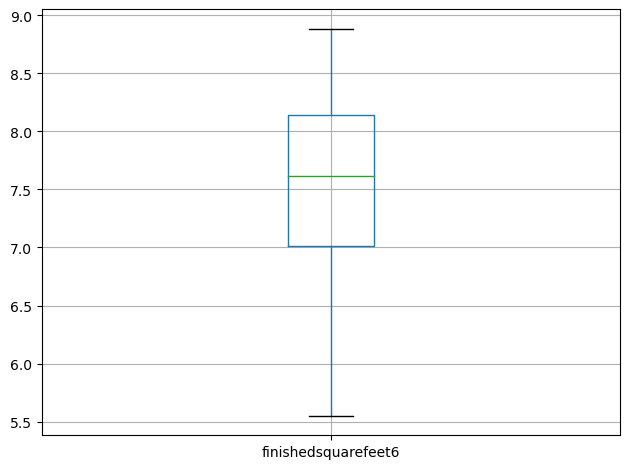

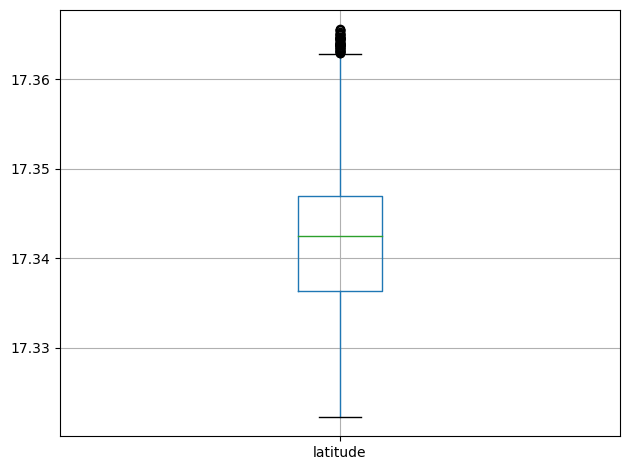

C:\Users\Rishabh Deo Singh\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


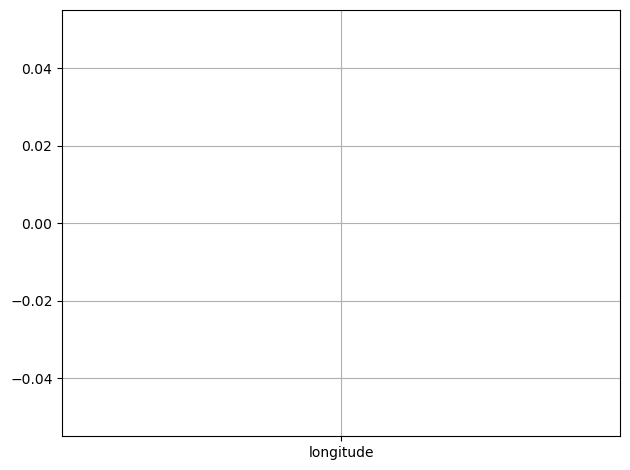

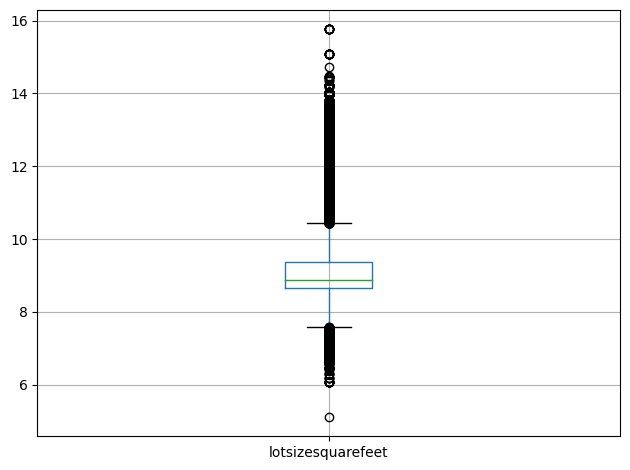

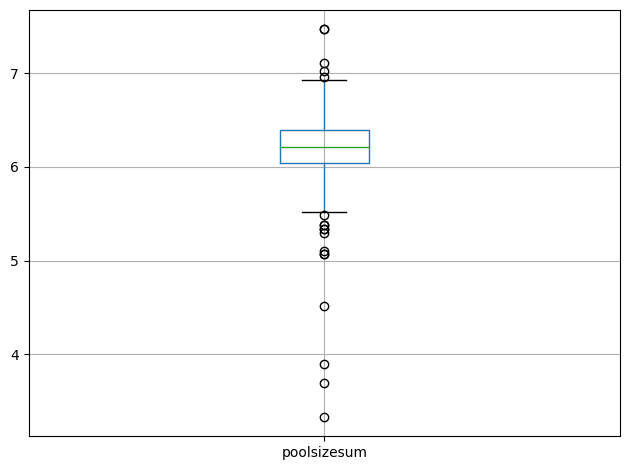

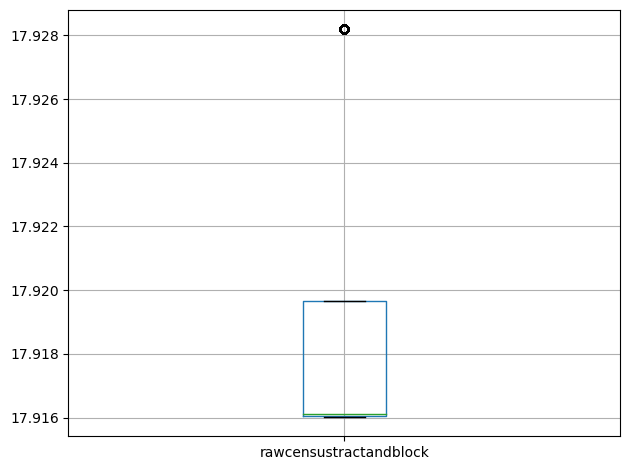

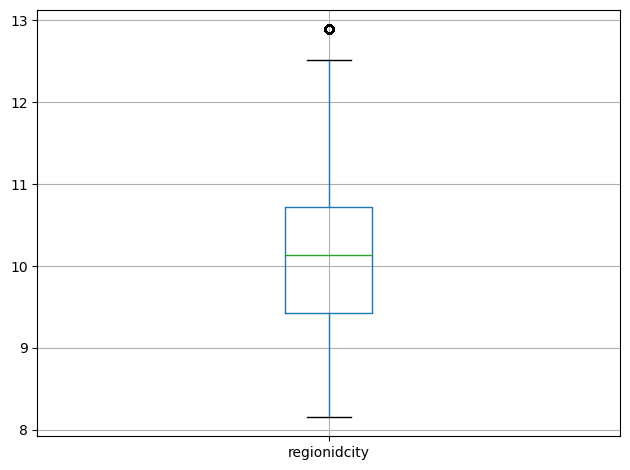

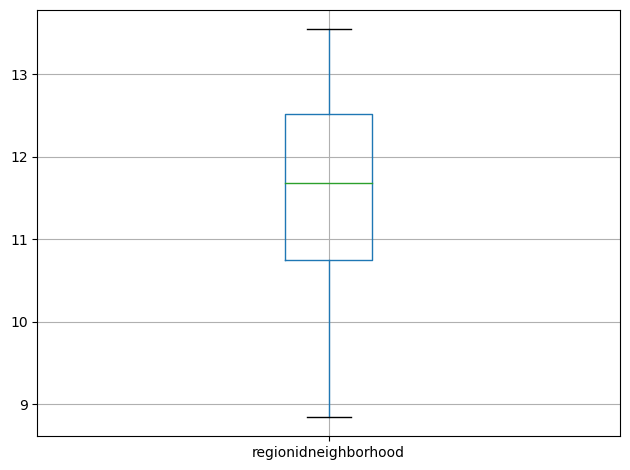

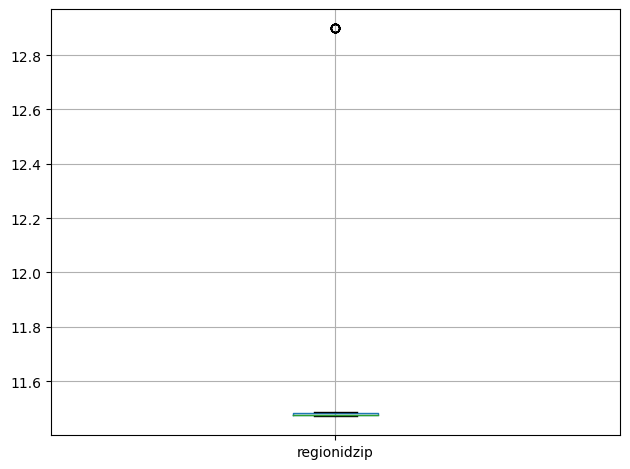

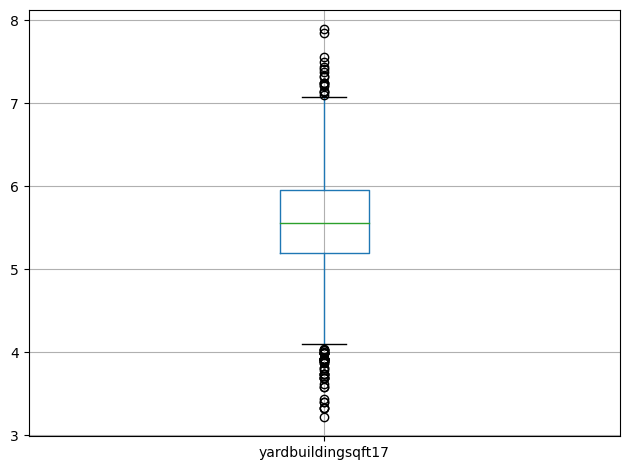

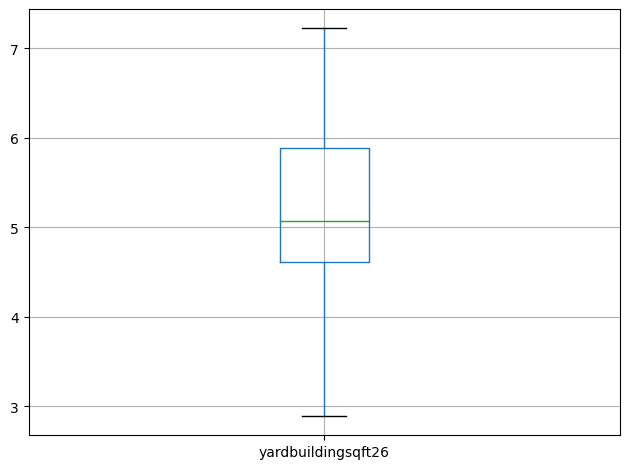

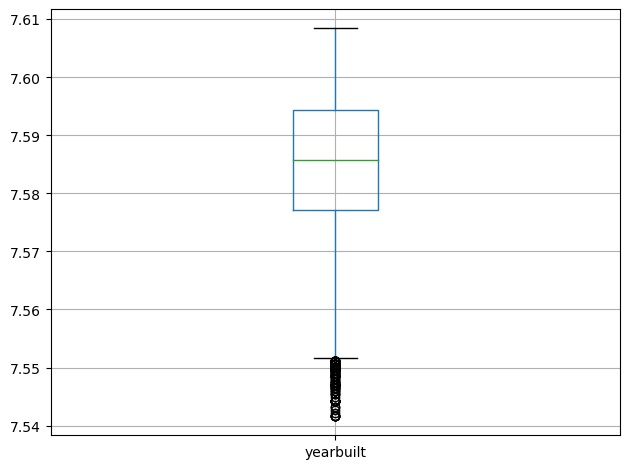

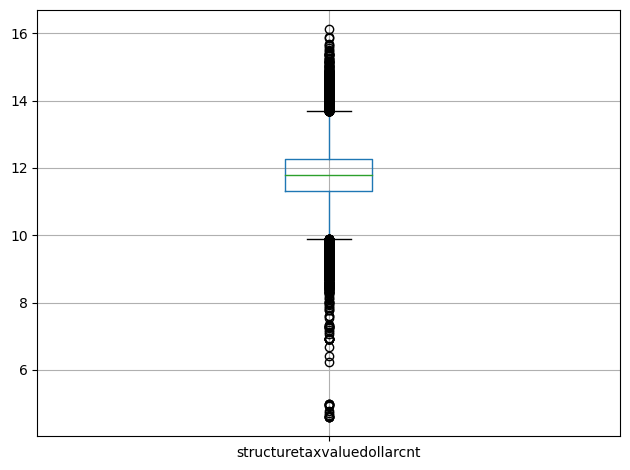

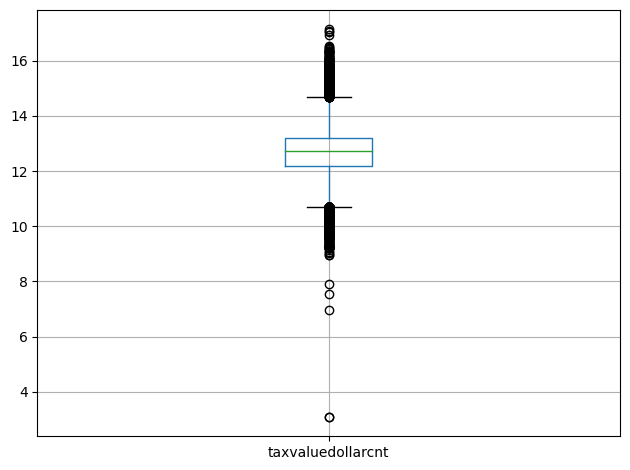

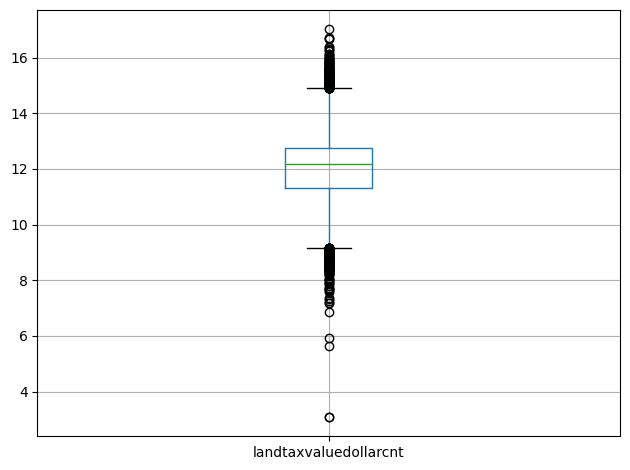

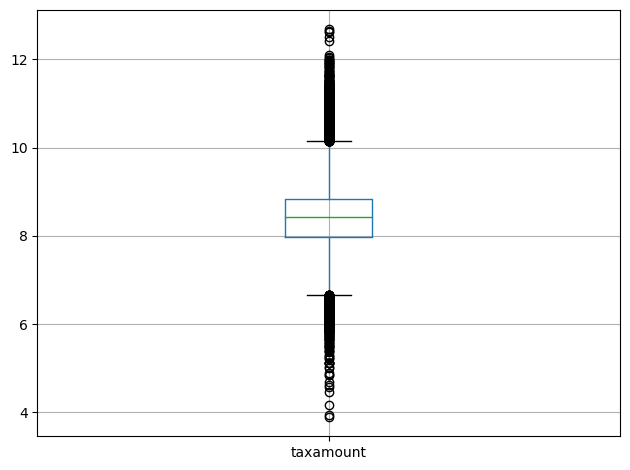

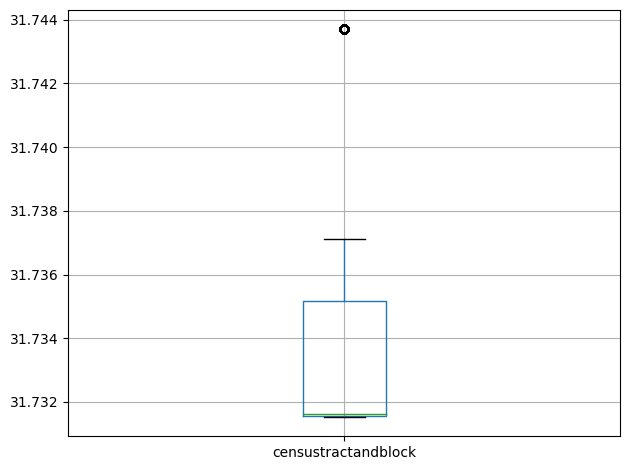

In [32]:
def analyze_outliers(data, var):
    new_data = data.copy()
    if 0 in new_data[var].unique():
        pass
    else:
        new_data[var] = np.log(data[var])
        new_data.boxplot(column=var)
        plt.tight_layout()
        plt.show()

for var in continuous_variables:
    analyze_outliers(copy_data, var)
    print()
    print()

In [ ]:
# There are outliers in some of the variables and they can be removed by feature engineering.

In [ ]:
# Saving Dataset for Feature Engineering

In [33]:
copy_data.to_csv('Zillow_Feature_Engineering_Dataset.csv', index=False)